# Instacart Basket Analysis

## Steps used in this script

### 1. Import Instacart Data Data Frame
### 2. Convert Data Types for memory optimizations
### 3. Add a 'region' column to Data Frame for regional comparisons
### 4. Comparing customer behavior in different geographic areas:
###### $\;\;\;\;\;\;$ a) Comparing total revenue and percentage of total revenue by region
###### $\;\;\;\;\;\;$ b) Comparing number of users by region and spening category
###### $\;\;\;\;\;\;$ c) Comparing total number of users by region 
###### $\;\;\;\;\;\;$ d) Comparing the number of users by region, state and categories of order frequency
###### $\;\;\;\;\;\;$ e) Comparing the number of users by region, state and categories of customer loyalty
###### $\;\;\;\;\;\;$ f) Comparing the number of users by region, gender and categories of customer loyalty
### 5. Creating a subset of high priority customers and low priority customers, then exporting low priority customer Data Frame
### 6. Adding department name data to priority customer Data Frame
### 7. Creating customer profiles & Adding categorical data columns for age and income data
### 8. Visualizing Distributions of All Customers
### 9. Visualizing Distributions of Customer Profiles
### 10. Visualizing Single Young Adults Profile:
###### $\;\;\;\;\;\;$ a) Creating profile function and profile table
###### $\;\;\;\;\;\;$ b) Creating visualization of dollars spent by age in Single Young Adults Profile
###### $\;\;\;\;\;\;$ c) Visualizing gender distribution in Single Young Adults profile
###### $\;\;\;\;\;\;$ d) Visualizing the top departments in the Single Young Adults profile
###### $\;\;\;\;\;\;$ e) Visualizing the distribution of users by customer type in the Single Young Adults profile
###### $\;\;\;\;\;\;$ e) Visualizing the the difference in total amount spent by department & across regions 
### 11. Additional Profile Visualizations:
###### $\;\;\;\;\;\;$ 1. Single Adults
###### $\;\;\;\;\;\;$ 2. Married Young Adults
###### $\;\;\;\;\;\;$ 3. Married Adults
###### $\;\;\;\;\;\;$ 4. Middle-Aged Men
###### $\;\;\;\;\;\;$ 5.  Middle-Aged Women
###### $\;\;\;\;\;\;$ 6. Senior Men
###### $\;\;\;\;\;\;$ 7. Senior Women
###### $\;\;\;\;\;\;$ 8. Vegans
###### $\;\;\;\;\;\;$ 9. Pet Owners
###### $\;\;\;\;\;\;$ 10. Alcohol Drinkers
###### $\;\;\;\;\;\;$ 11. Low-Inome Users
###### $\;\;\;\;\;\;$ 12. Middle-Income Users
###### $\;\;\;\;\;\;$ 13. High-Income Users
###### $\;\;\;\;\;\;$ 14. Weekend Only Shoppers
###### $\;\;\;\;\;\;$ 15. Weekday Only Shoppers
###### $\;\;\;\;\;\;$ 16. Early Morning Shoppers
###### $\;\;\;\;\;\;$ 17. Late Night Shoppers

### 1. Import Instacart Data Data Frame

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

# Importing libraries for Jupyter Notebook style and output
from IPython.display import display, HTML, clear_output


# Importing library to control garbage collection to free memory
import gc

# Setting Data Frame to display all columns and editing HTML of scroll windows in Jupyter
pd.set_option("display.max_columns", None)
display(HTML("<style>div.output_scroll {height: 50em; width: 78.5em; background-color: whitesmoke;}</style>"))

In [2]:
# Importing Data Frame - initial memory ~5.2 GB

path = r"C:\Users\David\Desktop\CareerFoundry\Achievement 4\Instacart Basket Analysis"

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data.pkl'))

In [3]:
print(f'Shape: {df.shape}')

display(df.head())

Shape: (32433030, 30)


order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id  prices        price_range  \
0         Soda        77              7     9.0  Mid-range product   
1         Soda        77              7     9.0  Mid-range product   
2         Soda        77              7     9.0  Mid-range product   
3         Soda        77              7     9.0  Mid-range product   
4         Soda        77              7     9.0  Mid-range product   

      busiest_day     busiest_days busiest_period_of_day  max_order  \
0  Regularly busy    Regulary busy        Average orders         10   
1  Regularly busy  Least busy days        Average orders         10   
2  Regularly busy  Least busy days           Most orders         10   
3      Least busy  Least busy days        Average orders         10   
4      Least busy  Least busy days           Most orders         10   

   loyalty_flag  avg_prod_price    spend_cat  avg_order_frequency  \
0  New customer        6.367797  Low spender            20.259259   
1  New customer        6.367797  Low spender            20.259259   
2  New customer        6.367797  Low spender            20.259259   
3  New customer        6.367797  Low spender            20.259259   
4  New customer        6.367797  Low spender            20.259259   

         order_frequency  gender    state  age date_joined  dependants  \
0  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
1  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
2  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
3  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
4  Non-frequent customer  Female  Alabama   31   2/17/2019           3   

  fam_status  income  
0    married   40423  
1    married   40423  
2    married   40423  
3    married   40423  
4    married   40423

In [4]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int8   
 3   order_dow               int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float64
 6   product_id              int32  
 7   add_to_cart_order       int16  
 8   reordered               int8   
 9   product_name            object 
 10  aisle_id                int16  
 11  department_id           int8   
 12  prices                  float64
 13  price_range             object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  busiest_period_of_day   object 
 17  max_order               int8   
 18  loyalty_flag            object 
 19  avg_prod_price          float64
 20  spend_cat               object 
 21  avg_order_frequency     float

None

order_id       user_id  order_number     order_dow  \
count  3.243303e+07  3.243303e+07  3.243303e+07  3.243303e+07   
mean   1.710748e+06  1.029375e+05  1.714200e+01  2.738815e+00   
std    9.872998e+05  5.946650e+04  1.753495e+01  2.090050e+00   
min    2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.559442e+05  5.142000e+04  5.000000e+00  1.000000e+00   
50%    1.711049e+06  1.026130e+05  1.100000e+01  3.000000e+00   
75%    2.565511e+06  1.543910e+05  2.400000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.243303e+07            3.035505e+07  3.243303e+07   
mean        1.342500e+01            1.110414e+01  2.557749e+04   
std         4.246349e+00            8.778945e+00  1.409625e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  1.353500e+04   
50%         1.300000e+01            8.000000e+00  2.525600e+04   
75%         1.600000e+01            1.500000e+01  3.793500e+04   
max         2.300000e+01            3.000000e+01  4.968800e+04   

       add_to_cart_order     reordered      aisle_id  department_id  \
count       3.243303e+07  3.243303e+07  3.243303e+07   3.243303e+07   
mean        8.351107e+00  5.896915e-01  7.121488e+01   9.922101e+00   
std         7.126631e+00  4.918897e-01  3.820386e+01   6.281257e+00   
min         1.000000e+00  0.000000e+00  1.000000e+00   1.000000e+00   
25%         3.000000e+00  0.000000e+00  3.100000e+01   4.000000e+00   
50%         6.000000e+00  1.000000e+00  8.300000e+01   9.000000e+00   
75%         1.100000e+01  1.000000e+00  1.070000e+02   1.600000e+01   
max         1.450000e+02  1.000000e+00  1.340000e+02   2.100000e+01   

             prices     max_order  avg_prod_price  avg_order_frequency  \
count  3.243303e+07  3.243303e+07    3.243303e+07         3.243303e+07   
mean   7.794923e+00  3.305231e+01    7.794895e+00         1.137508e+01   
std    4.243536e+00  2.515455e+01    7.347675e-01         6.056060e+00   
min    1.000000e+00  3.000000e+00    1.000000e+00         0.000000e+00   
25%    4.200000e+00  1.300000e+01    7.383446e+00         6.853288e+00   
50%    7.400000e+00  2.600000e+01    7.815844e+00         9.883784e+00   
75%    1.130000e+01  4.700000e+01    8.232684e+00         1.486538e+01   
max    2.500000e+01  9.900000e+01    2.320000e+01         3.000000e+01   

                age    dependants        income  
count  3.243303e+07  3.243303e+07  3.243303e+07  
mean   4.946523e+01  1.501877e+00  9.943537e+04  
std    1.848555e+01  1.118870e+00  4.305491e+04  
min    1.800000e+01  0.000000e+00  2.590300e+04  
25%    3.300000e+01  1.000000e+00  6.699800e+04  
50%    4.900000e+01  2.000000e+00  9.661200e+04  
75%    6.500000e+01  3.000000e+00  1.279080e+05  
max    8.100000e+01  3.000000e+00  5.939010e+05

### 2. Convert Data Types for memory optimizations

In [5]:
# Outputting column values to convert to categorical data

print(f'df.price_range: {list(df.price_range.unique())}\n')
print(f'df.busiest_day: {list(df.busiest_day.unique())}\n')
print(f'df.busiest_period_of_day: {list(df.busiest_period_of_day.unique())}\n')
print(f'df.loyalty_flag: {list(df.loyalty_flag.unique())}\n')
print(f'df.spend_cat: {list(df.spend_cat.unique())}\n')
print(f'df.order_frequency: {list(df.order_frequency.unique())}\n')

df.price_range: ['Mid-range product', 'Low-range product', 'High-range product']

df.busiest_day: ['Regularly busy', 'Least busy', 'Busiest day']

df.busiest_period_of_day: ['Average orders', 'Most orders', 'Fewest orders']

df.loyalty_flag: ['New customer', 'Regular customer', 'Loyal customer']

df.spend_cat: ['Low spender', 'High spender']

df.order_frequency: ['Non-frequent customer', 'Regular customer', 'Frequent customer']



In [6]:
# Using the function col_chnage to convert Nan values in days_since_prior order to zeroes in order to convert data type
# to float32, and to convert customer flag columns, gender, and fam_status columns to 'category' data type. This change 
# saves ~42% memory usage (~5.2GB to ~3GB)

def col_change():
    
    df.loc[df.days_since_prior_order.isnull() == True, 'days_since_prior_order'] = 0
    df.days_since_prior_order = df.days_since_prior_order.astype('float32')
    
    df.prices = df.prices.astype('float32')
    
    df.avg_prod_price = df.avg_prod_price.astype('float32')
    
    df.avg_order_frequency = df.avg_order_frequency.astype('float32')
    
    ranges = ['Low-range product', 'Mid-range product', 'High-range product']
    df.price_range = pd.Categorical(df.price_range, categories=ranges, ordered=True)
    
    levels = ['Least busy', 'Regularly busy', 'Busiest day']
    df.busiest_day = pd.Categorical(df.busiest_day, categories=levels, ordered=True)
    
    periods = ['Fewest orders', 'Average orders', 'Most orders']
    df.busiest_period_of_day = pd.Categorical(df.busiest_period_of_day, categories=periods, ordered=True)
    
    flags = ['New customer', 'Regular customer', 'Loyal customer']
    df.loyalty_flag = pd.Categorical(df.loyalty_flag, categories=flags, ordered=True)
    
    cats = ['Low spender', 'High spender']
    df.spend_cat = pd.Categorical(df.spend_cat, categories=cats, ordered=True)
    
    order = ['Non-frequent customer', 'Regular customer', 'Frequent customer']
    df.order_frequency = pd.Categorical(df.order_frequency, categories=order, ordered=True)

    df.gender = df.gender.astype('category')
    
    df.fam_status = df.fam_status.astype('category')
    
    return df

df = col_change()

# /// The code below is used throughout the notebook to delete varaibles and functions in order to keep memory usage low
%reset_selective -f col_change
col_change = None
del col_change
gc.collect();

In [7]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   order_dow               int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float32 
 6   product_id              int32   
 7   add_to_cart_order       int16   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int16   
 11  department_id           int8    
 12  prices                  float32 
 13  price_range             category
 14  busiest_day             category
 15  busiest_days            object  
 16  busiest_period_of_day   category
 17  max_order               int8    
 18  loyalty_flag            category
 19  avg_prod_price          float32 
 20  spend_cat               category
 21  avg_or

None

order_id       user_id  order_number     order_dow  \
count  3.243303e+07  3.243303e+07  3.243303e+07  3.243303e+07   
mean   1.710748e+06  1.029375e+05  1.714200e+01  2.738815e+00   
std    9.872998e+05  5.946650e+04  1.753495e+01  2.090050e+00   
min    2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.559442e+05  5.142000e+04  5.000000e+00  1.000000e+00   
50%    1.711049e+06  1.026130e+05  1.100000e+01  3.000000e+00   
75%    2.565511e+06  1.543910e+05  2.400000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.243303e+07            3.243303e+07  3.243303e+07   
mean        1.342500e+01            9.583955e+00  2.557749e+04   
std         4.246349e+00            8.579033e+00  1.409625e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            4.000000e+00  1.353500e+04   
50%         1.300000e+01            7.000000e+00  2.525600e+04   
75%         1.600000e+01            1.400000e+01  3.793500e+04   
max         2.300000e+01            3.000000e+01  4.968800e+04   

       add_to_cart_order     reordered      aisle_id  department_id  \
count       3.243303e+07  3.243303e+07  3.243303e+07   3.243303e+07   
mean        8.351107e+00  5.896915e-01  7.121488e+01   9.922101e+00   
std         7.126631e+00  4.918897e-01  3.820386e+01   6.281257e+00   
min         1.000000e+00  0.000000e+00  1.000000e+00   1.000000e+00   
25%         3.000000e+00  0.000000e+00  3.100000e+01   4.000000e+00   
50%         6.000000e+00  1.000000e+00  8.300000e+01   9.000000e+00   
75%         1.100000e+01  1.000000e+00  1.070000e+02   1.600000e+01   
max         1.450000e+02  1.000000e+00  1.340000e+02   2.100000e+01   

             prices     max_order  avg_prod_price  avg_order_frequency  \
count  3.243303e+07  3.243303e+07    3.243303e+07         3.243303e+07   
mean   7.571326e+00  3.305231e+01    7.239084e+00         1.070026e+01   
std    4.111346e+00  2.515455e+01    8.875697e-01         5.904053e+00   
min    1.000000e+00  3.000000e+00    1.000000e+00         0.000000e+00   
25%    4.200000e+00  1.300000e+01    7.383446e+00         6.853288e+00   
50%    7.400000e+00  2.600000e+01    7.815844e+00         9.883783e+00   
75%    1.130000e+01  4.700000e+01    8.232684e+00         1.486539e+01   
max    2.500000e+01  9.900000e+01    2.320000e+01         3.000000e+01   

                age    dependants        income  
count  3.243303e+07  3.243303e+07  3.243303e+07  
mean   4.946523e+01  1.501877e+00  9.943537e+04  
std    1.848555e+01  1.118870e+00  4.305491e+04  
min    1.800000e+01  0.000000e+00  2.590300e+04  
25%    3.300000e+01  1.000000e+00  6.699800e+04  
50%    4.900000e+01  2.000000e+00  9.661200e+04  
75%    6.500000e+01  3.000000e+00  1.279080e+05  
max    8.100000e+01  3.000000e+00  5.939010e+05

### 3. Add a 'region' column to Data Frame for regional comparisons

In [8]:
# Creating a dictionary of States:Regions using lists and zip in order to create a region columns

states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 
          'New Jersey','Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 
          'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
          'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky','Tennessee','Mississippi', 
          'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 
          'Colorado','Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
regions = ['Northeast','Northeast','Northeast','Northeast','Northeast','Northeast', 'Northeast', 'Northeast', 'Northeast',
          'Midwest', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'Midwest', 'Midwest',
          'Midwest', 'Midwest', 'South', 'South', 'South', 'South','South', 'South', 'South', 'South', 'South',
           'South','South','South', 'South', 'South', 'South', 'South', 'South', 'West', 'West','West','West','West',
           'West','West','West','West','West','West','West','West']

region_dict = dict(zip(states,regions))

%reset_selective -f regions, states
regions = None
states = None
del states, regions
gc.collect();

In [9]:
# Using region_col function to iterate over states in the Data Frame and assigning the region to a list. Assigning region
# list to new region column in the Data Frame outside of the function. 

def region_col(df):
    region = []
    for state in df.state:
        region.append(region_dict[state])
    return region

df['region'] = region_col(df)
df.region = df.region.astype('category')

%reset_selective -f region_col, region_dict
region_col = None
region_dict = None
del region_col, region_dict
gc.collect();

In [10]:
print(f'Shape: {df.shape}')

display(df.head())

Shape: (32433030, 31)


order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id  prices        price_range  \
0         Soda        77              7     9.0  Mid-range product   
1         Soda        77              7     9.0  Mid-range product   
2         Soda        77              7     9.0  Mid-range product   
3         Soda        77              7     9.0  Mid-range product   
4         Soda        77              7     9.0  Mid-range product   

      busiest_day     busiest_days busiest_period_of_day  max_order  \
0  Regularly busy    Regulary busy        Average orders         10   
1  Regularly busy  Least busy days        Average orders         10   
2  Regularly busy  Least busy days           Most orders         10   
3      Least busy  Least busy days        Average orders         10   
4      Least busy  Least busy days           Most orders         10   

   loyalty_flag  avg_prod_price    spend_cat  avg_order_frequency  \
0  New customer        6.367796  Low spender             20.25926   
1  New customer        6.367796  Low spender             20.25926   
2  New customer        6.367796  Low spender             20.25926   
3  New customer        6.367796  Low spender             20.25926   
4  New customer        6.367796  Low spender             20.25926   

         order_frequency  gender    state  age date_joined  dependants  \
0  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
1  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
2  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
3  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
4  Non-frequent customer  Female  Alabama   31   2/17/2019           3   

  fam_status  income region  
0    married   40423  South  
1    married   40423  South  
2    married   40423  South  
3    married   40423  South  
4    married   40423  South

In [11]:
display(df.info())

display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   order_dow               int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float32 
 6   product_id              int32   
 7   add_to_cart_order       int16   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int16   
 11  department_id           int8    
 12  prices                  float32 
 13  price_range             category
 14  busiest_day             category
 15  busiest_days            object  
 16  busiest_period_of_day   category
 17  max_order               int8    
 18  loyalty_flag            category
 19  avg_prod_price          float32 
 20  spend_cat               category
 21  avg_or

None

order_id       user_id  order_number     order_dow  \
count  3.243303e+07  3.243303e+07  3.243303e+07  3.243303e+07   
mean   1.710748e+06  1.029375e+05  1.714200e+01  2.738815e+00   
std    9.872998e+05  5.946650e+04  1.753495e+01  2.090050e+00   
min    2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.559442e+05  5.142000e+04  5.000000e+00  1.000000e+00   
50%    1.711049e+06  1.026130e+05  1.100000e+01  3.000000e+00   
75%    2.565511e+06  1.543910e+05  2.400000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.243303e+07            3.243303e+07  3.243303e+07   
mean        1.342500e+01            9.583955e+00  2.557749e+04   
std         4.246349e+00            8.579033e+00  1.409625e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            4.000000e+00  1.353500e+04   
50%         1.300000e+01            7.000000e+00  2.525600e+04   
75%         1.600000e+01            1.400000e+01  3.793500e+04   
max         2.300000e+01            3.000000e+01  4.968800e+04   

       add_to_cart_order     reordered      aisle_id  department_id  \
count       3.243303e+07  3.243303e+07  3.243303e+07   3.243303e+07   
mean        8.351107e+00  5.896915e-01  7.121488e+01   9.922101e+00   
std         7.126631e+00  4.918897e-01  3.820386e+01   6.281257e+00   
min         1.000000e+00  0.000000e+00  1.000000e+00   1.000000e+00   
25%         3.000000e+00  0.000000e+00  3.100000e+01   4.000000e+00   
50%         6.000000e+00  1.000000e+00  8.300000e+01   9.000000e+00   
75%         1.100000e+01  1.000000e+00  1.070000e+02   1.600000e+01   
max         1.450000e+02  1.000000e+00  1.340000e+02   2.100000e+01   

             prices     max_order  avg_prod_price  avg_order_frequency  \
count  3.243303e+07  3.243303e+07    3.243303e+07         3.243303e+07   
mean   7.571326e+00  3.305231e+01    7.239084e+00         1.070026e+01   
std    4.111346e+00  2.515455e+01    8.875697e-01         5.904053e+00   
min    1.000000e+00  3.000000e+00    1.000000e+00         0.000000e+00   
25%    4.200000e+00  1.300000e+01    7.383446e+00         6.853288e+00   
50%    7.400000e+00  2.600000e+01    7.815844e+00         9.883783e+00   
75%    1.130000e+01  4.700000e+01    8.232684e+00         1.486539e+01   
max    2.500000e+01  9.900000e+01    2.320000e+01         3.000000e+01   

                age    dependants        income  
count  3.243303e+07  3.243303e+07  3.243303e+07  
mean   4.946523e+01  1.501877e+00  9.943537e+04  
std    1.848555e+01  1.118870e+00  4.305491e+04  
min    1.800000e+01  0.000000e+00  2.590300e+04  
25%    3.300000e+01  1.000000e+00  6.699800e+04  
50%    4.900000e+01  2.000000e+00  9.661200e+04  
75%    6.500000e+01  3.000000e+00  1.279080e+05  
max    8.100000e+01  3.000000e+00  5.939010e+05

### 4. Comparing customer behavior in different geographic areas:

##### Comparing total revenue and percentage of total revenue by region

In [12]:
# Grouping Data Frame by regions to compare total spend in each region
region_total_revenue = df.groupby('region').prices.sum().astype('int').reset_index().sort_values(
    by='prices', ascending=False).rename(columns={'prices':'total_revenue'}).set_index(keys='region')

# Adding a '% of Total' column to the table
region_total_revenue['% of Total'] = ((region_total_revenue['total_revenue'] / region_total_revenue.total_revenue.sum()
                                      ) * 100).astype('float32')
region_total_revenue.loc['Total'] = [region_total_revenue.total_revenue.sum(), region_total_revenue['% of Total'].sum()]

display(region_total_revenue)

# Deleting Varaibles to free memory #
%reset_selective -f region_total_revenue
region_total_revenue = None
del region_total_revenue
gc.collect();

total_revenue  % of Total
region                              
South         84235888.0   33.319447
West          64694024.0   25.589676
Midwest       59279400.0   23.447926
Northeast     44603672.0   17.642952
Total        252812984.0  100.000000

##### Comparing number of users by region and spening category

In [13]:
# Creating a crosstab to compare number of users by region and spending category
regions_cross = pd.crosstab(df.region, df.spend_cat, dropna=False, values=df.user_id, aggfunc='nunique').sort_values(
    by='High spender', ascending=False)

# Adding a '% High Spender' column to compare across regions
regions_cross['% High spender'] = (regions_cross['High spender'] / (
    regions_cross['High spender'] + regions_cross['Low spender']) * 100).astype('float32')

# Adding a '% Low Spender' column to compare across regions
regions_cross['% Low spender'] = (regions_cross['Low spender'] / (
    regions_cross['High spender'] + regions_cross['Low spender']) * 100).astype('float32')

# Displaying table with style elements to highlight the top and bottom value in each column
display(regions_cross.sort_values(by='High spender', ascending=False).style.highlight_max(
    axis=0, color='#60ab59').highlight_min(axis=0, color='#ff8200'))

# Deleting Varaibles to free memory #
%reset_selective -f regions_cross
regions_cross = None
del regions_cross
gc.collect();

##### Comparing total number of users by region 

In [14]:
# Grouping the Data Frame by region and unique user_ids to illustrate the number of customers in each region
regions_user_count = df.groupby('region').user_id.nunique().reset_index().set_index(keys='region').sort_values(
    by='user_id', ascending=False).rename(columns={'user_id':'customer_count'})

# Adding a Total row
regions_user_count.loc['Total'] = regions_user_count.sum()

display(regions_user_count)

# Deleting Varaibles to free memory #
%reset_selective -f regions_user_count
regions_user_count = None
del regions_user_count
gc.collect();

customer_count
region                   
South               68737
West                52565
Midwest             48519
Northeast           36388
Total              206209

##### Comparing the number of users by region, state and categories of order frequency

In [15]:
# Implimenting a function to dynamically change font color if value is zero in order to to make the table easier to read
def hide_zeroes(cell):
    color = 'whitesmoke' if cell <= 0 else ''
    return 'color: %s' % color

# Creating a crosstab table to compare the number of users by region and state in each category of order frequency
order_freq_state_region = pd.crosstab(
    [df.region, df.order_frequency], df.state, values=df.user_id, aggfunc='nunique').rename_axis(
    index={'region': 'Region', 'order_frequency': 'Customer Type'}, columns={'state':''})

# Displaying table with style elements to highlight the min and max values by region and customer type and to help make the
# table more readable with borders
display(
    order_freq_state_region.style.applymap(hide_zeroes).highlight_max(
        axis=1, color='#60ab59').highlight_min(color='whitesmoke').set_table_styles(
        [{'selector': 'tr:nth-child(3), tr:nth-child(6), tr:nth-child(9)', 'props': [('border-bottom', 'solid black')]},
         {'selector': 'tbody tr', 'props': [('border-bottom', '0.5px solid grey')]},
         {'selector': 'tbody td', 'props': [('border-left', '0.5px solid black')]}]
    ))

# Deleting Varaibles to free memory #
%reset_selective -f order_freq_state_region
order_freq_state_region = None
del order_freq_state_region
gc.collect();

##### Comparing the number of users by region, state and categories of customer loyalty

In [16]:
# Creating a crosstab table to compare the number of users by region and state in each category of customer loyalty
loyalty_by_state_region = pd.crosstab(
    [df.region, df.loyalty_flag], df.state, values=df.user_id, aggfunc='nunique').rename_axis(
    index={'region': 'Region', 'loyalty_flag': 'Customer Type'}, columns={'state':''})



# Displaying table with style elements to highlight the min and max values by region and customer type and to help make the
# table more readable with borders
display(loyalty_by_state_region.style.applymap(hide_zeroes).highlight_max(
    color='#60ab59', axis=1).highlight_min(color= 'whitesmoke', axis=0).set_table_styles([
    {'selector': 'tr:nth-child(3), tr:nth-child(6), tr:nth-child(9)', 'props': [('border-bottom', 'solid black')]},
    {'selector': 'tbody tr', 'props': [('border-bottom', '0.5px solid grey')]},
    {'selector': 'tbody td', 'props': [('border-left', '0.5px solid black')]}]))

# Deleting Varaibles to free memory #
%reset_selective -f loyalty_by_state_region
loyalty_by_state_region = None
del loyalty_by_state_region
gc.collect();

##### Comparing the number of users by region, gender and categories of customer loyalty

In [17]:
# Creating a crosstab table to compare the number of users by region and gender in each category of customer type w/ style
# elements to highlight the min and max values, and borders for better readability
loyalty_by_region_gender = pd.crosstab(
    [df.region, df.gender], df.loyalty_flag, values=df.prices, aggfunc='sum').rename_axis(
    index={'region': 'Region', 'gender': 'Gender'}, columns={'loyalty_flag': ''}).style.format(precision=2).highlight_max(
    color='#60ab59').highlight_min(color='#ff8200').set_table_styles([
    {'selector': 'tr:nth-child(odd)', 'props': [('border-bottom', '1px solid grey')]},
    {'selector': 'tbody tr', 'props': [('border-bottom', '2px solid black')]},
    {'selector': 'tbody td', 'props': [('border-left', '0.5px solid black')]}])

display(loyalty_by_region_gender)

# Deleting Varaibles to free memory #
%reset_selective -f loyalty_by_region_gender
loyalty_by_region_gender = None
del loyalty_by_region_gender
gc.collect();

### 5. Creating a subset of high priority customers and low priority customers, then exporting low priority customer Data Frame

In [18]:
# Utilizing a function to split df Data Frame by high priority customers and low priority customers. Function saves low
# priority customer data frame to a .zip file whose name is taken from input by the user. The function returns a Data Frame
# with high priority customers. order_products_all is assigned to function call to name our new Data Frame

def priority_cust_df(path):
    # Choosing the name of the file for exported low priority customer Data Frame
    filepath = path
    filename = input(
        '''What name would you like to give your low priority file? No need to include an extension. 
        File will be saved as a pickle file compressed as .zip \n''')
    
    # Setting criteria for low priority and high priority customers in df and creating an exclusion flag column 
    df.loc[df.max_order < 5, 'priority'] = 'low'
    df.loc[df.max_order > 5, 'priority'] = 'high'
    
    # Converting column to category to save memory
    df.priority = df.priority.astype('category')
    
    # Assing low priority customers to Data Frame low_priority and exporting the DataFrame as a zip compressed pkl file
    low_priority = df[df.priority == 'low']
    print(f'Shape of exported low priority customer Data Frame: {low_priority.shape}')
    low_priority.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', filename + '.zip'), compression={'method':'zip'})
    
    # Deleting unnecessary varibales to free memory
    %reset_selective -f low_priority, filepath, filename
    low_priority = None
    filepath = None
    filename = None
    del low_priority, filepath, filename
    while gc.collect() > 0:
        gc.collect()
    
    # Assigning high priority customers to Data Frame high_priority 
    high_priority = df[df.priority == 'high']
    
    while gc.collect() > 0:
        gc.collect()
    
    return high_priority

# Assigning order_products_all to function call to name our Data Frame. Dropping 'priority' column as it is not needed
order_products_all = priority_cust_df(path).drop('priority', axis=1)

# Deleting Varaibles to free memory #
%reset_selective -f priority_cust_df, df
priority_cust_df = None
df = None
del priority_cust_df, df
gc.collect();

What name would you like to give your low priority file? No need to include an extension. 
        File will be saved as a pickle file compressed as .zip 
low_priority_customers
Shape of exported low priority customer Data Frame: (1441488, 32)


In [19]:
# Verifying elements of new order_products_all Data Frame

print(f'Shape: {order_products_all.shape}')

display(order_products_all.head())

Shape: (30197745, 31)


order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id  prices        price_range  \
0         Soda        77              7     9.0  Mid-range product   
1         Soda        77              7     9.0  Mid-range product   
2         Soda        77              7     9.0  Mid-range product   
3         Soda        77              7     9.0  Mid-range product   
4         Soda        77              7     9.0  Mid-range product   

      busiest_day     busiest_days busiest_period_of_day  max_order  \
0  Regularly busy    Regulary busy        Average orders         10   
1  Regularly busy  Least busy days        Average orders         10   
2  Regularly busy  Least busy days           Most orders         10   
3      Least busy  Least busy days        Average orders         10   
4      Least busy  Least busy days           Most orders         10   

   loyalty_flag  avg_prod_price    spend_cat  avg_order_frequency  \
0  New customer        6.367796  Low spender             20.25926   
1  New customer        6.367796  Low spender             20.25926   
2  New customer        6.367796  Low spender             20.25926   
3  New customer        6.367796  Low spender             20.25926   
4  New customer        6.367796  Low spender             20.25926   

         order_frequency  gender    state  age date_joined  dependants  \
0  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
1  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
2  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
3  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
4  Non-frequent customer  Female  Alabama   31   2/17/2019           3   

  fam_status  income region  
0    married   40423  South  
1    married   40423  South  
2    married   40423  South  
3    married   40423  South  
4    married   40423  South

In [20]:
display(order_products_all.info())

display(order_products_all.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30197745 entries, 0 to 32433025
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   order_dow               int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float32 
 6   product_id              int32   
 7   add_to_cart_order       int16   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int16   
 11  department_id           int8    
 12  prices                  float32 
 13  price_range             category
 14  busiest_day             category
 15  busiest_days            object  
 16  busiest_period_of_day   category
 17  max_order               int8    
 18  loyalty_flag            category
 19  avg_prod_price          float32 
 20  spend_cat               category
 21  avg_or

None

order_id       user_id  order_number     order_dow  \
count  3.019774e+07  3.019774e+07  3.019774e+07  3.019774e+07   
mean   1.710159e+06  1.029159e+05  1.822342e+01  2.742323e+00   
std    9.873709e+05  5.945335e+04  1.769615e+01  2.088382e+00   
min    2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552950e+05  5.143200e+04  6.000000e+00  1.000000e+00   
50%    1.710082e+06  1.025730e+05  1.200000e+01  3.000000e+00   
75%    2.565066e+06  1.543430e+05  2.500000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.019774e+07            3.019774e+07  3.019774e+07   
mean        1.340344e+01            9.425166e+00  2.557670e+04   
std         4.249652e+00            8.196883e+00  1.409157e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            4.000000e+00  1.353500e+04   
50%         1.300000e+01            7.000000e+00  2.524500e+04   
75%         1.600000e+01            1.400000e+01  3.792700e+04   
max         2.300000e+01            3.000000e+01  4.968800e+04   

       add_to_cart_order     reordered      aisle_id  department_id  \
count       3.019774e+07  3.019774e+07  3.019774e+07   3.019774e+07   
mean        8.363305e+00  6.140853e-01  7.120338e+01   9.926019e+00   
std         7.136048e+00  4.868106e-01  3.821874e+01   6.282790e+00   
min         1.000000e+00  0.000000e+00  1.000000e+00   1.000000e+00   
25%         3.000000e+00  0.000000e+00  3.100000e+01   4.000000e+00   
50%         6.000000e+00  1.000000e+00  8.300000e+01   9.000000e+00   
75%         1.100000e+01  1.000000e+00  1.070000e+02   1.600000e+01   
max         1.450000e+02  1.000000e+00  1.340000e+02   2.100000e+01   

             prices     max_order  avg_prod_price  avg_order_frequency  \
count  3.019774e+07  3.019774e+07    3.019774e+07         3.019774e+07   
mean   7.590491e+00  3.519928e+01    7.298408e+00         1.027170e+01   
std    4.112698e+00  2.475194e+01    8.413464e-01         5.324601e+00   
min    1.000000e+00  6.000000e+00    1.000000e+00         0.000000e+00   
25%    4.200000e+00  1.500000e+01    7.391177e+00         6.716049e+00   
50%    7.400000e+00  2.900000e+01    7.816058e+00         9.521739e+00   
75%    1.130000e+01  4.900000e+01    8.224934e+00         1.405091e+01   
max    2.500000e+01  9.900000e+01    2.011429e+01         3.000000e+01   

                age    dependants        income  
count  3.019774e+07  3.019774e+07  3.019774e+07  
mean   4.947076e+01  1.501987e+00  9.976772e+04  
std    1.848765e+01  1.118935e+00  4.318096e+04  
min    1.800000e+01  0.000000e+00  2.590300e+04  
25%    3.300000e+01  1.000000e+00  6.741900e+04  
50%    4.900000e+01  2.000000e+00  9.682000e+04  
75%    6.500000e+01  3.000000e+00  1.281500e+05  
max    8.100000e+01  3.000000e+00  5.939010e+05

### 6. Adding department name data to priority customer Data Frame

In [21]:
# Utilizing a function to add department name data from departments_wraangled.csv onto order_products_all without unnecessarily
# merging the Data Frames. This saves additional memory. Function requires path variable for file location and Data Frame
# to add department data onto

def dept_col(order_products_all, path):
    # Assigning 'dep' to pd.read_csv to iterate through items within the function
    dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))
    
    # Renaming column 'Unnamed: 0' to 'department_id' for better code readability
    dep.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)
    
    # Creating a dictionary object of 'department_id' and 'department' using lists and zip()
    ids = [ids for ids in dep.department_id]
    aisles = [aisle for aisle in dep.department]
    dept_dict = dict(zip(ids,aisles))
    
    # Iterating through order_products_all to append 'department_name' into 'department' list for each row
    department = []
    for nums in order_products_all.department_id:
        department.append(dept_dict[nums])
    
    # Displaying 'dep' Data Frame in the output in order to refrence department_id and department
    display(dep)
    
    return department

# Assigning new 'department' column in order_products_all to function call
order_products_all['department'] = dept_col(order_products_all, path)

# Changing 'department' column data type to categorical to save additional memory
order_products_all['department'] = order_products_all.department.astype('category')

# Deleting Varaibles to free memory #
%reset_selective -f dept_col
dept_col = None
del dept_col
gc.collect();

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [22]:
# Verifying elements of new order_products_all Data Frame
print(f'Shape: {order_products_all.shape}')
display(order_products_all.head())
display(order_products_all.info())
display(order_products_all.describe())

Shape: (30197745, 32)


order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     0.0         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  aisle_id  department_id  prices        price_range  \
0         Soda        77              7     9.0  Mid-range product   
1         Soda        77              7     9.0  Mid-range product   
2         Soda        77              7     9.0  Mid-range product   
3         Soda        77              7     9.0  Mid-range product   
4         Soda        77              7     9.0  Mid-range product   

      busiest_day     busiest_days busiest_period_of_day  max_order  \
0  Regularly busy    Regulary busy        Average orders         10   
1  Regularly busy  Least busy days        Average orders         10   
2  Regularly busy  Least busy days           Most orders         10   
3      Least busy  Least busy days        Average orders         10   
4      Least busy  Least busy days           Most orders         10   

   loyalty_flag  avg_prod_price    spend_cat  avg_order_frequency  \
0  New customer        6.367796  Low spender             20.25926   
1  New customer        6.367796  Low spender             20.25926   
2  New customer        6.367796  Low spender             20.25926   
3  New customer        6.367796  Low spender             20.25926   
4  New customer        6.367796  Low spender             20.25926   

         order_frequency  gender    state  age date_joined  dependants  \
0  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
1  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
2  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
3  Non-frequent customer  Female  Alabama   31   2/17/2019           3   
4  Non-frequent customer  Female  Alabama   31   2/17/2019           3   

  fam_status  income region department  
0    married   40423  South  beverages  
1    married   40423  South  beverages  
2    married   40423  South  beverages  
3    married   40423  South  beverages  
4    married   40423  South  beverages

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30197745 entries, 0 to 32433025
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   order_dow               int8    
 4   order_hour_of_day       int8    
 5   days_since_prior_order  float32 
 6   product_id              int32   
 7   add_to_cart_order       int16   
 8   reordered               int8    
 9   product_name            object  
 10  aisle_id                int16   
 11  department_id           int8    
 12  prices                  float32 
 13  price_range             category
 14  busiest_day             category
 15  busiest_days            object  
 16  busiest_period_of_day   category
 17  max_order               int8    
 18  loyalty_flag            category
 19  avg_prod_price          float32 
 20  spend_cat               category
 21  avg_or

None

order_id       user_id  order_number     order_dow  \
count  3.019774e+07  3.019774e+07  3.019774e+07  3.019774e+07   
mean   1.710159e+06  1.029159e+05  1.822342e+01  2.742323e+00   
std    9.873709e+05  5.945335e+04  1.769615e+01  2.088382e+00   
min    2.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552950e+05  5.143200e+04  6.000000e+00  1.000000e+00   
50%    1.710082e+06  1.025730e+05  1.200000e+01  3.000000e+00   
75%    2.565066e+06  1.543430e+05  2.500000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  9.900000e+01  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       3.019774e+07            3.019774e+07  3.019774e+07   
mean        1.340344e+01            9.425166e+00  2.557670e+04   
std         4.249652e+00            8.196883e+00  1.409157e+04   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            4.000000e+00  1.353500e+04   
50%         1.300000e+01            7.000000e+00  2.524500e+04   
75%         1.600000e+01            1.400000e+01  3.792700e+04   
max         2.300000e+01            3.000000e+01  4.968800e+04   

       add_to_cart_order     reordered      aisle_id  department_id  \
count       3.019774e+07  3.019774e+07  3.019774e+07   3.019774e+07   
mean        8.363305e+00  6.140853e-01  7.120338e+01   9.926019e+00   
std         7.136048e+00  4.868106e-01  3.821874e+01   6.282790e+00   
min         1.000000e+00  0.000000e+00  1.000000e+00   1.000000e+00   
25%         3.000000e+00  0.000000e+00  3.100000e+01   4.000000e+00   
50%         6.000000e+00  1.000000e+00  8.300000e+01   9.000000e+00   
75%         1.100000e+01  1.000000e+00  1.070000e+02   1.600000e+01   
max         1.450000e+02  1.000000e+00  1.340000e+02   2.100000e+01   

             prices     max_order  avg_prod_price  avg_order_frequency  \
count  3.019774e+07  3.019774e+07    3.019774e+07         3.019774e+07   
mean   7.590491e+00  3.519928e+01    7.298408e+00         1.027170e+01   
std    4.112698e+00  2.475194e+01    8.413464e-01         5.324601e+00   
min    1.000000e+00  6.000000e+00    1.000000e+00         0.000000e+00   
25%    4.200000e+00  1.500000e+01    7.391177e+00         6.716049e+00   
50%    7.400000e+00  2.900000e+01    7.816058e+00         9.521739e+00   
75%    1.130000e+01  4.900000e+01    8.224934e+00         1.405091e+01   
max    2.500000e+01  9.900000e+01    2.011429e+01         3.000000e+01   

                age    dependants        income  
count  3.019774e+07  3.019774e+07  3.019774e+07  
mean   4.947076e+01  1.501987e+00  9.976772e+04  
std    1.848765e+01  1.118935e+00  4.318096e+04  
min    1.800000e+01  0.000000e+00  2.590300e+04  
25%    3.300000e+01  1.000000e+00  6.741900e+04  
50%    4.900000e+01  2.000000e+00  9.682000e+04  
75%    6.500000e+01  3.000000e+00  1.281500e+05  
max    8.100000e+01  3.000000e+00  5.939010e+05

### 7. Creating customer profiles and adding categorical data columns for age and income data

In [23]:
# Utilizing a function to add additonal categorical flags for analyses. These include: age brackets, age categories,
# income levels, and customer profiles

def age_income_cat_columns():
    
    # Assigning order_products_all to temporary variable within the function
    x = order_products_all
    
    # Creating 'age_bracket' column based on age ranges
    x.loc[x.age <= 25, 'age_bracket'] = '18-25'
    x.loc[(x.age > 25) & (x.age <= 33), 'age_bracket'] = '26-33'
    x.loc[(x.age > 33) & (x.age <= 41), 'age_bracket'] = '34-41'
    x.loc[(x.age > 41) & (x.age <= 49), 'age_bracket'] = '42-49'
    x.loc[(x.age > 49) & (x.age <= 56), 'age_bracket'] = '50-57'
    x.loc[(x.age > 57) & (x.age <= 65), 'age_bracket'] = '58-65'
    x.loc[(x.age > 65) & (x.age <= 73), 'age_bracket'] = '66-73'
    x.loc[(x.age > 73) & (x.age <= 81), 'age_bracket'] = '74-81'
    
    # Creating hierarchy of categories and assigning 'age_bracket' data to categorical
    age_ranges = ['18-25','26-33','34-41','42-49','50-57','58-65','66-73','74-81']
    x['age_bracket'] = pd.Categorical(x['age_bracket'], categories=age_ranges, ordered=True)
    
    # Creating 'age_category' column based on age ranges
    x.loc[x.age.between(18,33), 'age_category'] = 'Young adults'
    x.loc[x.age.between(34,49), 'age_category'] = 'Adults'
    x.loc[x.age.between(50,65), 'age_category'] = 'Middle Aged'
    x.loc[x.age > 65, 'age_category'] = 'Seniors'
    
    # Creating hierarchy of categories and assigning 'age_category' data to categorical
    age_classes = ['Young adults', 'Adults', 'Middle Aged', 'Seniors']
    x['age_category'] = pd.Categorical(x['age_category'], categories=age_classes, ordered=True)
    
    # Creating 'income_bracket' column based on 'income' column data
    x.loc[x.income < 48500, 'income_bracket'] = 'low income'
    x.loc[(x.income > 48500) & (x.income < 145000), 'income_bracket'] = 'middle income'
    x.loc[x.income > 145000, 'income_bracket'] = 'high income'
    
    # Creating hierarchy of categories and assigning 'income_bracket' data to categorical
    income_levels = ['low income', 'middle income', 'high income']
    x['income_bracket'] = pd.Categorical(x['income_bracket'], categories=income_levels, ordered=True)
    
    # Creating a 'profile' column and inserting our previously defined profile data into the column based on profile criteria
    x.loc[x.user_id.isin(x[(x.age.between(18,33)) & (x.fam_status == 'single') & 
                                           (x.dependants == 0)]['user_id'].unique()) == True, 'profile'] = 'Single young adults'
    x.loc[x.user_id.isin(x[(x.age.between(18,33)) & (x.fam_status == 'married') & 
                                            (x.dependants > 0)]['user_id'].unique()) == True, 'profile'] = 'Married Young adults'
    x.loc[x.user_id.isin(x[(x.age.between(34,49)) & (x.fam_status == 'single') & 
                                     (x.dependants == 0)]['user_id'].unique()) == True, 'profile'] = 'Single adults'
    x.loc[x.user_id.isin(x[(x.age.between(34,49)) & (x.fam_status == 'married') & 
                                      (x.dependants > 0)]['user_id'].unique()) == True, 'profile'] = 'Married adults'
    x.loc[x.user_id.isin(x[(x.age.between(50,65)) & 
                           (x.gender == 'Male')]['user_id'].unique()) == True, 'profile'] = 'Middle-aged men'
    x.loc[x.user_id.isin(x[(x.age.between(50,65)) & 
                           (x.gender == 'Female')]['user_id'].unique()) == True, 'profile'] = 'Middle-aged women'                     
    x.loc[x.user_id.isin(x[(x.age > 65) & (x.gender == 'Male')]['user_id'].unique()) == True, 'profile'] = 'Senior men'
    x.loc[x.user_id.isin(x[(x.age > 65) & (x.gender == 'Female')]['user_id'].unique()) == True, 'profile'] = 'Senior women'
    
    x['profile'] = pd.Categorical(x['profile'])
                         
                         
    return x

# Assigning priorty_cust to function call to add new categorical columns
order_products_all = age_income_cat_columns()

%reset_selective -f age_income_cat_columns
age_income_cat_columns = None
del age_income_cat_columns
gc.collect();

### 8. Visualizing Distributions of All Customers

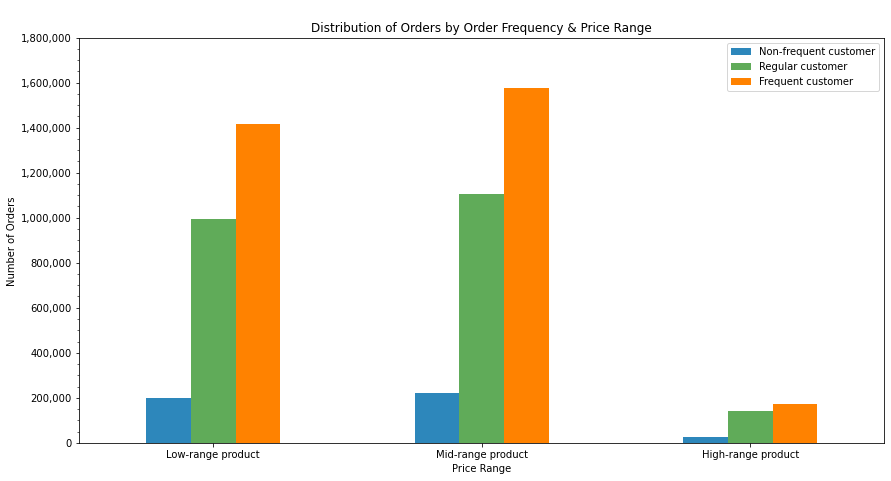

In [24]:
bar = order_products_all.groupby(['order_frequency', 'price_range']).order_id.nunique().unstack(
        'order_frequency').plot.bar(figsize=(12,8), xlabel='Price Range', ylabel='Number of Orders',
                                    title='\nDistribution of Orders by Order Frequency & Price Range',
                                 color=['#2d87bb','#60ab59','#ff8200'])
    # Adding style elements to the chart to improve readabilty
plt.tight_layout()
plt.xticks(rotation = 0)
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.legend(loc='best', ncol=1, fancybox=True)
ticks_loc = bar.get_yticks().tolist()
bar.set_yticks(bar.get_yticks().tolist())
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    # Saving figure to Visualizations folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'all_customers_price_range_chart.png'), dpi=300)
plt.show(bar)

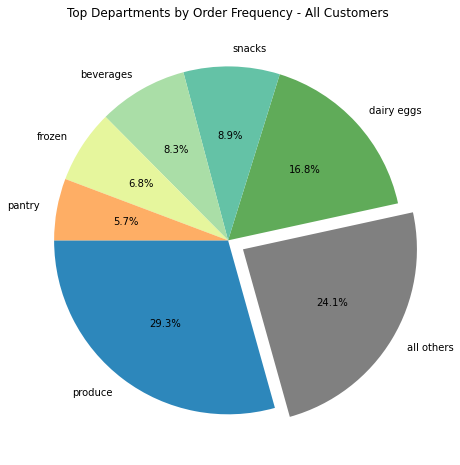


-----------------------------------------------------------------------------------------------------------------------------


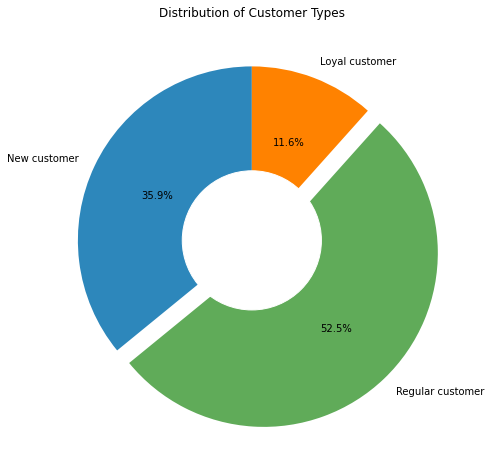


-----------------------------------------------------------------------------------------------------------------------------


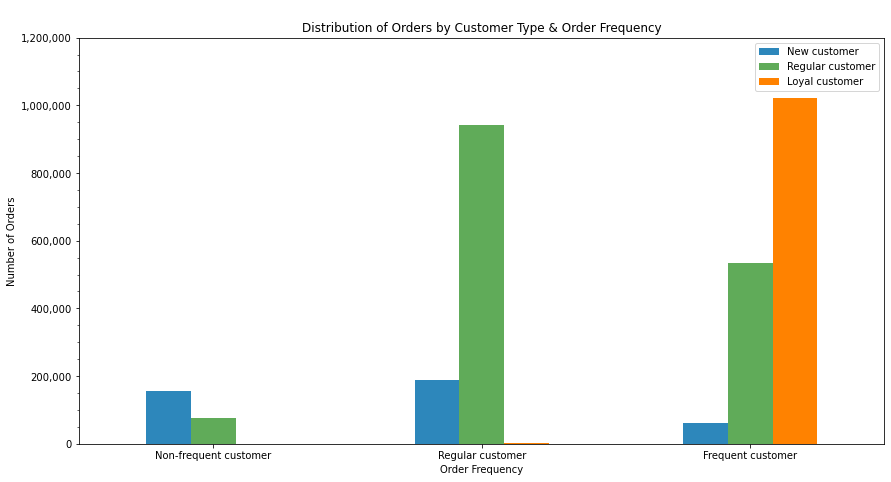


-----------------------------------------------------------------------------------------------------------------------------


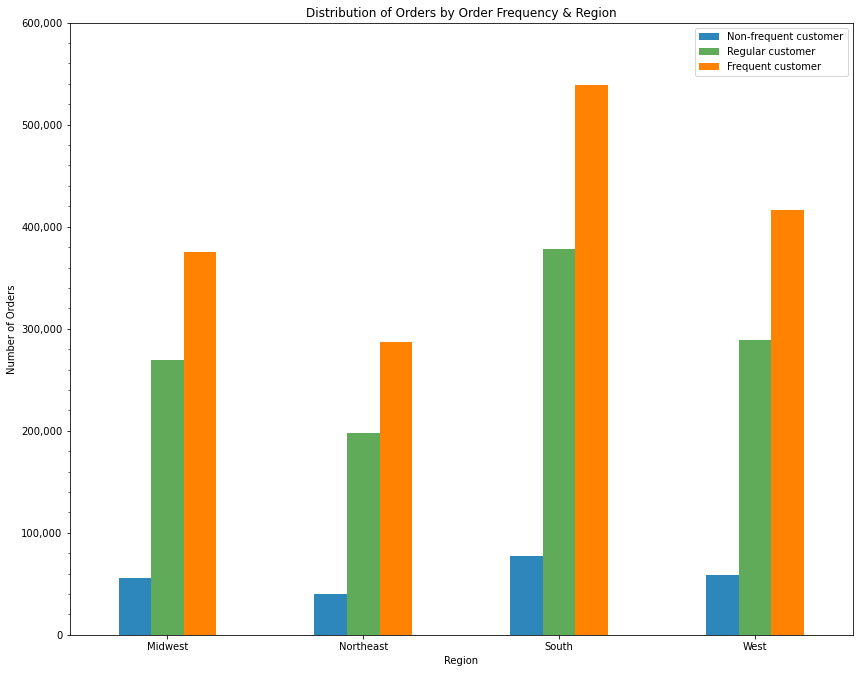

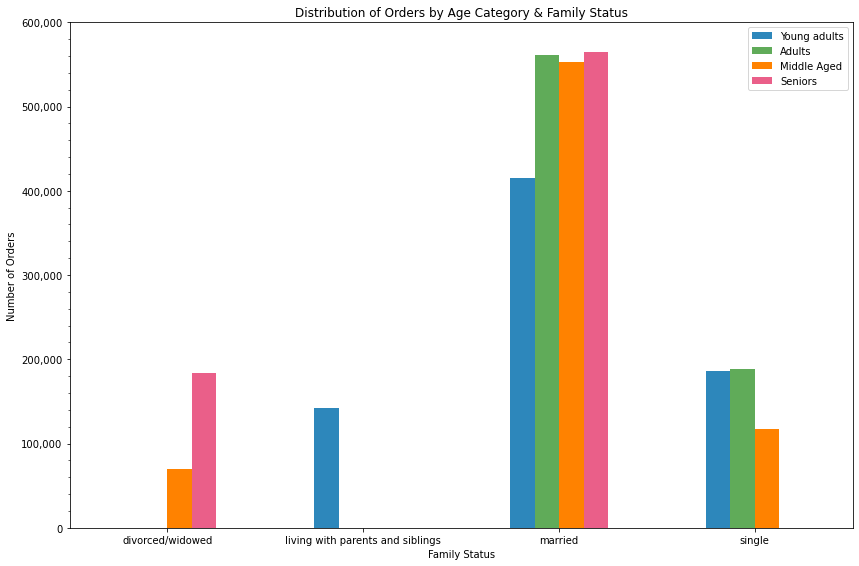

In [25]:
def all_customer_viz():
    # Creating a departents pie chart by order frequency
    x = order_products_all
    # Creating an empty dict to store pie values
    dep_dict = {}
    # Defining total spend of young adults profile data frame
    total = x.order_id.count()
    # Assigning temporary variable to store 'All other' percetnage values for pie chart
    i = 0
    # Iterating over each department to find the total spend per department, dividing by overall total spend & creating the
    # percentage of total spend by multiplying by 100
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['order_id'].count() / total) * 100
        # If percentage of total spend is greater than 4% then department and percentage are added to dep_dict
        if value > 4:
            dep_dict[dep] = value
        # If percentage of total spend is less than 4% then percentage is added to i    
        else:
            i += value
    # Percentage value of i is assigned to 'all others' in pie chart 
    dep_dict['all others'] = i
    # Creating the pie chart based on Data Frame created from dep_dict dictionary, adding labels, setting the decimal limit,
    # assigning a color palette and exploding the slice with "all other" departments 
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080','#60ab59','#64c2a6', '#aadea7','#e6f69d', '#feae65','#f66d44','#c37d34',
                '#fff1c9', '#EA5F89'], explode=[0,0.1,0,0,0,0,0])
    plt.title('Top Departments by Order Frequency - All Customers')
    # Saving figure to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'all_customers_pie_chart.png'), dpi=300)
    plt.show(pie)
    print('\n' + ('-') * 125)
    
    # Grouping profile subset by 'gender' and number of unique userids and plotting onto pie chart
    donut = order_products_all.groupby('loyalty_flag').user_id.nunique().sort_index().plot.pie(
        ylabel='', title='Distribution of Customer Types', legend= False, autopct='%1.1f%%',startangle=90,
        colors=['#2d87bb','#60ab59', '#ff8200'],explode=[0,0.1,0], figsize = (8,8))
    # Creating a blank white circle object to add on top of pie chart for donut effect
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    # Saving figure to Visualizations folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'all_customers_donut_chart.png'), dpi=300)
    plt.show(donut)
    print('\n' + ('-') * 125)
    
    bar = order_products_all.groupby(['order_frequency', 'loyalty_flag']).order_id.nunique().unstack(
        'loyalty_flag').plot.bar(figsize=(12,8), xlabel='Order Frequency', ylabel='Number of Orders', 
                                 color=['#2d87bb','#60ab59','#ff8200'])
    # Adding style elements to the chart to improve readabilty
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(loc='best', ncol=1, fancybox=True)
    plt.title('\nDistribution of Orders by Customer Type & Order Frequency')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    # Saving figure to Visualizations folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'all_customers_loyalty_chart.png'), dpi=300)
    plt.show(bar)
    print('\n' + ('-') * 125)
    
    region_bar = order_products_all.groupby(['region', 'order_frequency']).order_id.nunique().unstack(
        'order_frequency').plot.bar(figsize=(12,10), xlabel='Region', ylabel='Number of Orders',
                                    title='Distribution of Orders by Order Frequency & Region',color=['#2d87bb',
                                                                                                     '#60ab59','#ff8200'])
    # Adding style elements to the chart to improve readabilty
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(loc='best', ncol=1, fancybox=True)
    ticks_loc = region_bar.get_yticks().tolist()
    region_bar.set_yticks(region_bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    # Saving figure to Visualizations folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'all_customers_region_chart.png'), dpi=300)
    plt.show(region_bar)
    
    age_fam_bar = order_products_all.groupby(['fam_status', 'age_category']).order_id.nunique().unstack(
        'age_category').plot.bar(figsize=(12,10), xlabel='Family Status', ylabel='Number of Orders',
                                    title='Distribution of Orders by Age Category & Family Status', color=['#2d87bb',
                                                                                                           '#60ab59',
                                                                                                           '#ff8200', 
                                                                                                           '#EA5F89'])
    # Adding style elements to the chart to improve readabilty
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(loc='best', ncol=1, fancybox=True)
    ticks_loc = age_fam_bar.get_yticks().tolist()
    age_fam_bar.set_yticks(age_fam_bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    # Saving figure to Visualizations folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'all_customers_age_fam_chart.png'), dpi=300)
    plt.show(age_fam_bar)
    
    

    

all_customer_viz()    

### 9. Visualizing Distributions of Customer Profiles

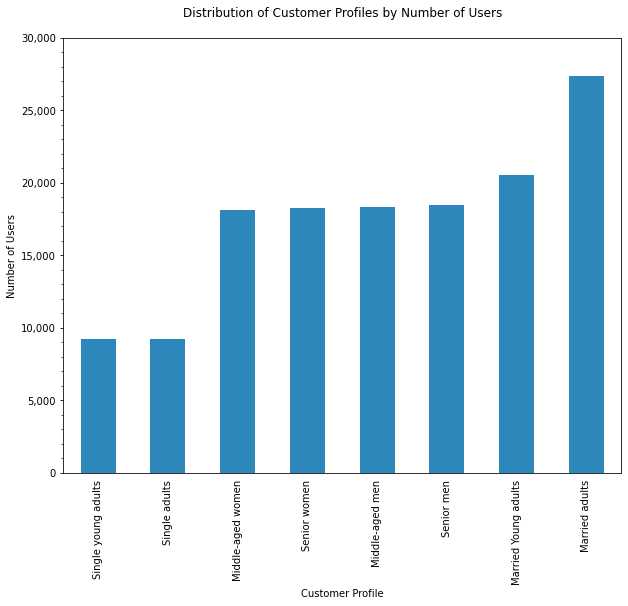


-----------------------------------------------------------------------------------------------------------------------------


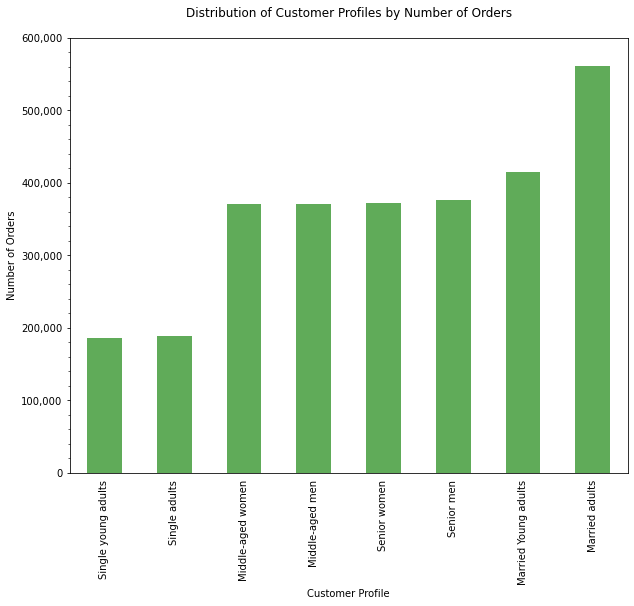


-----------------------------------------------------------------------------------------------------------------------------


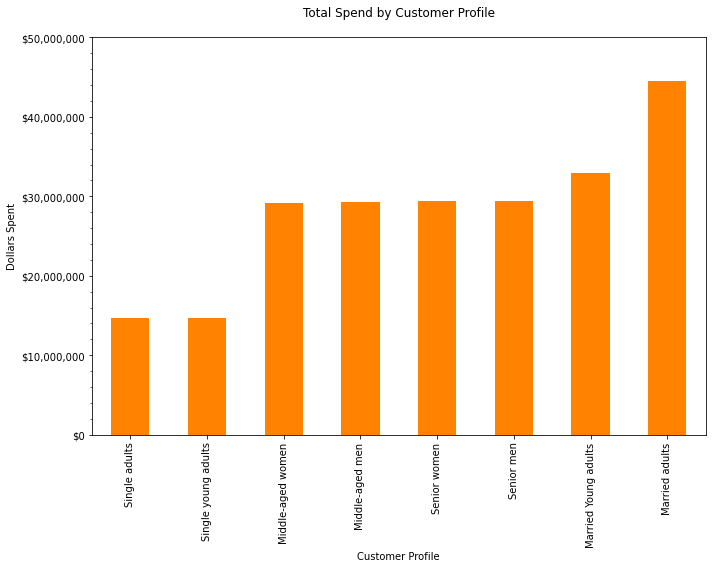


-----------------------------------------------------------------------------------------------------------------------------


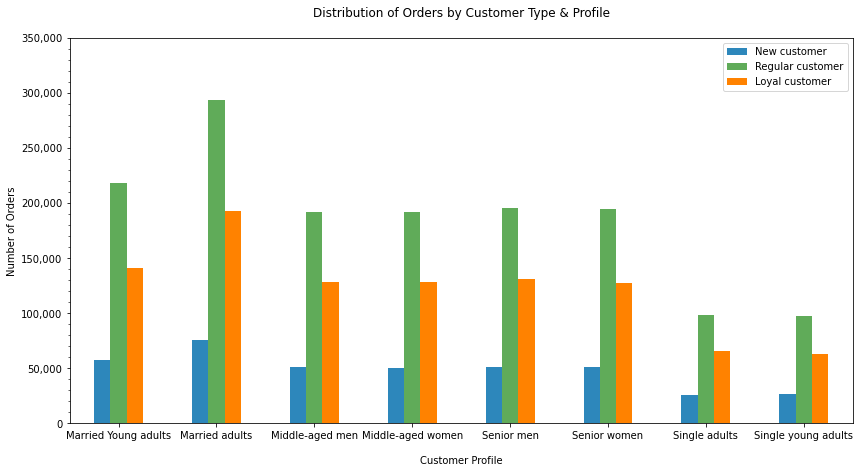


-----------------------------------------------------------------------------------------------------------------------------


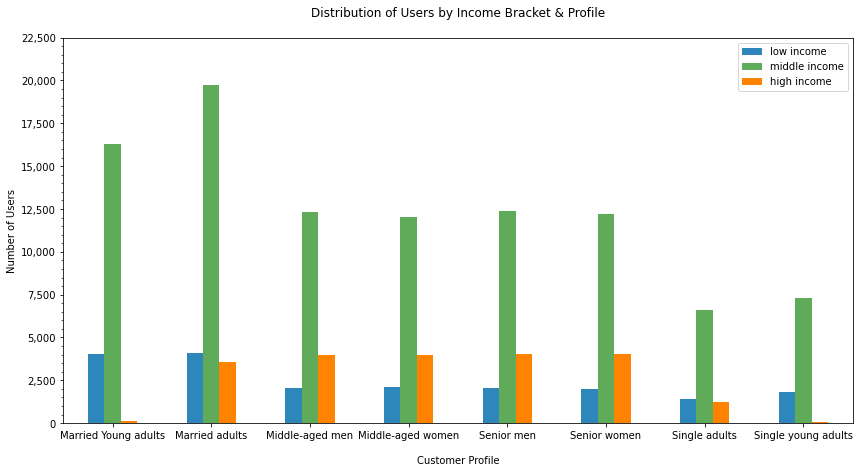


-----------------------------------------------------------------------------------------------------------------------------


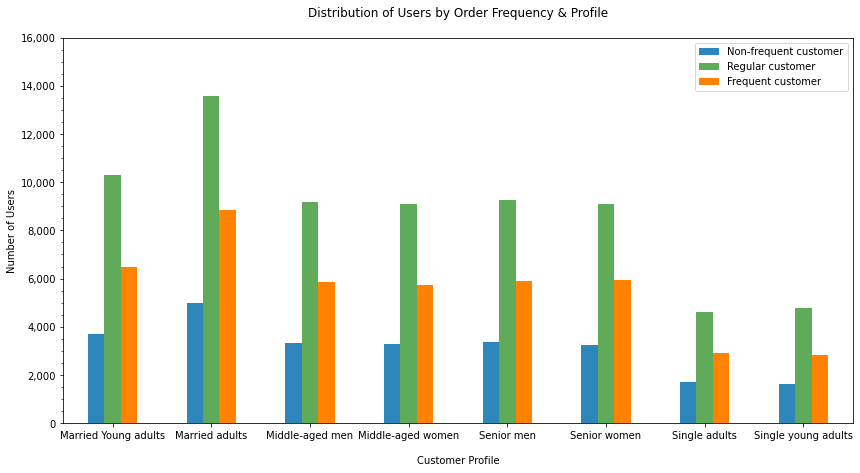


-----------------------------------------------------------------------------------------------------------------------------


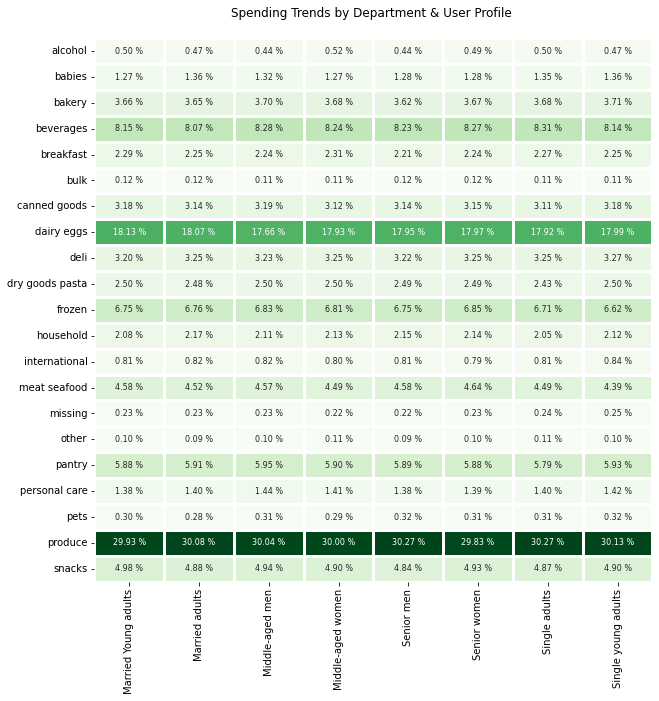

In [34]:
# Utilizing a function to display different methods of distribution within customer profiles
def profile_viz():
    # Grouping profiles by unique number of user ids to visualize the number of users by profile
    profile_chart = order_products_all.groupby('profile').user_id.nunique().reset_index().sort_values(by='user_id').plot.bar(
        x='profile', legend=False, color='#2d87bb',title='Distribution of Customer Profiles by Number of Users\n',
        xlabel = 'Customer Profile', ylabel = 'Number of Users', figsize=(10,8))
    # Adding elements to the chart and formatting the number labels
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', bottom=False)
    ticks_loc = profile_chart.get_yticks().tolist()
    profile_chart.set_yticks(profile_chart.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    # Saving chart to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_user_chart.png'), dpi=300)
    plt.show(profile_chart)
    print('\n' + ('-') * 125)
    
    # Grouping profiles by unqiue order ids to visualize the number of orders by profile
    order_chart = order_products_all.groupby('profile').order_id.nunique().reset_index().sort_values(by='order_id').plot.bar(
        x='profile', legend=False, color='#60ab59',title='Distribution of Customer Profiles by Number of Orders\n',
        xlabel = 'Customer Profile', ylabel = 'Number of Orders', figsize=(10,8))
    # Adding elements to the chart and formatting the number labels
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', bottom=False)
    ticks_loc = order_chart.get_yticks().tolist()
    order_chart.set_yticks(order_chart.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    # Saving chart to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_order_count_chart.png'), dpi=300)
    plt.show(order_chart)
    print('\n' + ('-') * 125)
    
    # Grouping profile by prices to visualize the total spend of each profile
    spend_chart = order_products_all.groupby('profile').prices.sum().reset_index().sort_values(by='prices').plot.bar(
        x='profile', y='prices', legend=False, color = '#ff8200', title='Total Spend by Customer Profile\n', 
        xlabel = 'Customer Profile', ylabel = 'Dollars Spent', figsize=(10,8))
    # Adding style elements to the chart to improve readabilty
    ticks_loc = spend_chart.get_yticks().tolist()
    spend_chart.set_yticks(spend_chart.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    # Adding minor ticks to y-axis
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    # Saving chart to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_spend_chart.png'), dpi=300)
    plt.show(spend_chart)
    print('\n' + ('-') * 125)
    
    # Grouping profiles by loyalty_flag and unique user ids to visualize the distribution of profiles within loyalty type
    loyalty_bar = order_products_all.groupby(['profile', 'loyalty_flag']).order_id.nunique().unstack(
        'loyalty_flag').plot.bar(figsize=(12,8), xlabel='\nCustomer Profile', ylabel='Number of Orders',
                                 title='Distribution of Orders by Customer Type & Profile\n',
                                 color=['#2d87bb','#60ab59','#ff8200'])
    # Adding style elements to the chart to improve readabilty
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(loc='best', ncol=1, fancybox=True)
    ticks_loc = loyalty_bar.get_yticks().tolist()
    loyalty_bar.set_yticks(loyalty_bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    # Saving chart to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_loyalty_chart.png'), dpi=300)
    plt.show(loyalty_bar)
    print('\n' + ('-') * 125)
    
    # Grouping profiles by order_frequency to visualize the distribution of profiles within order frequency types
    income_bar = order_products_all.groupby(['profile', 'income_bracket']).user_id.nunique().unstack(
        'income_bracket').plot.bar(figsize=(12,8), xlabel='\nCustomer Profile', ylabel='Number of Users',
                                    title='Distribution of Users by Income Bracket & Profile\n',
                                 color=['#2d87bb','#60ab59','#ff8200'])
    # Adding style elements to the chart to improve readabilty
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(loc='best', ncol=1, fancybox=True)
    ticks_loc = income_bar.get_yticks().tolist()
    income_bar.set_yticks(income_bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    # Saving chart to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'profile_income_bracket_chart.png'), dpi=300)
    plt.show(income_bar)
    print('\n' + ('-') * 125)
    
    freq_bar = order_products_all.groupby(['profile', 'order_frequency']).user_id.nunique().unstack(
        'order_frequency').plot.bar(figsize=(12,8), xlabel='\nCustomer Profile', ylabel='Number of Users',
                                    title='Distribution of Users by Order Frequency & Profile\n',
                                 color=['#2d87bb','#60ab59','#ff8200'])
    # Adding style elements to the chart to improve readabilty
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(loc='best', ncol=1, fancybox=True)
    ticks_loc = freq_bar.get_yticks().tolist()
    freq_bar.set_yticks(freq_bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    # Saving chart to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'profile_order_frequency_chart.png'), dpi=300)
    plt.show(freq_bar)
    print('\n' + ('-') * 125)
    
    #Creating a heatmap to visualize the regional spending differences between profiles and departments
    grouping = order_products_all.groupby(['department', 'profile']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'profile', 'prices'))
    
    #Creating % of column values
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    # Creating the heatmap object and adding style elements to improve readability
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False, vmin=0)
    plt.title('Spending Trends by Department & User Profile \n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    # Saving chart to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_heatmap.png'), dpi=300)
    plt.show(heatmap)
    

profile_viz()



In [231]:
testy.index

CategoricalIndex(['alcohol', 'babies', 'bakery', 'beverages', 'breakfast',
                  'bulk', 'canned goods', 'dairy eggs', 'deli',
                  'dry goods pasta', 'frozen', 'household', 'international',
                  'meat seafood', 'missing', 'other', 'pantry',
                  'personal care', 'pets', 'produce', 'snacks'],
                 categories=['alcohol', 'babies', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', ...], ordered=False, dtype='category', name='department')

### 10. Visualizing Single Young Adults Profile

##### a) Creating profile function and profile table

In [31]:
#/// The profile, table, and visualization functions for this profile are in individual cells to highlight the methodology
#/// behind grouping & visualzing the data and provide additional clarity. Future profiles will be coded into a single cell

# Assinging a segment of order_products_all to single_young_adults() function call based on 'single young adults' profile params
def single_young_adults(): 
    return order_products_all[(order_products_all.age.between(18,33)) & (order_products_all.dependants == 0) & 
                         (order_products_all.fam_status == 'single')]

# Utilizing a function to create a table based on single_young_adults
def single_young_adults_profile_table():
    # Creating a table to:  
    # 1). Aggregate the mean, min, and max of 'avg_prod_price' 
    # 2). Show the frequency, max, and min of orders
    # by age in the 'single young adults' profile. Style elements are utilized in the table to aid readabilty and to
    # highlight the min and max values by column
    return single_young_adults().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(single_young_adults_profile_table())

##### b) Creating visualization of dollars spent by age in Single Young Adults Profile

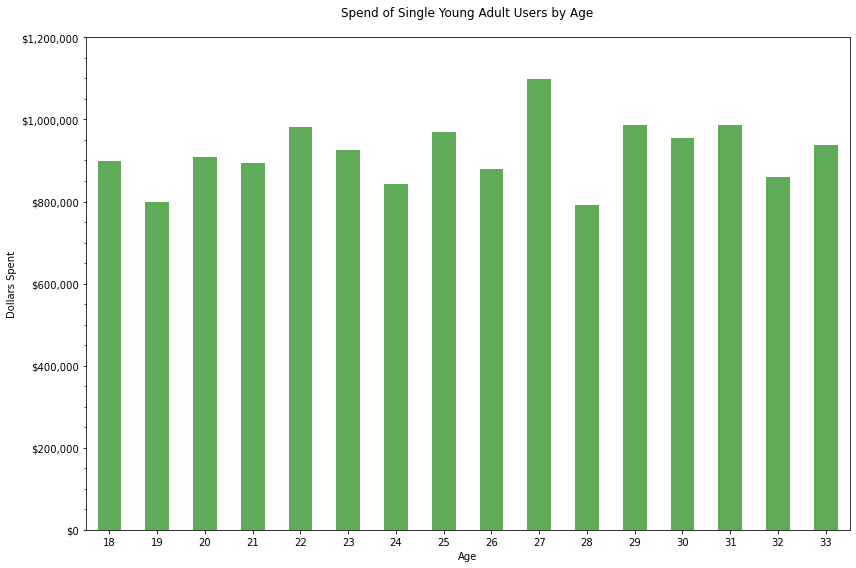

In [28]:
# Creating a bar chart from the 'single young adults' profile to visualize the spend of customers by age in this profile
# by utilizing a function
def single_young_adults_spend_chart():
    
    # Defining bar chart params from single_young_adults() profile.
    bar = single_young_adults().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Single Young Adult Users by Age\n', 
        legend=False, color='#60ab59', xlabel = 'Age', ylabel='Dollars Spent', figsize=(12,8))
    # Adding chart elements to aid readability
    
    # Changing y-tick labels from scientific notation
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    
    # Changing x-axis label rotation and adding minor ticks to y-axis
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    
    # Saving chart to .png file in Instacart Basket Data > 04 Analysis > Visualizations
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_young_adults_spend_chart.png'), dpi=300)
    return bar

# Calling the function to show bar chart in output cell
plt.show(single_young_adults_spend_chart())

##### c) Visualizing gender distribution in Single Young Adults profile

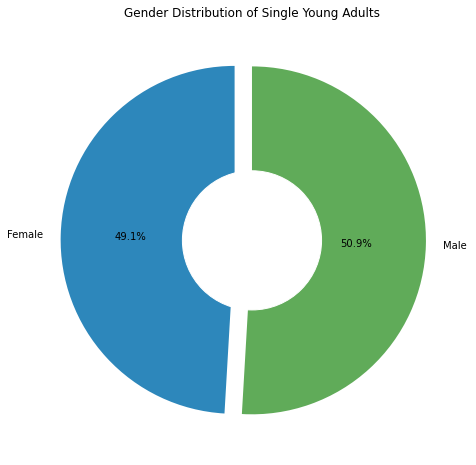

In [29]:
#Creating a donut chart to illustrate the distribution of users in profiles that don't already distinguish between gender

def single_young_adults_donut():
    # Grouping profile subset by 'gender' and number of unique userids and plotting onto pie chart
    donut = single_young_adults().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='', title='Gender Distribution of Single Young Adults', legend= False, autopct='%1.1f%%',startangle=90,
        colors=['#2d87bb','#60ab59'],explode=[0.1,0],figsize = (8,8))
    # Creating a blank white circle object to add on top of pie chart for donut effect
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    # Saving figure to Visualizations folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_young_adults_donut_chart.png'), dpi=300)
    
    return donut

plt.show(single_young_adults_donut())

##### d) Visualizing the top departments in the Single Young Adults profile

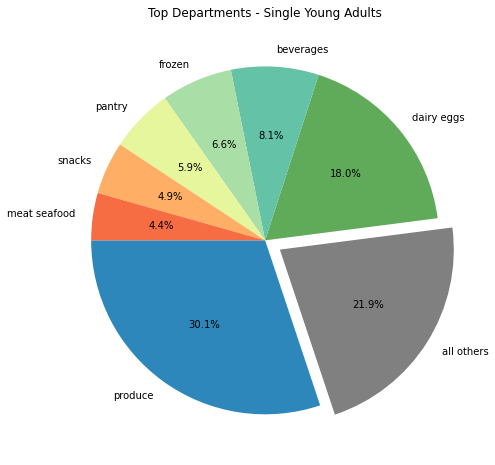

In [30]:
# Creating a pie chart from the 'single young adults' profile to visualize the spend of customers by department 

def single_young_adults_pie():
    # Assigning a temporary variable to the young adults profile Data Frame via single_young_adults() function call
    x = single_young_adults()
    # Creating an empty dict to store pie values
    dep_dict = {}
    # Defining total spend of young adults profile data frame
    total = x.prices.sum()
    # Assigning temporary variable to store 'All other' percetnage values for pie chart
    i = 0
    # Iterating over each department to find the total spend per department, dividing by overall total spend & creating the
    # percentage of total spend by multiplying by 100
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        # If percentage of total spend is greater than 4% then department and percentage are added to dep_dict
        if value > 4:
            dep_dict[dep] = value
        # If percentage of total spend is less than 4% then percentage is added to i    
        else:
            i += value
    # Percentage value of i is assigned to 'all others' in pie chart 
    dep_dict['all others'] = i
    # Creating the pie chart based on Data Frame created from dep_dict dictionary, adding labels, setting the decimal limit,
    # assigning a color palette and exploding the slice with "all other" departments 
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080','#60ab59','#64c2a6', '#aadea7','#e6f69d', '#feae65','#f66d44','#c37d34',
                '#fff1c9', '#EA5F89'], explode=[0,0.1,0,0,0,0,0,0])
    plt.title('Top Departments - Single Young Adults')
    # Saving figure to Visualization folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_young_adults_pie_chart.png'), dpi=300)
    return pie
    
plt.show(single_young_adults_pie())

##### e) Visualizing the distribution of users by customer type in the Single Young Adults profile

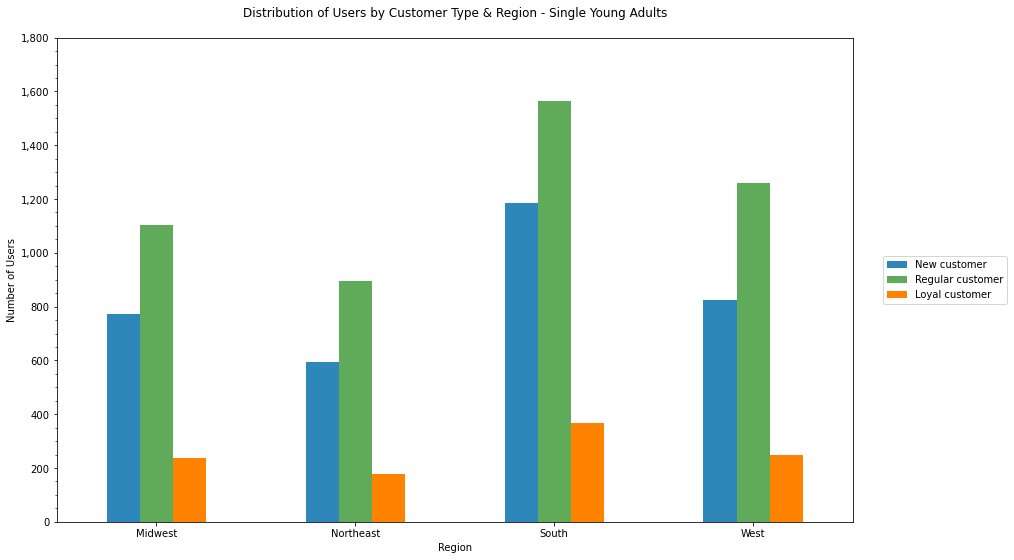

In [31]:
# Creating a bar chart from the 'single young adults' profile to visualize the distribution of users by customer type
def single_young_adults_loyalty_bar():
    # Creating the barchart by grouping region and loyalty_flag from single_young_adults(), then using unstack seperate
    # customer loyalty type by region
    bar = single_young_adults().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack(
        'loyalty_flag').plot.bar(figsize=(12,8), xlabel='Region', ylabel='Number of Users', 
                                 color=['#2d87bb','#60ab59','#ff8200'])
    # Adding style elements to the chart to improve readabilty
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Single Young Adults\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    # Saving figure to Visualizations folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_young_adults_loyalty_chart.png'), dpi=300)
    return bar

plt.show(single_young_adults_loyalty_bar())

##### e) Visualizing the the difference in total amount spent by department & across regions

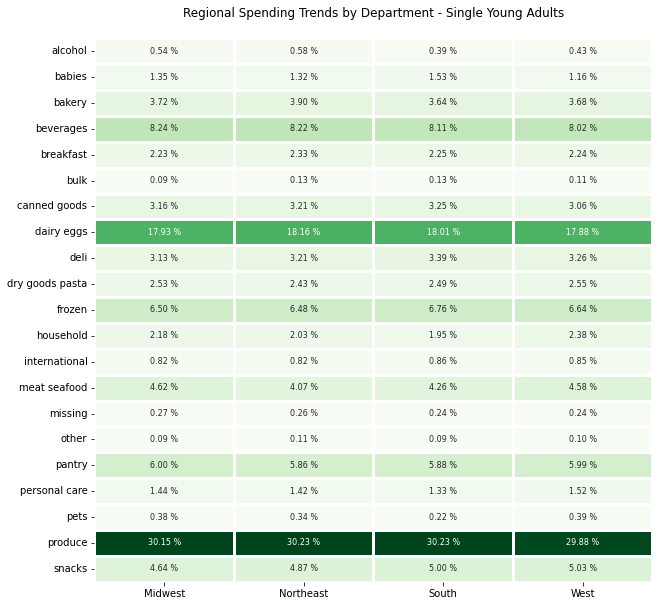

In [32]:
# Creating a heatmap from the 'single young adults' profile to visualize the difference in total ammount spent by department
# and across different regions 
def single_young_adults_heatmap():
    # Creating the heatmap by grouping the profile subset by department and region and then aggregating the sum of the
    # 'prices' column. Then using pivot to reshape the data table
    grouping = single_young_adults().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    # Creating the heatmap object and adding style elements to improve readability
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar=False)
    plt.title('Regional Spending Trends by Department - Single Young Adults\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    # Saving the chart to the Visualizations folder
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_young_adults_heatmap.png'), dpi=300)
    
    
    return heatmap

plt.show(single_young_adults_heatmap())

### 11. Additional Profile Visualizations

##### 1. Single Adults


-----------------------------------------------------------------------------------------------------------------------------


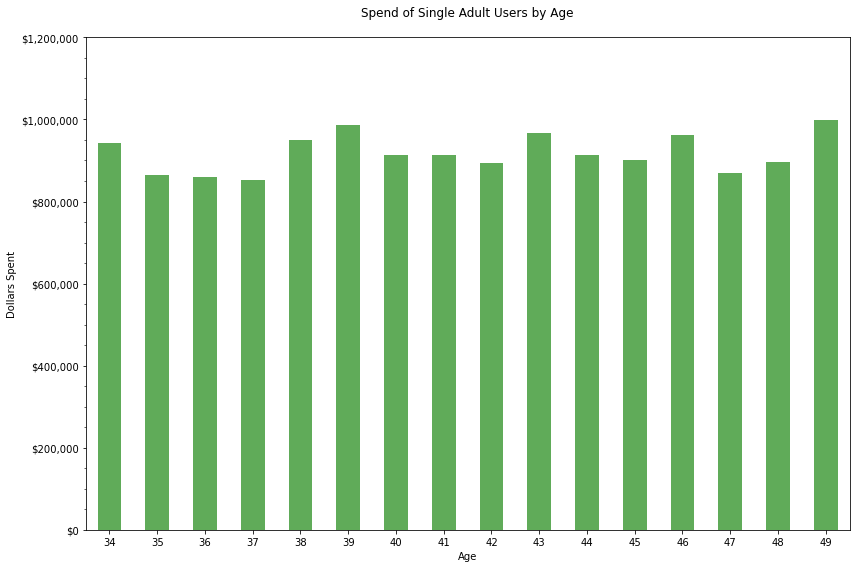


-----------------------------------------------------------------------------------------------------------------------------


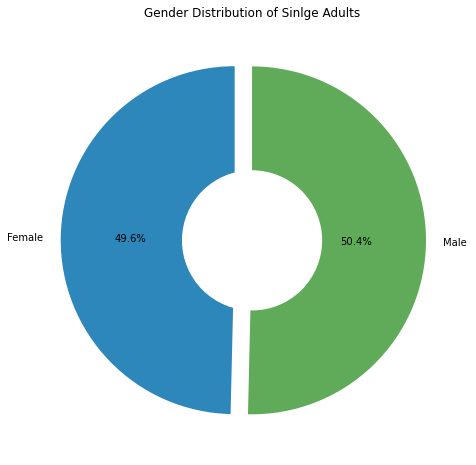


-----------------------------------------------------------------------------------------------------------------------------


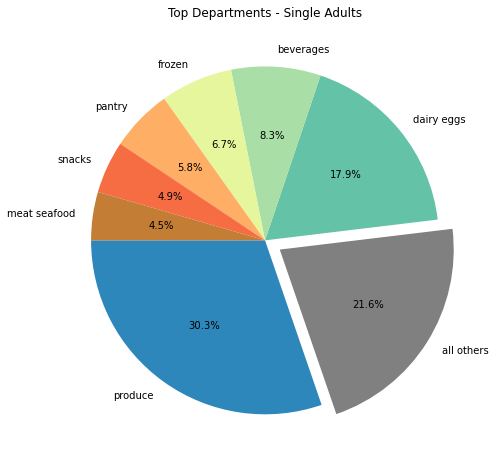


-----------------------------------------------------------------------------------------------------------------------------


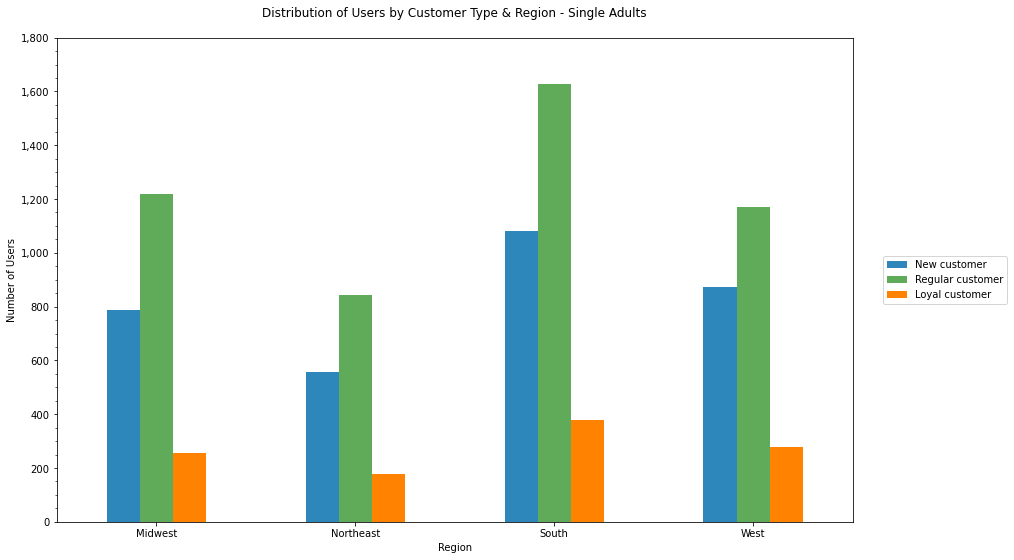


-----------------------------------------------------------------------------------------------------------------------------


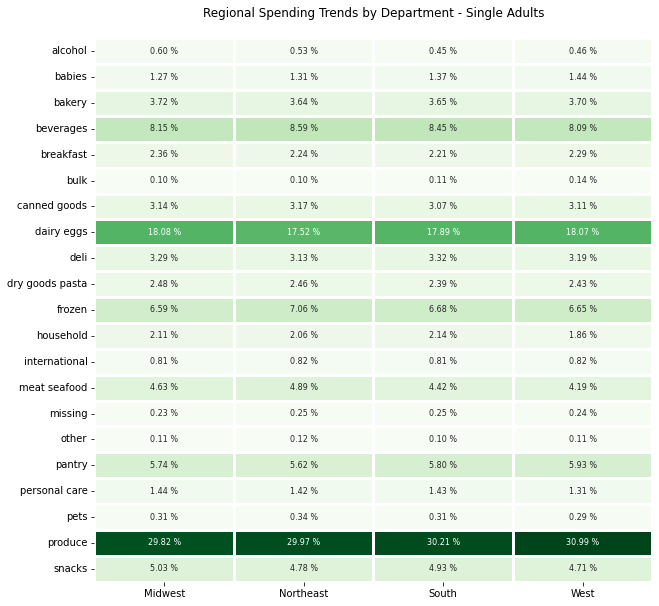

In [35]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def single_adults(): 
    return order_products_all[(order_products_all.age.between(34,49)) & (order_products_all.fam_status == 'single') 
                         & (order_products_all.dependants == 0)]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def single_adults_profile_table():
    return single_adults().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(single_adults_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def single_adults_spend_chart():
    bar = single_adults().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Single Adult Users by Age\n', 
        legend=False, color='#60ab59',  ylabel='Dollars Spent', xlabel='Age', figsize=(12,8))
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_adults_spend_chart.png'), dpi=300)
    return bar

plt.show(single_adults_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def single_adults_donut():
    donut = single_adults().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='', title='Gender Distribution of Sinlge Adults',legend= False, autopct='%1.1f%%', startangle=90, 
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_adults_donut_chart.png'), dpi=300)
    
    return donut

plt.show(single_adults_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def single_adults_pie():
    x = single_adults()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#64c2a6', '#aadea7', '#e6f69d', '#feae65','#f66d44', '#c37d34'],
        explode=[0,0.1,0,0,0,0,0,0])
    
    plt.title('Top Departments - Single Adults')
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'single_adults_pie_chart.png'), dpi=300)
    return pie
    
plt.show(single_adults_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def single_adults_loyalty_bar():
    bar = single_adults().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        xlabel='Region', ylabel='Number of Users',figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'])
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Single Adults\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_adults_loyalty_chart.png'), dpi=300)
    
    return bar

plt.show(single_adults_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def single_adults_heatmap():
    grouping = single_adults().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar=False)
    plt.title('Regional Spending Trends by Department - Single Adults\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'single_adults_heatmap.png'), dpi=300)

plt.show(single_adults_heatmap())

##### 2. Married Young Adults


-----------------------------------------------------------------------------------------------------------------------------


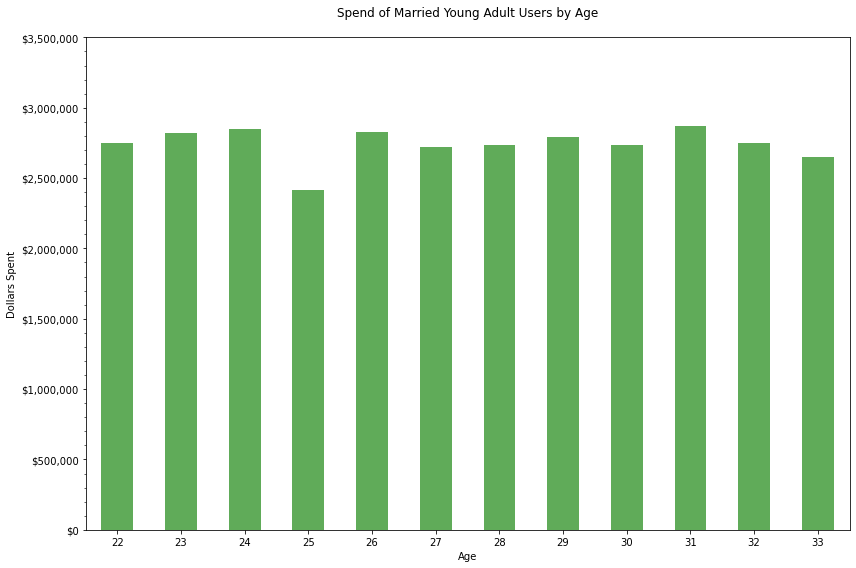


-----------------------------------------------------------------------------------------------------------------------------


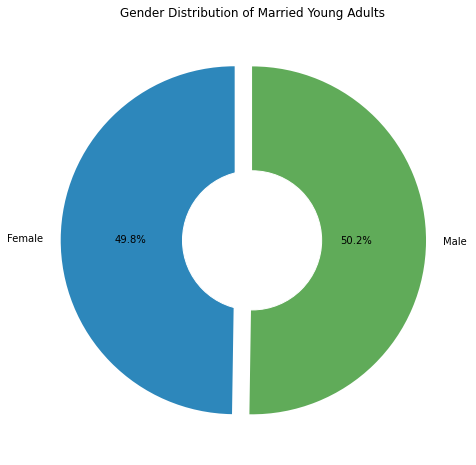


-----------------------------------------------------------------------------------------------------------------------------


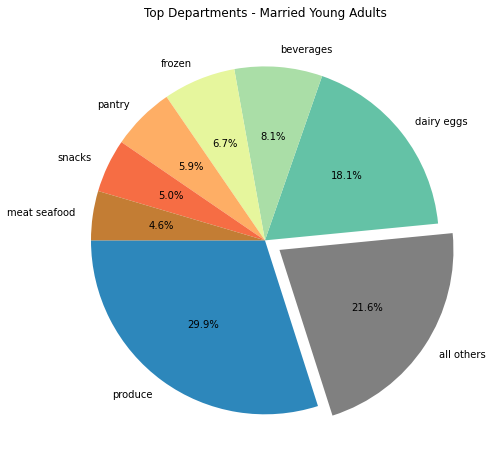


-----------------------------------------------------------------------------------------------------------------------------


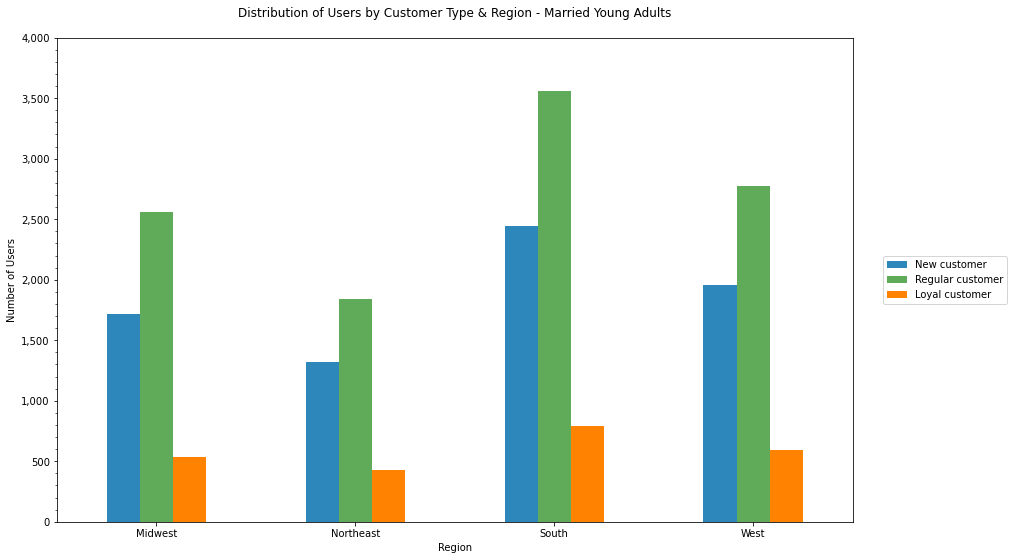


-----------------------------------------------------------------------------------------------------------------------------


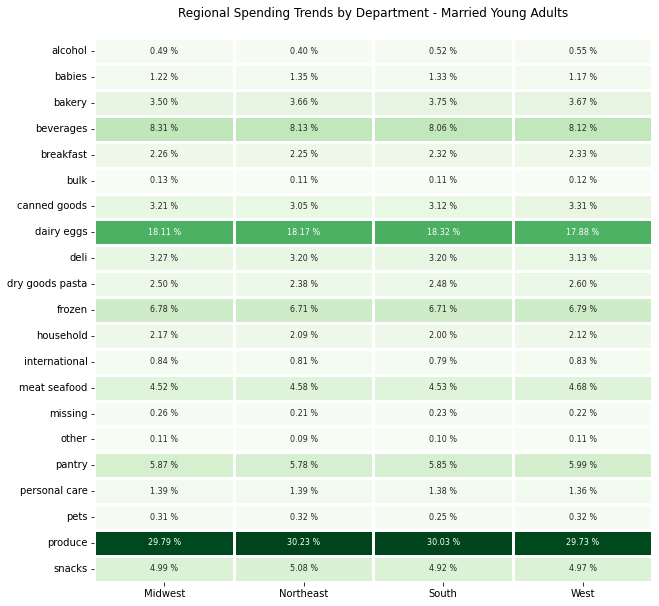

In [36]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_young_adults(): 
    return order_products_all[(order_products_all.age.between(18,33)) & (order_products_all.dependants > 0) & 
                         (order_products_all.fam_status == 'married')]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_young_adults_profile_table():
    return married_young_adults().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(married_young_adults_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_young_adults_spend_chart():
    bar = married_young_adults().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Married Young Adult Users by Age\n', 
        legend=False, color='#60ab59',  ylabel='Dollars Spent', xlabel='Age', figsize=(12,8))
    
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'married_young_adults_spend_chart.png'), dpi=300)
    return bar

plt.show(married_young_adults_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_young_adults_donut():
    donut = married_young_adults().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='', title='Gender Distribution of Married Young Adults', legend= False, autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'married_young_adults_donut_chart.png'), dpi=300)
    
    return donut

plt.show(married_young_adults_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_young_adults_pie():
    x = married_young_adults()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#64c2a6', '#aadea7', '#e6f69d', '#feae65', '#f66d44', '#c37d34'], 
        explode=[0,0.1,0,0,0,0,0,0])
    
    plt.title('Top Departments - Married Young Adults')
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'married_young_adults_pie_chart.png'), dpi=300)
    return pie
    
plt.show(married_young_adults_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_young_adults_loyalty_bar():
    bar = married_young_adults().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        xlabel='Region', ylabel='Number of Users',figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'])
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Married Young Adults\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'married_young_adults_loyalty_chart.png'), dpi=300)
    
    
    return bar

plt.show(married_young_adults_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_young_adults_heatmap():
    grouping = married_young_adults().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
        
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar= False)
    plt.title('Regional Spending Trends by Department - Married Young Adults\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'married_young_adults_heatmap.png'), dpi=300)

plt.show(married_young_adults_heatmap())

##### 3. Married Adults


-----------------------------------------------------------------------------------------------------------------------------


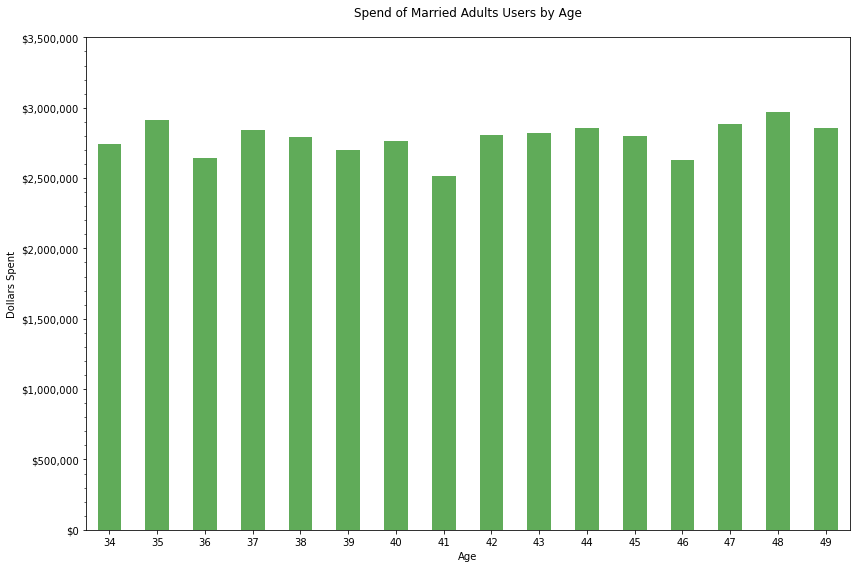


-----------------------------------------------------------------------------------------------------------------------------


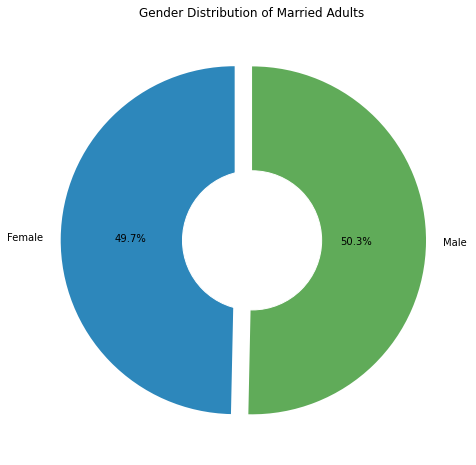


-----------------------------------------------------------------------------------------------------------------------------


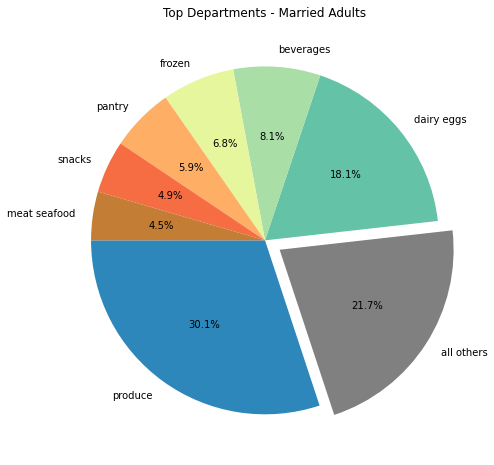


-----------------------------------------------------------------------------------------------------------------------------


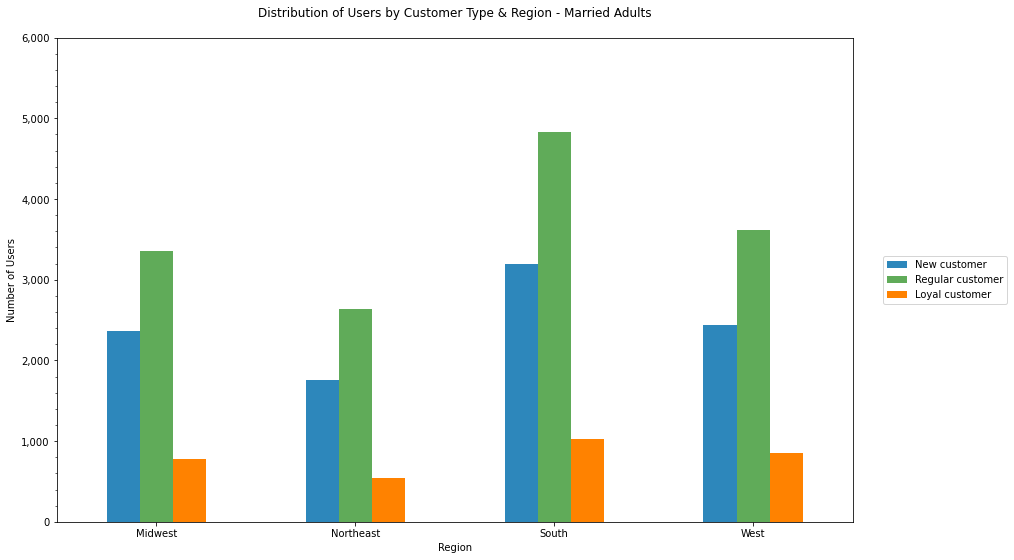


-----------------------------------------------------------------------------------------------------------------------------


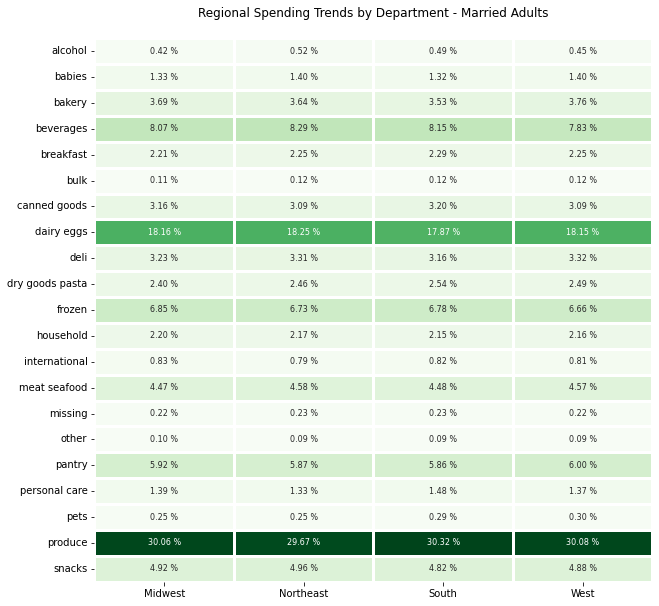

In [38]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_adults(): 
    return order_products_all[(order_products_all.age.between(34,49)) & (order_products_all.dependants > 0) & 
                         (order_products_all.fam_status == 'married')]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_adults_profile_table():
    return married_adults().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(married_adults_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_adults_spend_chart():
    bar = married_adults().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Married Adults Users by Age\n', 
        legend=False, color='#60ab59',  ylabel='Dollars Spent', xlabel='Age', figsize=(12,8))
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'married_adults_spend_chart.png'), dpi=300)
    return bar

plt.show(married_adults_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_adults_donut():
    donut = married_adults().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='', title = 'Gender Distribution of Married Adults', legend= False, autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'married_adults_donut_chart.png'), dpi=300)
    
    return donut

plt.show(married_adults_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_adults_pie():
    x = married_adults()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080','#64c2a6', '#aadea7','#e6f69d', '#feae65','#f66d44', '#c37d34'], 
        explode=[0,0.1,0,0,0,0,0,0])
    
    plt.title('Top Departments - Married Adults')
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'married_adults_pie_chart.png'), dpi=300)
    return pie
    
plt.show(married_adults_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_adults_loyalty_bar():
    bar = married_adults().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        xlabel='Region', ylabel='Number of Users',figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'])
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Married Adults\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'married_adults_loyalty_chart.png'), dpi=300)

    return bar

plt.show(married_adults_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def married_adults_heatmap():
    grouping = married_adults().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar=False)
    plt.title('Regional Spending Trends by Department - Married Adults\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'married_adults_heatmap.png'), dpi=300)

plt.show(married_adults_heatmap())

##### 4. Middle-Aged Men


-----------------------------------------------------------------------------------------------------------------------------


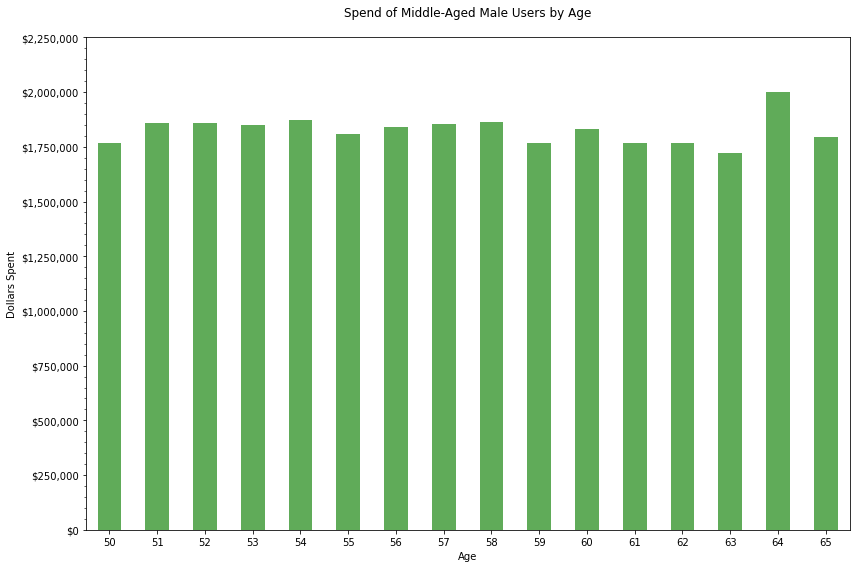


-----------------------------------------------------------------------------------------------------------------------------


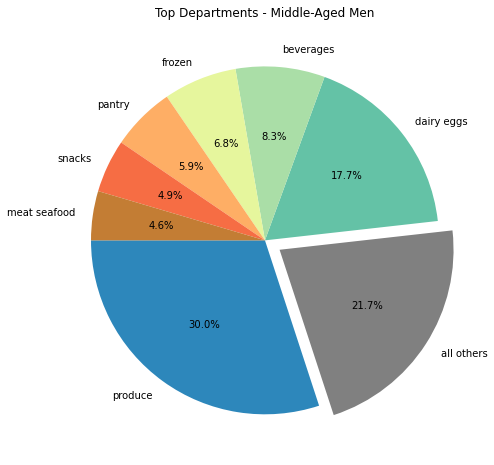


-----------------------------------------------------------------------------------------------------------------------------


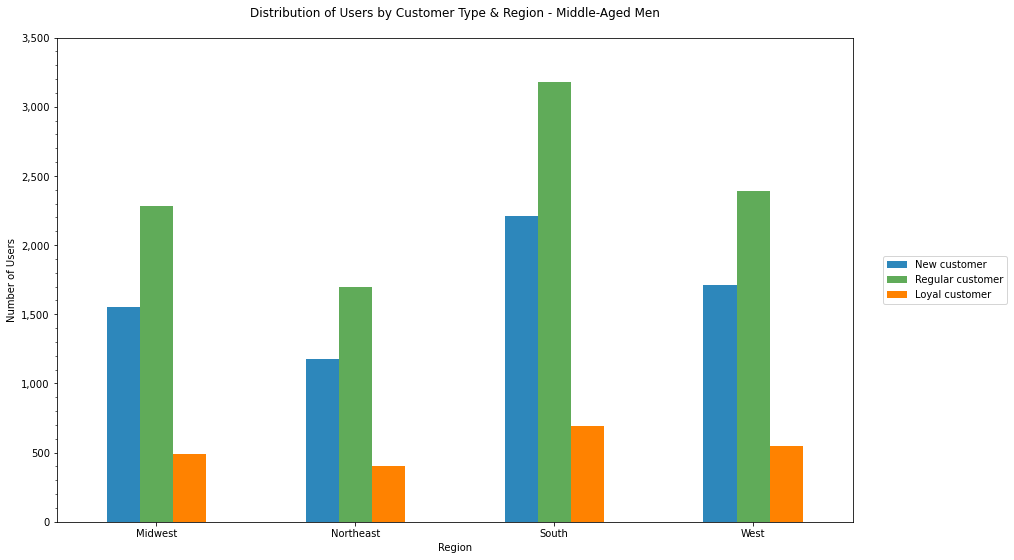


-----------------------------------------------------------------------------------------------------------------------------


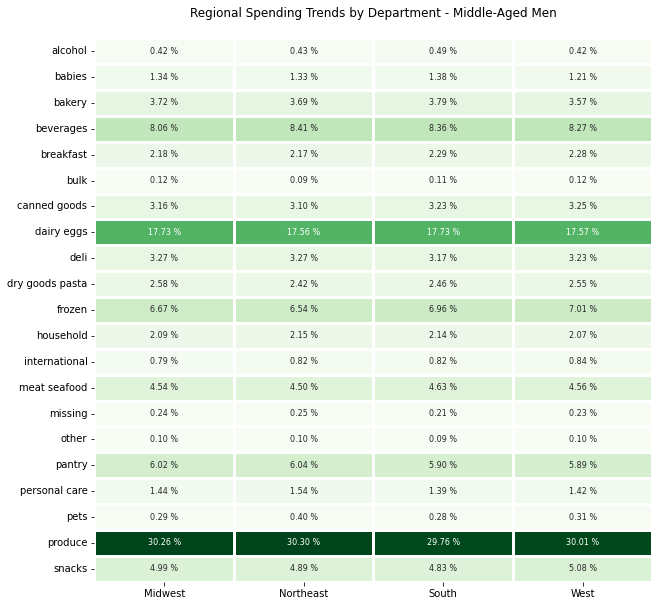

In [39]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_men(): 
    return order_products_all[(order_products_all.age.between(50,65)) & (order_products_all.gender == 'Male')]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_men_profile_table():
    return middle_men().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(middle_men_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_men_spend_chart():
    bar = middle_men().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Middle-Aged Male Users by Age\n', 
        legend=False, color='#60ab59',  ylabel='Dollars Spent', xlabel='Age', figsize=(12,8))
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_men_spend_chart.png'), dpi=300)
    return bar

plt.show(middle_men_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_men_pie():
    x = middle_men()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#64c2a6', '#aadea7', '#e6f69d', '#feae65', '#f66d44', '#c37d34'],
        explode=[0,0.1,0,0,0,0,0,0])
    
    plt.title('Top Departments - Middle-Aged Men')
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'middle_men_pie_chart.png'), dpi=300)
    return pie
    
plt.show(middle_men_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_men_loyalty_bar():
    bar = middle_men().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        xlabel='Region', ylabel='Number of Users',figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'])
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Middle-Aged Men\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'middle_men_loyalty_chart.png'), dpi=300)
    
    
    return bar

plt.show(middle_men_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_men_heatmap():
    grouping = middle_men().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar=False)
    plt.title('Regional Spending Trends by Department - Middle-Aged Men\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_men_heatmap.png'), dpi=300)

plt.show(middle_men_heatmap())

##### 5.  Middle-Aged Women


-----------------------------------------------------------------------------------------------------------------------------


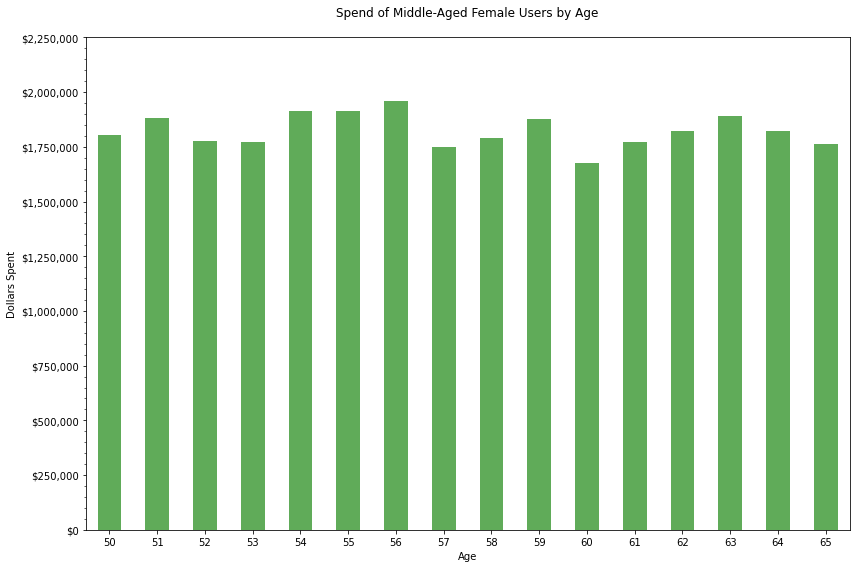


-----------------------------------------------------------------------------------------------------------------------------


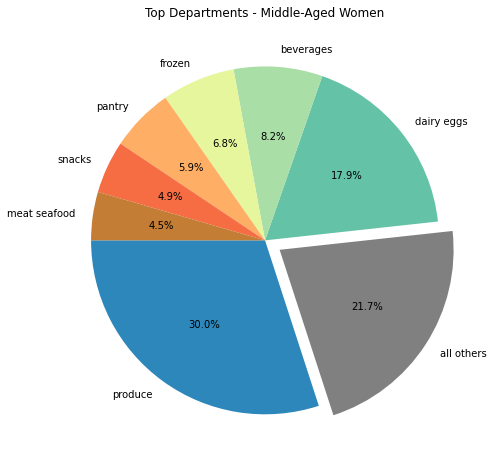


-----------------------------------------------------------------------------------------------------------------------------


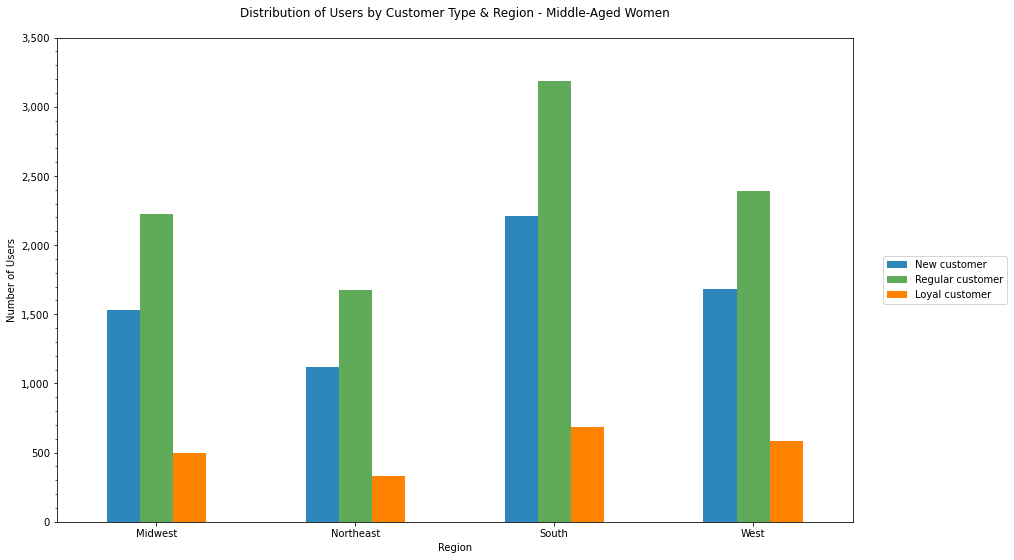


-----------------------------------------------------------------------------------------------------------------------------


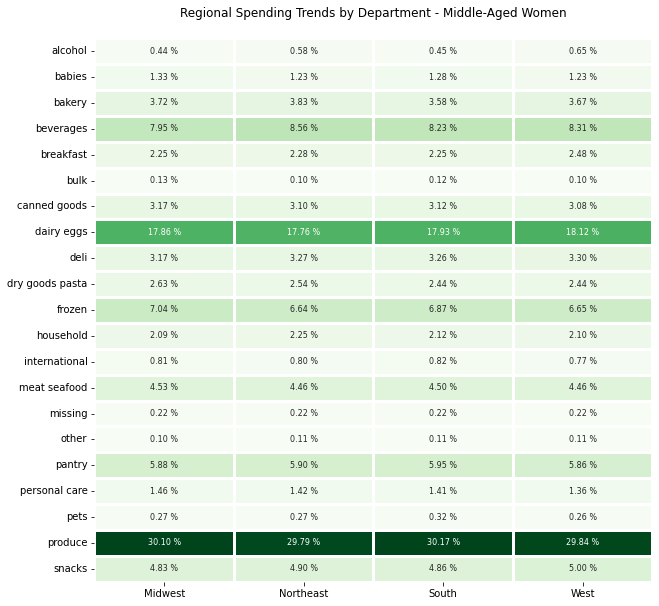

In [41]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_women(): 
    return order_products_all[(order_products_all.age.between(50,65)) & (order_products_all.gender == 'Female')]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_women_profile_table():
    return middle_women().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(middle_women_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_women_spend_chart():
    bar = middle_women().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Middle-Aged Female Users by Age\n', 
        legend=False, color='#60ab59',  ylabel='Dollars Spent', xlabel='Age', figsize=(12,8))
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_women_spend_chart.png'), dpi=300)
    return bar

plt.show(middle_women_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_women_pie():
    x = middle_women()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#64c2a6', '#aadea7', '#e6f69d', '#feae65', '#f66d44', '#c37d34'],
        explode=[0,0.1,0,0,0,0,0,0])
    
    plt.title('Top Departments - Middle-Aged Women')
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'middle_women_pie_chart.png'), dpi=300)
    return pie
    
plt.show(middle_women_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_women_loyalty_bar():
    bar = middle_women().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        xlabel='Region', ylabel='Number of Users',figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'])
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Middle-Aged Women\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'middle_women_loyalty_chart.png'), dpi=300)
    
    
    return bar

plt.show(middle_women_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_women_heatmap():
    grouping = middle_women().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar=False)
    plt.title('Regional Spending Trends by Department - Middle-Aged Women\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_women_heatmap.png'), dpi=300)

plt.show(middle_women_heatmap())

##### 6. Senior Men


-----------------------------------------------------------------------------------------------------------------------------


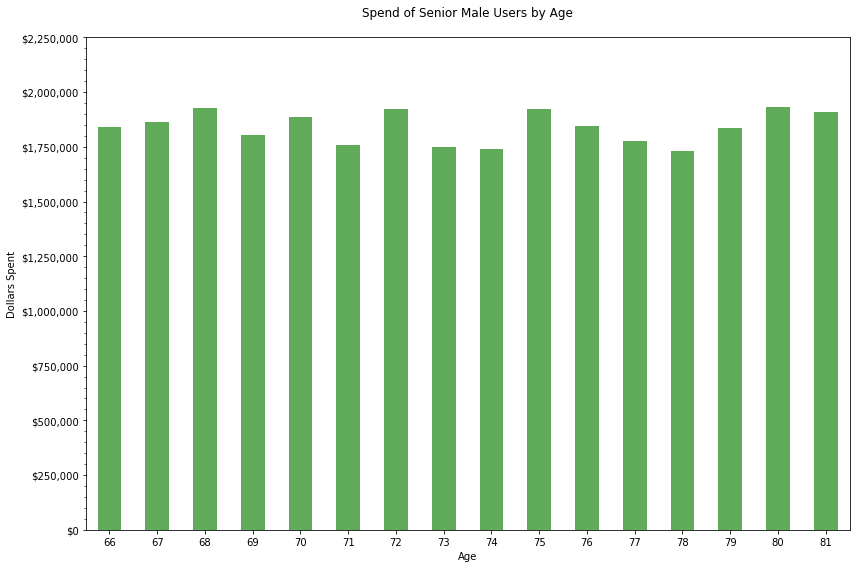


-----------------------------------------------------------------------------------------------------------------------------


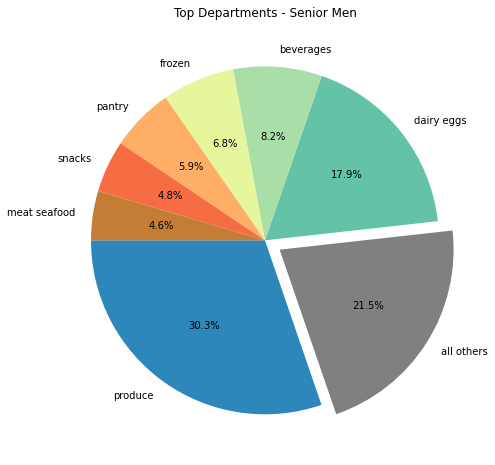


-----------------------------------------------------------------------------------------------------------------------------


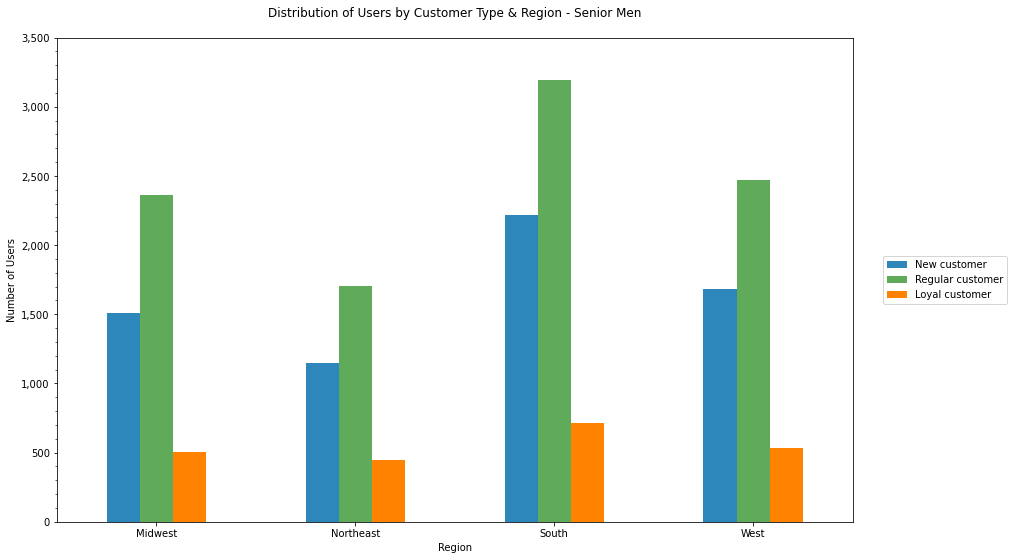


-----------------------------------------------------------------------------------------------------------------------------


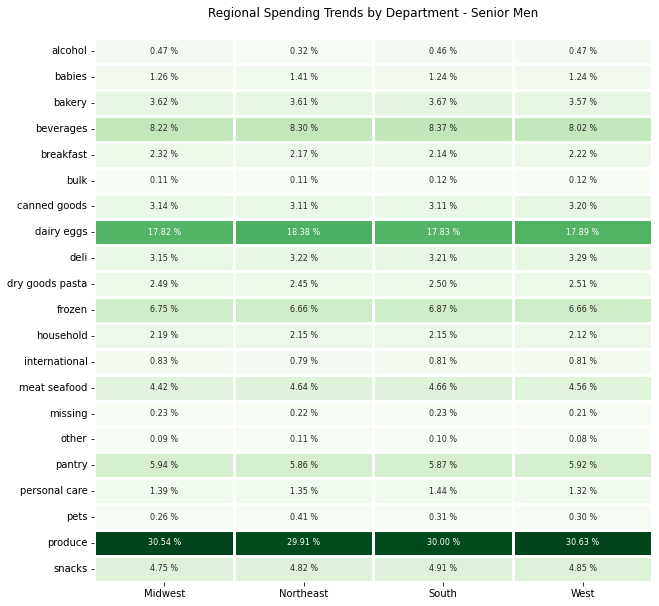

In [42]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_men(): 
    return order_products_all[(order_products_all.age > 65) & (order_products_all.gender == 'Male')]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_men_profile_table():
    return senior_men().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(senior_men_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_men_spend_chart():
    bar = senior_men().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Senior Male Users by Age\n', 
        legend=False, color='#60ab59',  ylabel='Dollars Spent', xlabel='Age', figsize=(12,8))
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'senior_men_spend_chart.png'), dpi=300)
    return bar

plt.show(senior_men_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_men_pie():
    x = senior_men()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%',startangle=180, 
        colors=['#2d87bb', '#808080', '#64c2a6', '#aadea7', '#e6f69d', '#feae65', '#f66d44', '#c37d34'],
        explode=[0,0.1,0,0,0,0,0,0])
    
    plt.title('Top Departments - Senior Men')
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'senior_men_pie_chart.png'), dpi=300)
    return pie
    
plt.show(senior_men_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_men_loyalty_bar():
    bar = senior_men().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        xlabel='Region', ylabel='Number of Users',figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'])
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Senior Men\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'senior_men_loyalty_chart.png'), dpi=300)
    
    
    return bar

plt.show(senior_men_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_men_heatmap():
    grouping = senior_men().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar=False)
    plt.title('Regional Spending Trends by Department - Senior Men\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'senior_men_heatmap.png'), dpi=300)

plt.show(senior_men_heatmap())

##### 7. Senior Women


-----------------------------------------------------------------------------------------------------------------------------


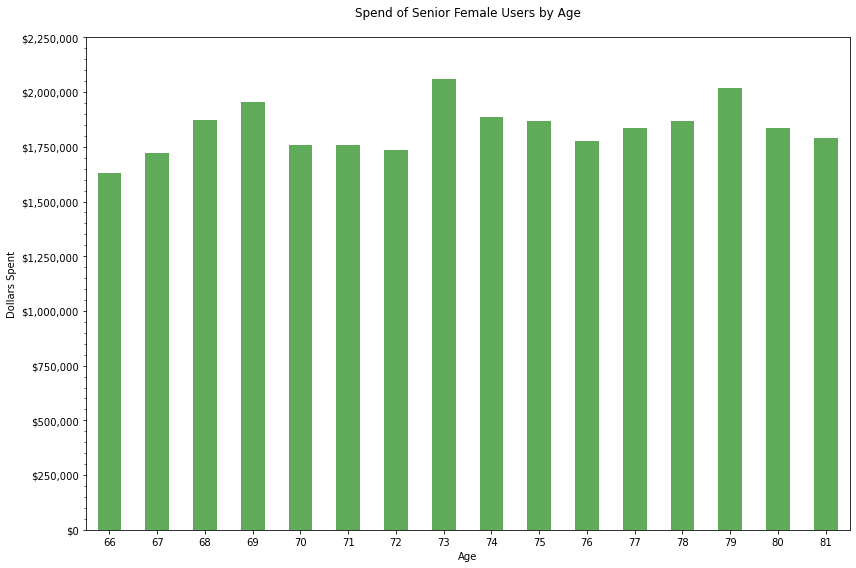


-----------------------------------------------------------------------------------------------------------------------------


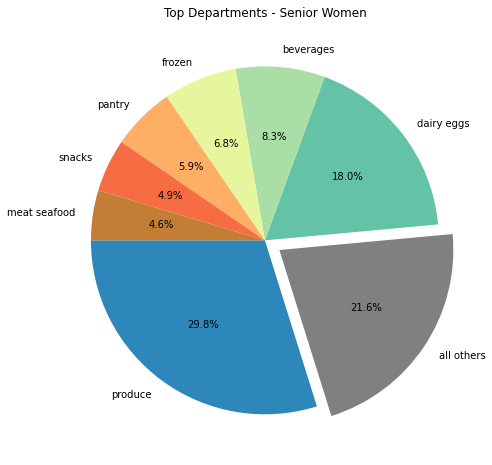


-----------------------------------------------------------------------------------------------------------------------------


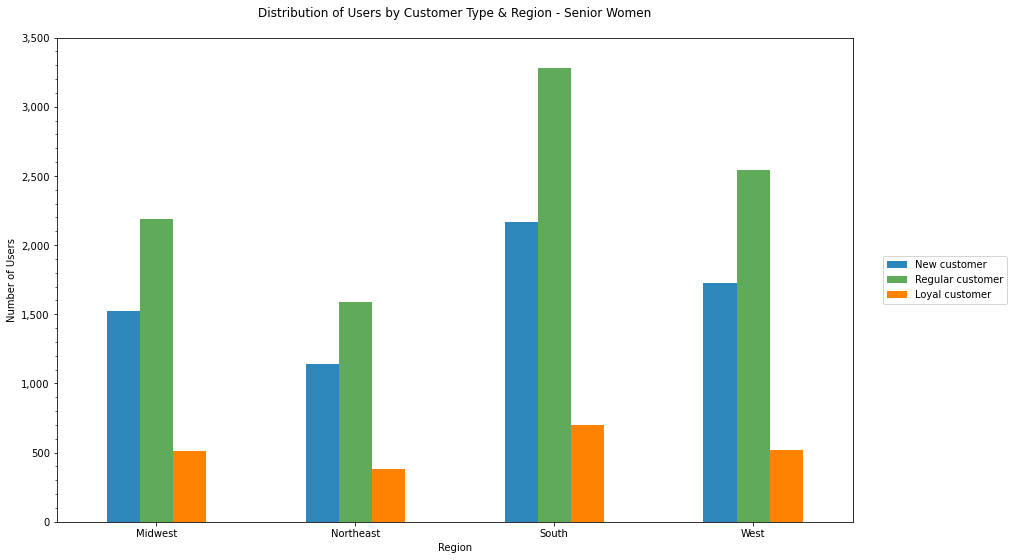


-----------------------------------------------------------------------------------------------------------------------------


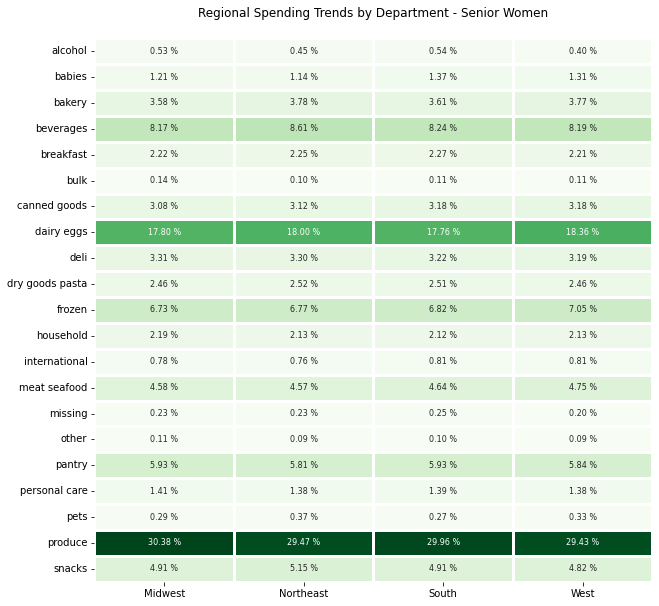

In [44]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_women(): 
    return order_products_all[(order_products_all.age > 65) & (order_products_all.gender == 'Female')]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_women_profile_table():
    return senior_women().groupby('age').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='age').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'age':'Age'}).style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(5), tr td:nth-child(6)', 'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(senior_women_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_women_spend_chart():
    bar = senior_women().groupby('age').prices.sum().astype('int').reset_index().sort_index().plot.bar(
        x='age', y='prices', title='Spend of Senior Female Users by Age\n', 
        legend=False, color='#60ab59',  ylabel='Dollars Spent', xlabel='Age', figsize=(12,8))
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'senior_women_spend_chart.png'), dpi=300)
    return bar

plt.show(senior_women_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_women_pie():
    x = senior_women()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#64c2a6', '#aadea7', '#e6f69d', '#feae65', '#f66d44', '#c37d34'],
        explode=[0,0.1,0,0,0,0,0,0])
    
    plt.title('Top Departments - Senior Women')
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'senior_women_pie_chart.png'), dpi=300)
    return pie
    
plt.show(senior_women_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_women_loyalty_bar():
    bar = senior_women().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        xlabel='Region', ylabel='Number of Users',figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'])
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Senior Women\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'senior_women_loyalty_chart.png'), dpi=300)
    
    return bar

plt.show(senior_women_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def senior_women_heatmap():
    grouping = senior_women().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Senior Women\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'senior_women_heatmap.png'), dpi=300)

plt.show(senior_women_heatmap())

##### 8. Vegans


-----------------------------------------------------------------------------------------------------------------------------


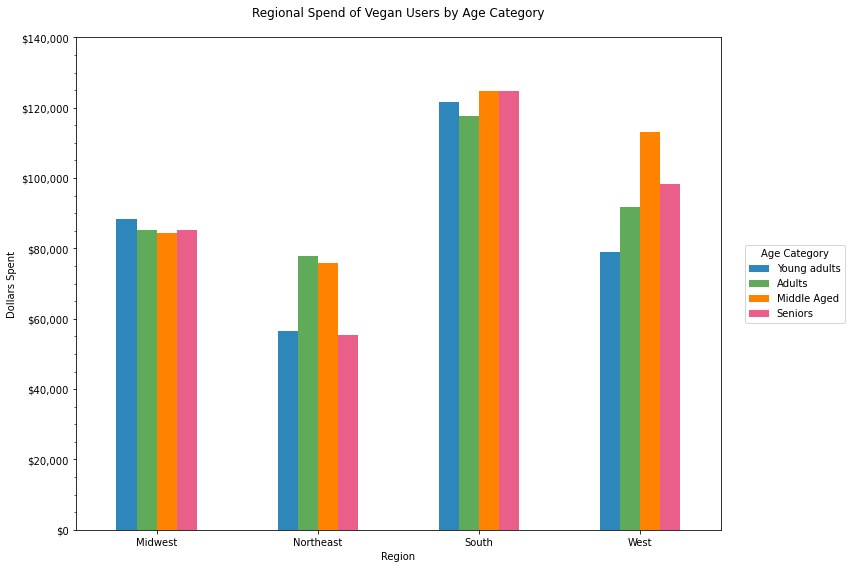


-----------------------------------------------------------------------------------------------------------------------------


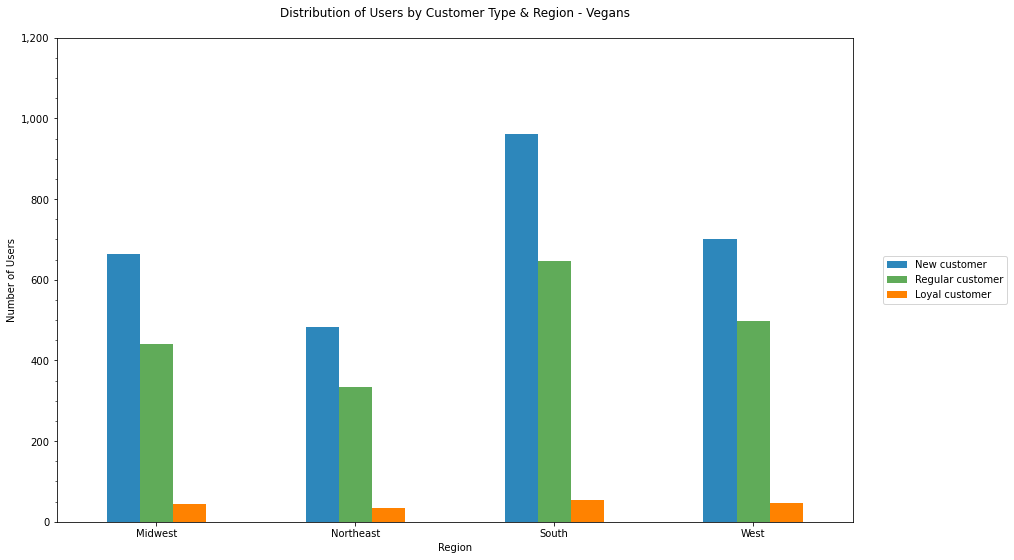


-----------------------------------------------------------------------------------------------------------------------------


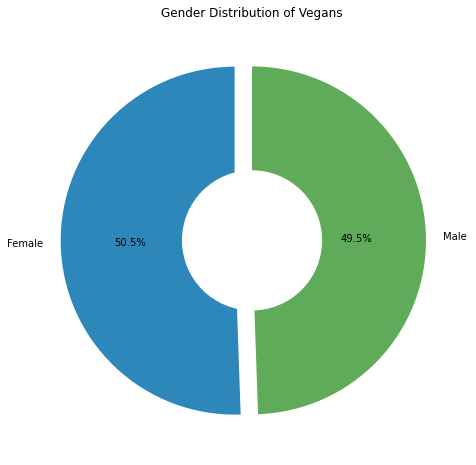


-----------------------------------------------------------------------------------------------------------------------------


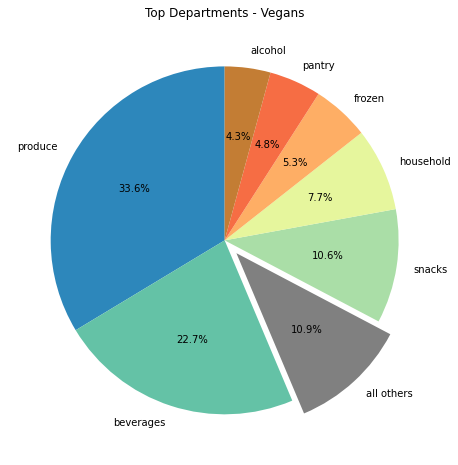


-----------------------------------------------------------------------------------------------------------------------------


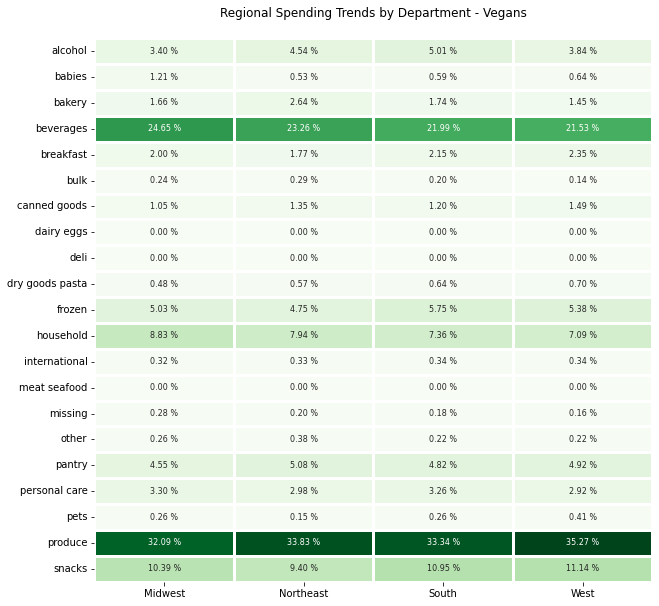

In [46]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def vegans():
    return order_products_all[(order_products_all.user_id.isin(
        list(order_products_all[order_products_all.department_id == 12]['user_id'].unique())) == False) 
                         & (order_products_all.user_id.isin(
                             list(order_products_all[order_products_all.department_id == 16]['user_id'].unique())) == False) 
                         & (order_products_all.user_id.isin(
                             list(order_products_all[order_products_all.department_id == 20]['user_id'].unique())) == False)]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def vegans_profile_table():
    return vegans().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 
             'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(vegans_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def vegans_spend_chart():
    bar = vegans().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8), xlabel='Region', ylabel='Dollars Spent', color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'],
    title='Regional Spend of Vegan Users by Age Category\n')

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'vegans_spend_chart.png'), dpi=300)

    return bar
       
plt.show(vegans_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def vegan_loyalty_bar():
    bar = vegans().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), xlabel='Region', ylabel='Number of Users', color=['#2d87bb','#60ab59','#ff8200'])
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Vegans\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'vegans_loyalty_chart.png'), dpi=300)
    
    return bar

plt.show(vegan_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def vegans_donut():
    donut = vegans().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Vegans', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'vegans_donut_chart.png'), dpi=300)
    
    return donut

plt.show(vegans_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def vegan_pie():
    x = vegans()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=90, 
        colors=['#2d87bb', '#64c2a6', '#808080', '#aadea7', '#e6f69d', '#feae65', '#f66d44', '#c37d34'],
        explode=[0,0,0.1,0,0,0,0,0])
    plt.title('Top Departments - Vegans')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'vegans_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(vegan_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def vegans_heatmap():
    grouping = vegans().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value

    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Vegans\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'vegans_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(vegans_heatmap())

##### 9. Pet Owners


-----------------------------------------------------------------------------------------------------------------------------


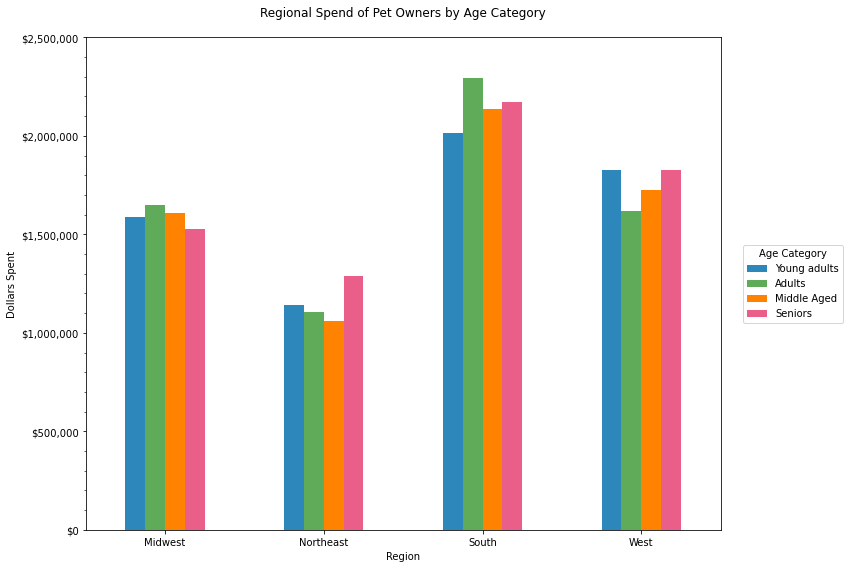


-----------------------------------------------------------------------------------------------------------------------------


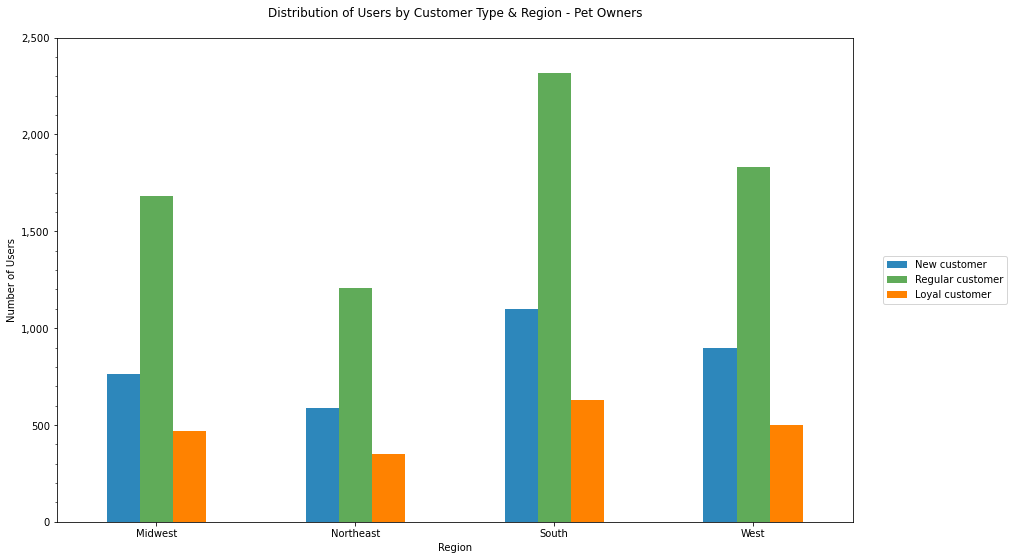


-----------------------------------------------------------------------------------------------------------------------------


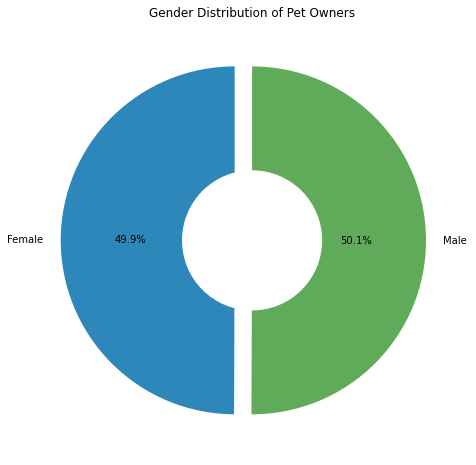


-----------------------------------------------------------------------------------------------------------------------------


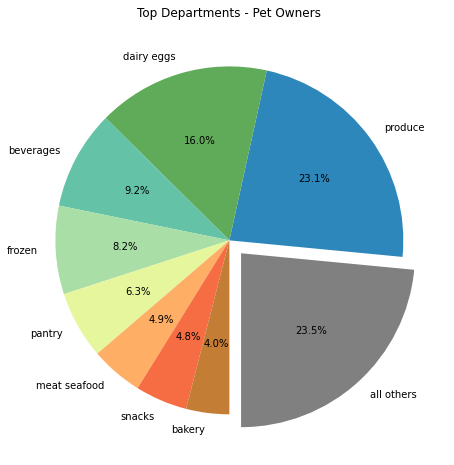


-----------------------------------------------------------------------------------------------------------------------------


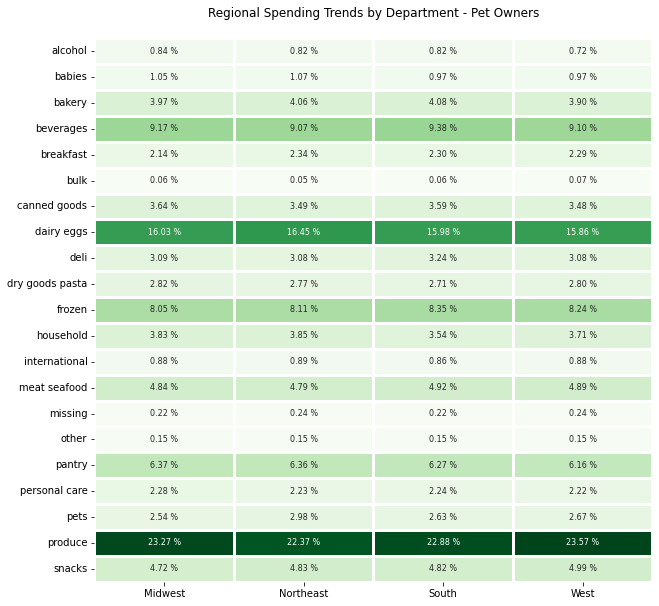

In [48]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def pet_owners():
    return order_products_all[order_products_all.user_id.isin(list(
        order_products_all[order_products_all.department_id == 8]['user_id'].unique()))]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def pet_owners_profile_table():
    return pet_owners().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 
             'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(pet_owners_profile_table())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def pet_owners_spend_chart():
    bar = pet_owners().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8), xlabel='Region', ylabel='Dollars Spent', title='Regional Spend of Pet Owners by Age Category\n',
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owners_spend_chart.png'), dpi=300)
    
    return bar
       
plt.show(pet_owners_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def pet_owners_loyalty_bar():
    bar = pet_owners().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), xlabel='Region', ylabel='Number of Users', color=['#2d87bb','#60ab59','#ff8200'])
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Pet Owners\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owners_loyalty_chart.png'), dpi=300)
    
    return bar

plt.show(pet_owners_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def pet_owners_donut():
    donut = pet_owners().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Pet Owners', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owners_donut_chart.png'), dpi=300)
    
    return donut

plt.show(pet_owners_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def pet_owners_pie():
    x = pet_owners()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=270, 
        colors=['#808080', '#2d87bb', '#60ab59', '#64c2a6', '#aadea7', '#e6f69d', '#feae65', '#f66d44', '#c37d34'],
        explode=[0.1,0,0,0,0,0,0,0,0])
                                                                                                      
    plt.title('Top Departments - Pet Owners')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owners_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(pet_owners_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def pet_owners_heatmap():
    grouping = pet_owners().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Pet Owners\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'pet_owner_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(pet_owners_heatmap())

##### 10. Alcohol Drinkers

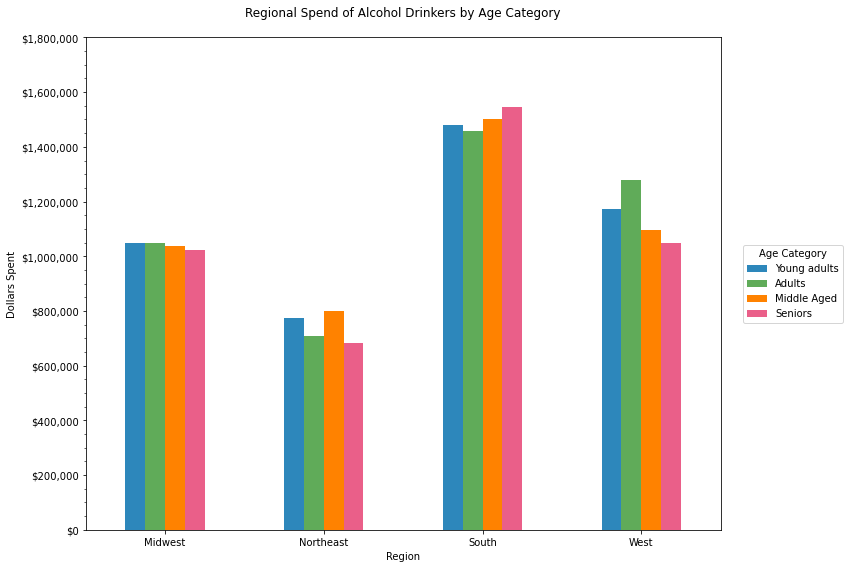


-----------------------------------------------------------------------------------------------------------------------------


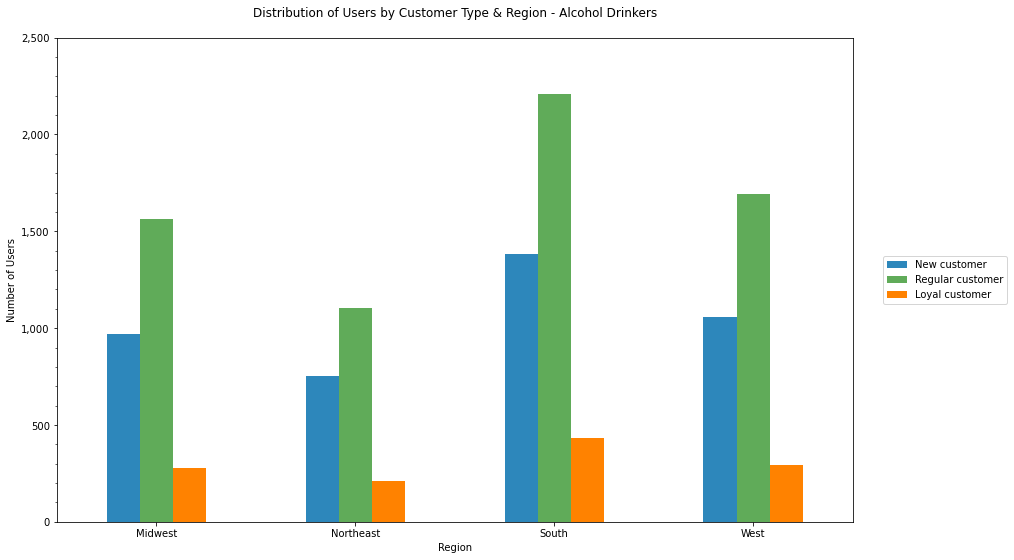


-----------------------------------------------------------------------------------------------------------------------------


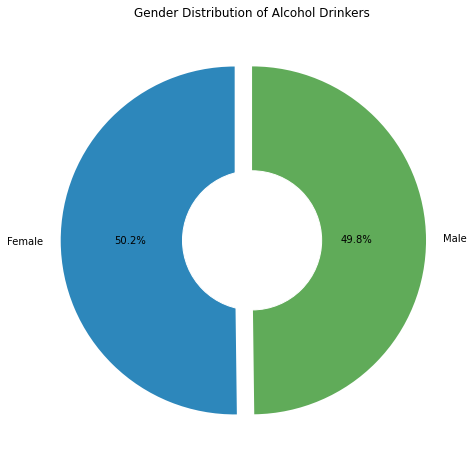


-----------------------------------------------------------------------------------------------------------------------------


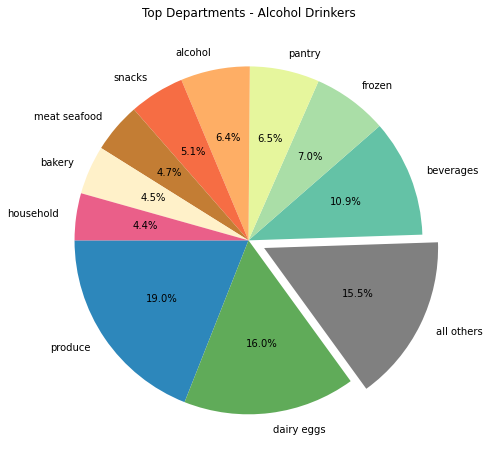


-----------------------------------------------------------------------------------------------------------------------------


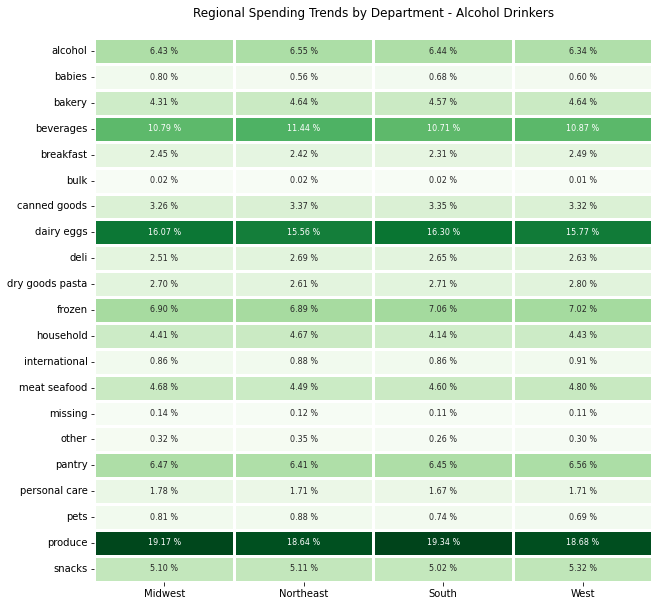

In [49]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def alcohol_drinkers():
    return order_products_all[order_products_all.user_id.isin(list(
        order_products_all[order_products_all.department_id == 5]['user_id'].unique()))]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def alcohol_drinkers_profile_table():
    return alcohol_drinkers().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 
             'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(alcohol_drinkers_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def alcohol_drinkers_spend_chart():
    bar = alcohol_drinkers().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8),xlabel='Region', ylabel='Dollars Spent',title='Regional Spend of Alcohol Drinkers by Age Category\n', 
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_drinkers_spend_chart.png'), dpi=300)
    
    return bar
       
plt.show(alcohol_drinkers_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def alcohol_drinkers_loyalty_bar():
    bar = alcohol_drinkers().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), xlabel='Region', ylabel='Number of Users',color=['#2d87bb','#60ab59','#ff8200'])
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Alcohol Drinkers\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_drinkers_loyalty_chart.png'), dpi=300)
    
    return bar

plt.show(alcohol_drinkers_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def alcohol_drinkers_donut():
    donut = alcohol_drinkers().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Alcohol Drinkers', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_drinkers_donut_chart.png'), dpi=300)
    
    return donut

plt.show(alcohol_drinkers_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def alcohol_drinkers_pie():
    x = alcohol_drinkers()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#60ab59', '#808080', '#64c2a6', '#aadea7', '#e6f69d', '#feae65', '#f66d44', 
                '#c37d34','#fff1c9', '#EA5F89'], explode=[0,0,0.1,0,0,0,0,0,0,0,0])
    plt.title('Top Departments - Alcohol Drinkers')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_drinkers_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(alcohol_drinkers_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def alcohol_drinkers_heatmap():
    grouping = alcohol_drinkers().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Alcohol Drinkers\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_drinkers_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(alcohol_drinkers_heatmap())

##### 11. Low-Income Users

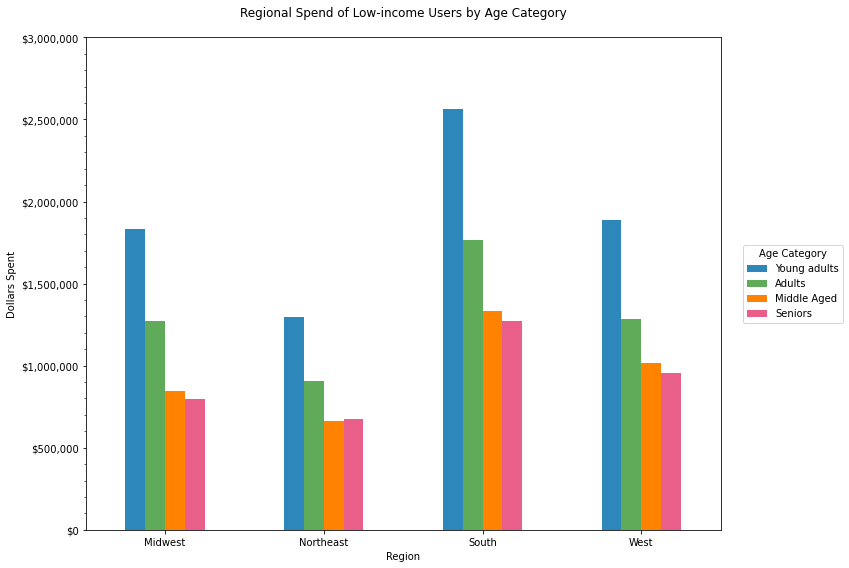


-----------------------------------------------------------------------------------------------------------------------------


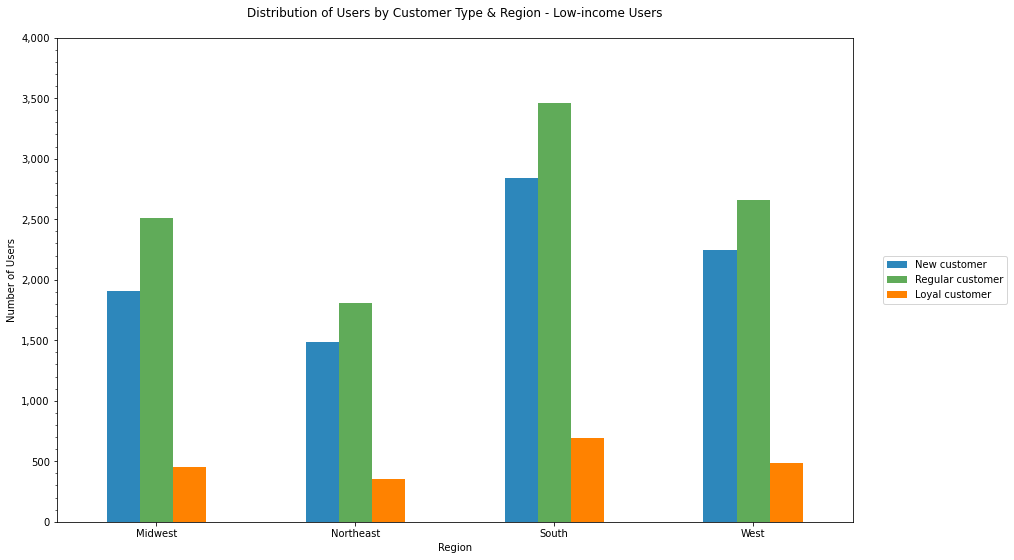


-----------------------------------------------------------------------------------------------------------------------------


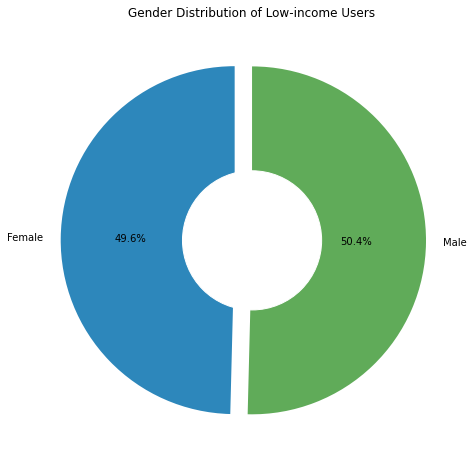


-----------------------------------------------------------------------------------------------------------------------------


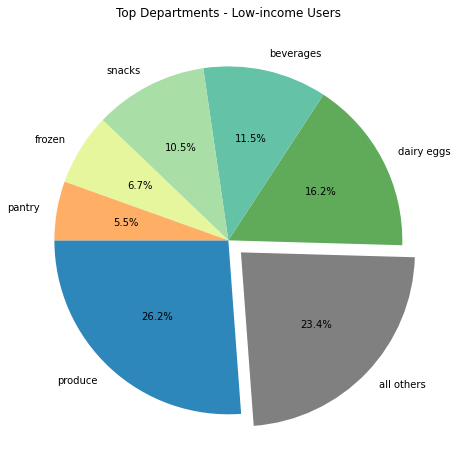


-----------------------------------------------------------------------------------------------------------------------------


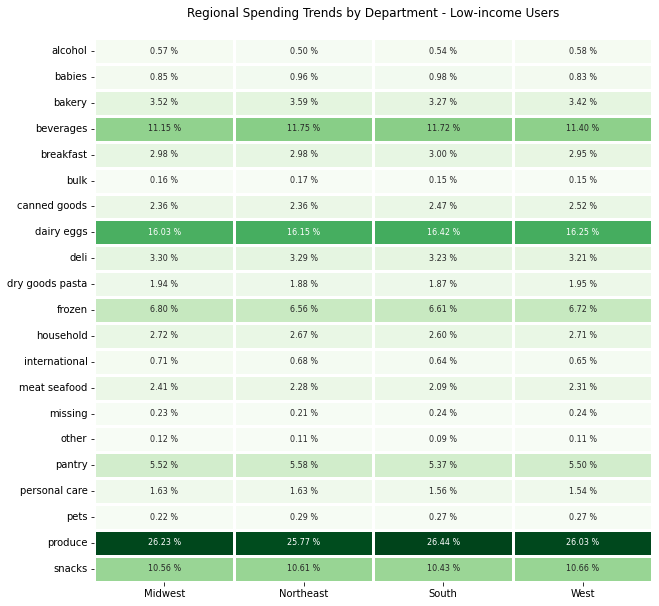

In [50]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def low_income():
    return order_products_all[order_products_all.income < 48500]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def low_income_profile_table():
    return low_income().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 
             'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(low_income_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def low_income_spend_chart():
    bar = low_income().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8), xlabel='Region', ylabel='Dollars Spent',title='Regional Spend of Low-income Users by Age Category\n',
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'low_income_spend_chart.png'), dpi=300)

    return bar

plt.show(low_income_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def low_income_loyalty_bar():
    bar = low_income().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'], xlabel='Region', ylabel='Number of Users')
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Low-income Users\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'low_income_loyalty_chart.png'), dpi=300)
    
    return bar
       
plt.show(low_income_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def low_income_donut():
    donut = low_income().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Low-income Users', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'low_income_donut_chart.png'), dpi=300)
    
    return donut

plt.show(low_income_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def low_income_pie():
    x = low_income()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
     colors=['#2d87bb', '#808080', '#60ab59', '#64c2a6','#aadea7', '#e6f69d',
             '#feae65', '#f66d44', '#c37d34','#fff1c9', '#EA5F89'], explode=[0,0.1,0,0,0,0,0])
    plt.title('Top Departments - Low-income Users')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'low_income_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(low_income_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def low_income_heatmap():
    grouping = low_income().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Low-income Users\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'low_income_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(low_income_heatmap())

##### 12. Middle-Income Users

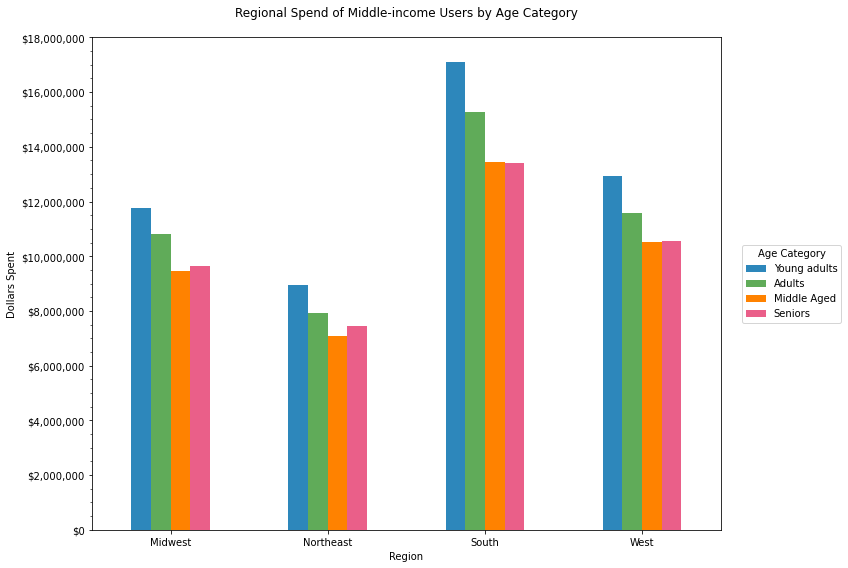


-----------------------------------------------------------------------------------------------------------------------------


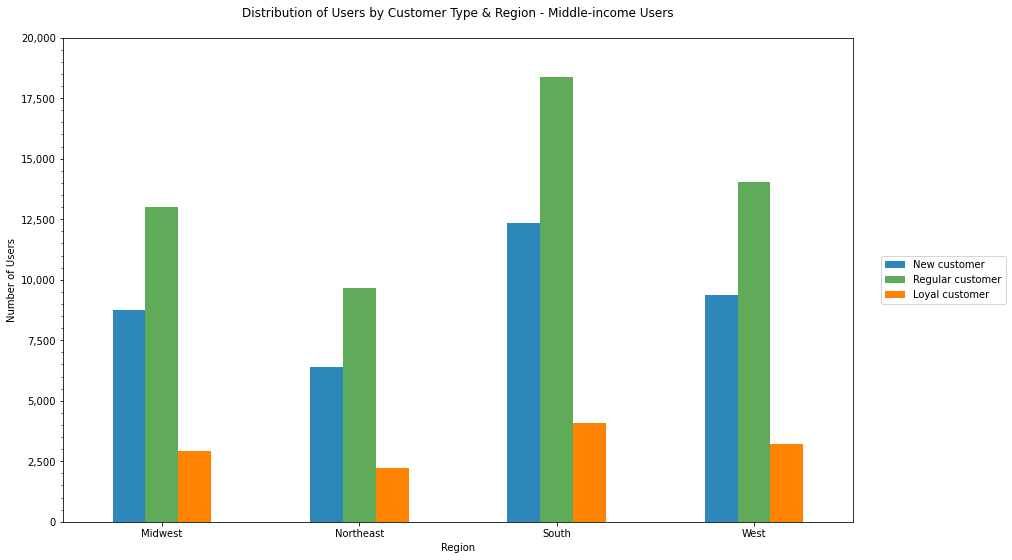


-----------------------------------------------------------------------------------------------------------------------------


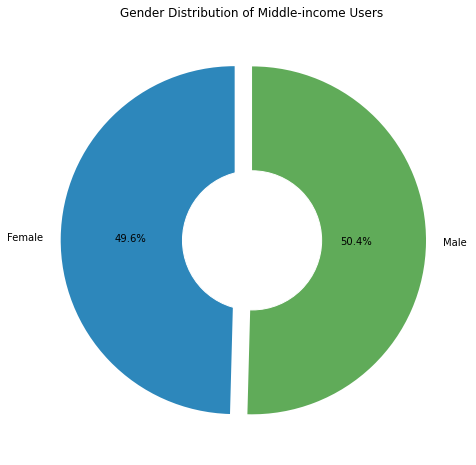


-----------------------------------------------------------------------------------------------------------------------------


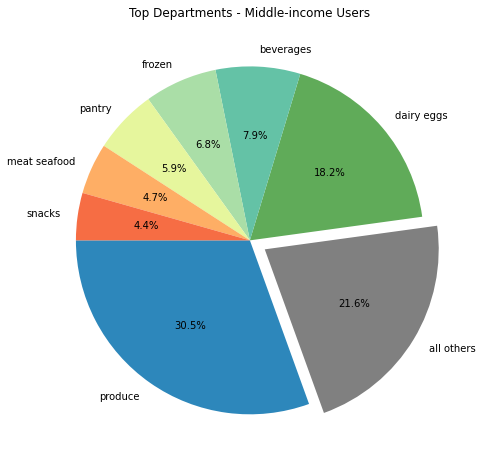


-----------------------------------------------------------------------------------------------------------------------------


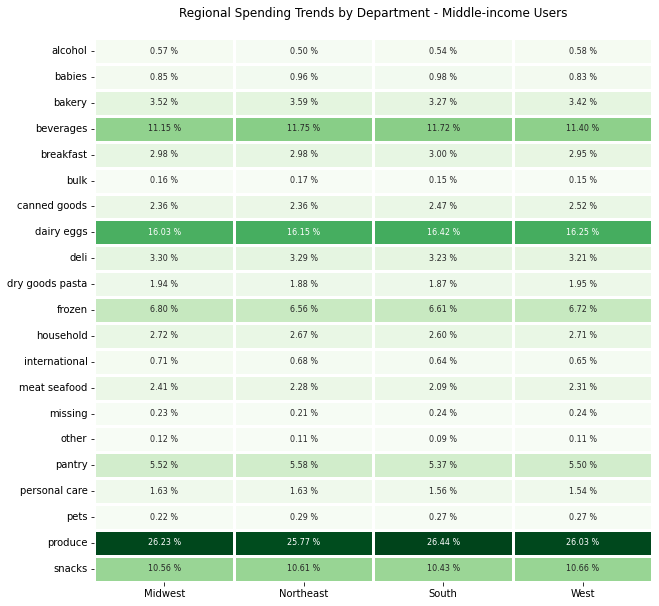

In [52]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_income():
    return order_products_all[(order_products_all.income >= 48500) & (order_products_all.income < 145000)]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_income_profile_table():
    return middle_income().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 
             'props': [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(middle_income_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_income_spend_chart():
    bar = middle_income().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8),xlabel='Region',ylabel='Dollars Spent',title='Regional Spend of Middle-income Users by Age Category\n',
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_income_spend_chart.png'), dpi=300)
    
    return bar

plt.show(middle_income_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_income_loyalty_bar():
    bar = middle_income().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'], xlabel='Region', ylabel='Number of Users')
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Middle-income Users\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_income_loyalty_chart.png'), dpi=300)
    return bar
       
plt.show(middle_income_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_income_donut():
    donut = middle_income().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Middle-income Users', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_income_donut_chart.png'), dpi=300)
    
    return donut

plt.show(middle_income_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_income_pie():
    x = middle_income()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#60ab59', '#64c2a6', '#aadea7', '#e6f69d',
                '#feae65', '#f66d44', '#c37d34','#fff1c9', '#EA5F89'], explode=[0,0.1,0,0,0,0,0,0])
    plt.title('Top Departments - Middle-income Users')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_income_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(middle_income_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def middle_income_heatmap():
    grouping = low_income().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Middle-income Users\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'middle_income_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(middle_income_heatmap())

##### 13. High-Income Users

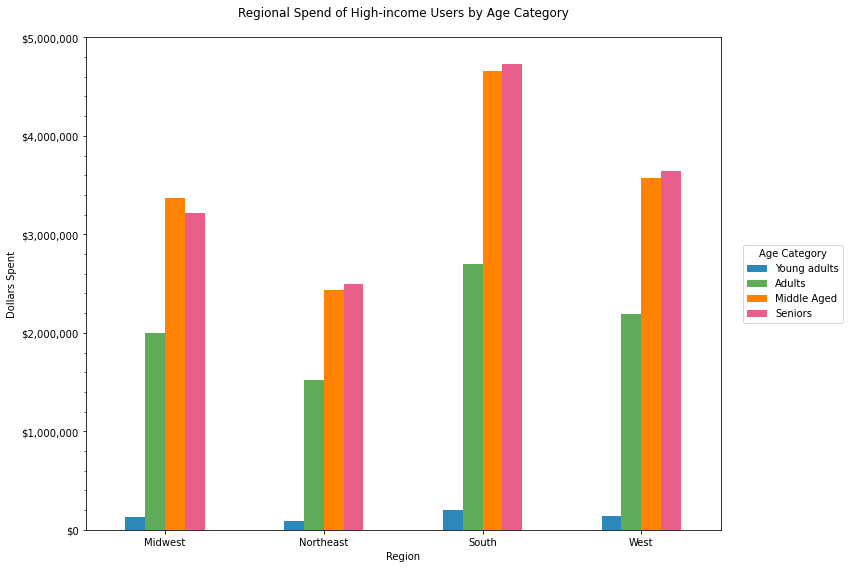


-----------------------------------------------------------------------------------------------------------------------------


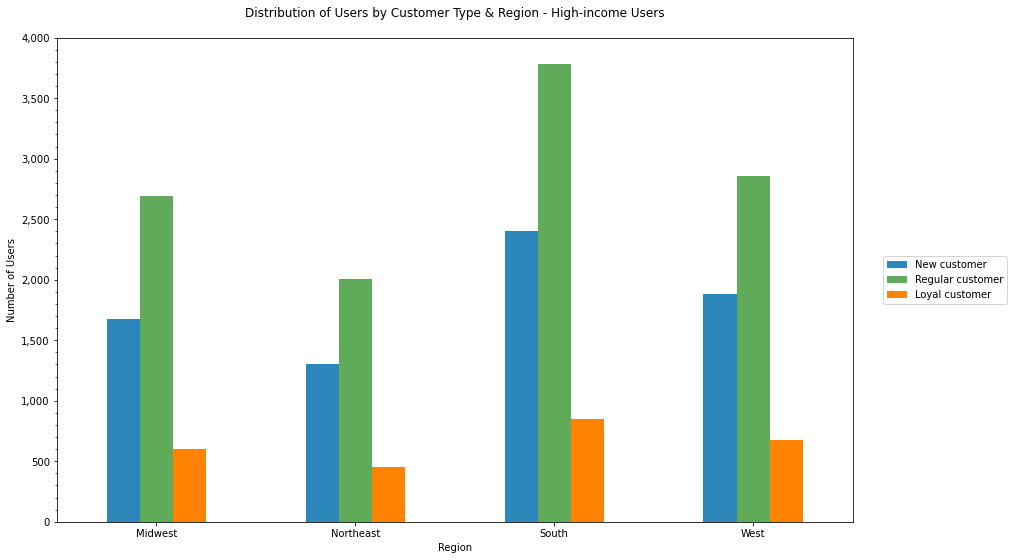


-----------------------------------------------------------------------------------------------------------------------------


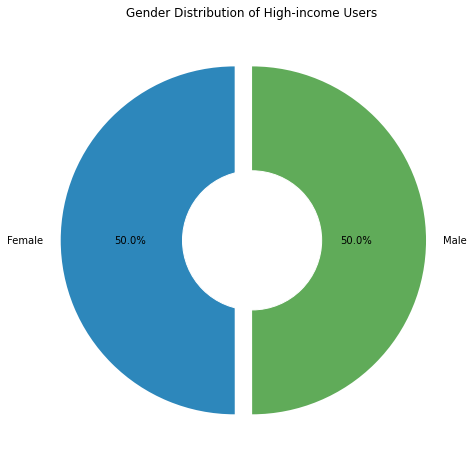


-----------------------------------------------------------------------------------------------------------------------------


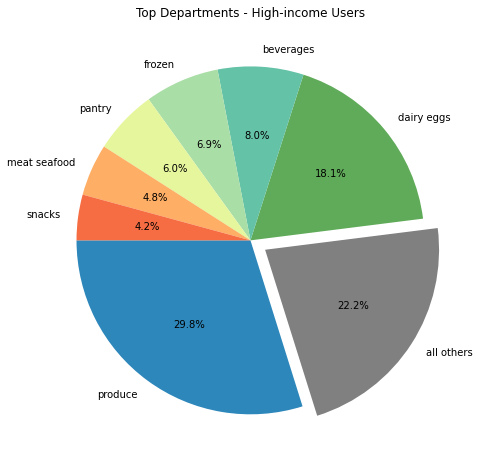


-----------------------------------------------------------------------------------------------------------------------------


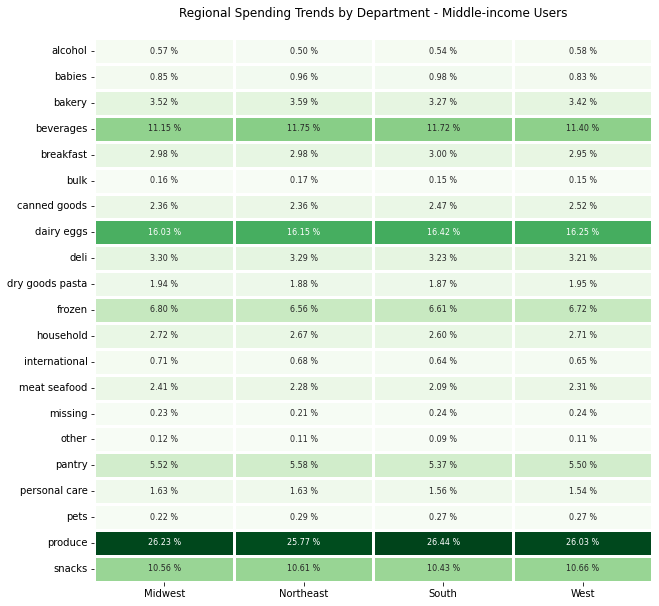

In [53]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def high_income():
    return order_products_all[order_products_all.income >= 145000]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def high_income_profile_table():
    return high_income().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 'props': 
             [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(high_income_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def high_income_spend_chart():
    bar = high_income().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8),xlabel='Region',ylabel='Dollars Spent',title='Regional Spend of High-income Users by Age Category\n', 
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'high_income_spend_chart.png'), dpi=300)
    
    return bar
       
plt.show(high_income_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def high_income_loyalty_bar():
    bar = high_income().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'], xlabel='Region', ylabel='Number of Users')
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - High-income Users\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'high_income_loyalty_chart.png'), dpi=300)

    return bar
       
plt.show(high_income_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def high_income_donut():
    donut = high_income().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of High-income Users', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'high_income_donut_chart.png'), dpi=300)
    
    return donut

plt.show(high_income_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def high_income_pie():
    x = high_income()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#60ab59', '#64c2a6', '#aadea7', '#e6f69d',
                '#feae65', '#f66d44', '#c37d34','#fff1c9', '#EA5F89'], explode=[0,0.1,0,0,0,0,0,0])
    plt.title('Top Departments - High-income Users')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'high_income_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(high_income_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def high_income_heatmap():
    grouping = high_income().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value

    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - High-income Users\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'high_income_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(middle_income_heatmap())

##### 14. Weekend Only Shoppers

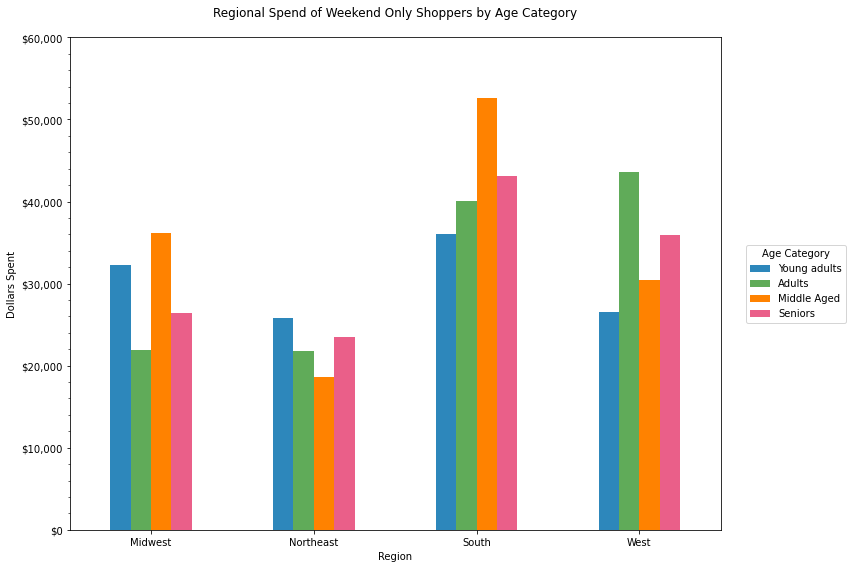


-----------------------------------------------------------------------------------------------------------------------------


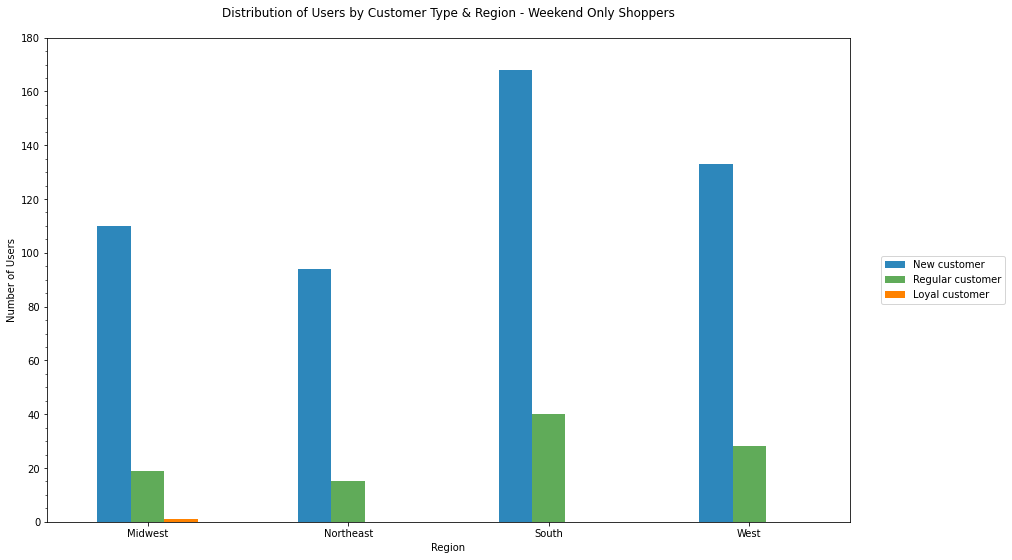


-----------------------------------------------------------------------------------------------------------------------------


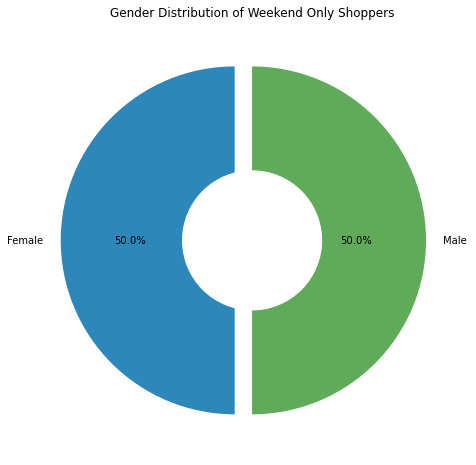


-----------------------------------------------------------------------------------------------------------------------------


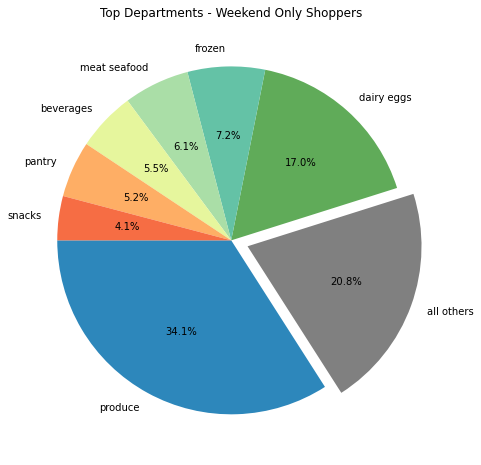


-----------------------------------------------------------------------------------------------------------------------------


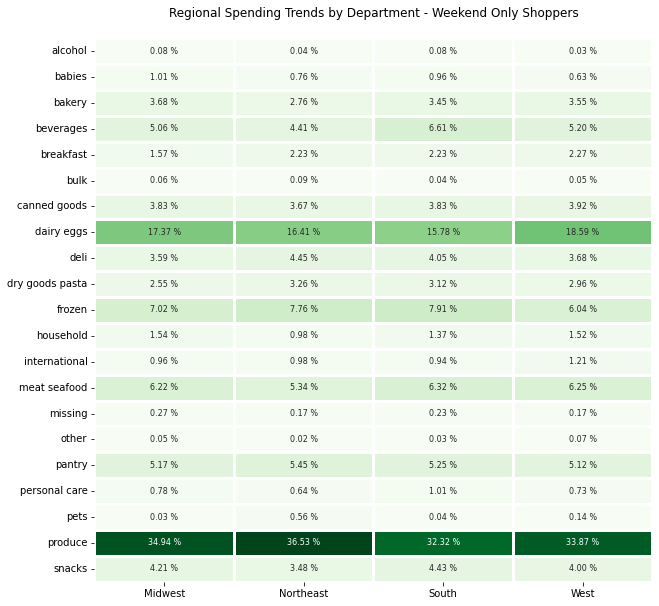

In [55]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekend_warriors():
    return order_products_all[order_products_all.user_id.isin(
        list(order_products_all[order_products_all.order_dow > 1]['user_id'].unique())) == False]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekend_warriors_profile_table():
    return weekend_warriors().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 'props': 
             [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(weekend_warriors_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekend_warriors_spend_chart():
    bar = weekend_warriors().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8),xlabel='Region',ylabel='Dollars Spent',title='Regional Spend of Weekend Only Shoppers by Age Category\n', 
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekend_warriors_spend_chart.png'), dpi=300)
    
    return bar
       
plt.show(weekend_warriors_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekend_warriors_loyalty_bar():
    bar = weekend_warriors().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'], xlabel='Region', ylabel='Number of Users')
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Weekend Only Shoppers\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekend_warriors_loyalty_chart.png'), dpi=300)

    return bar
       
plt.show(weekend_warriors_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekend_warriors_donut():
    donut = weekend_warriors().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Weekend Only Shoppers', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekend_warriors_donut_chart.png'), dpi=300)
    
    return donut

plt.show(weekend_warriors_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekend_warriors_pie():
    x = weekend_warriors()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#60ab59', '#64c2a6', '#aadea7', '#e6f69d',
                '#feae65', '#f66d44', '#c37d34','#fff1c9', '#EA5F89'], explode=[0,0.1,0,0,0,0,0,0])
    plt.title('Top Departments - Weekend Only Shoppers')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekend_warriors_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(weekend_warriors_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekend_warriors_heatmap():
    grouping = weekend_warriors().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value
    
    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Weekend Only Shoppers\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekend_warriors_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(weekend_warriors_heatmap())

##### 15. Weekday Only Shoppers

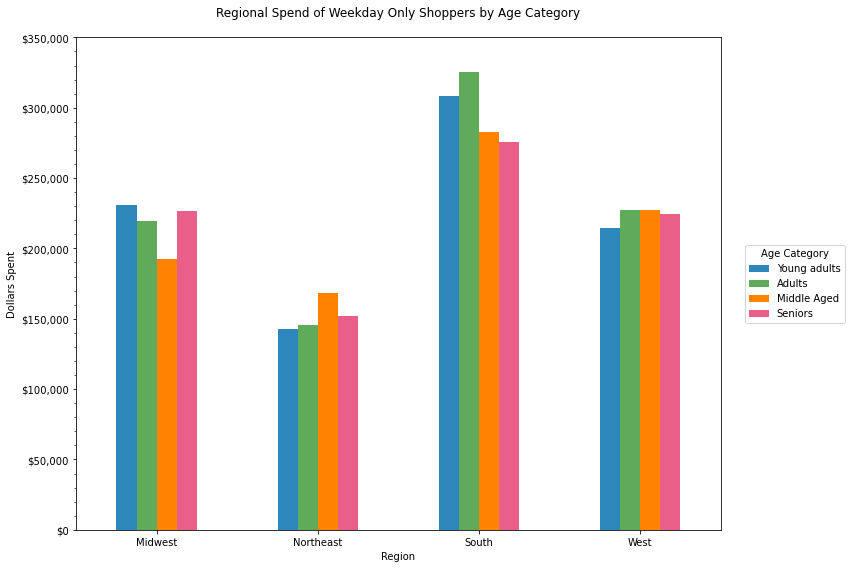


-----------------------------------------------------------------------------------------------------------------------------


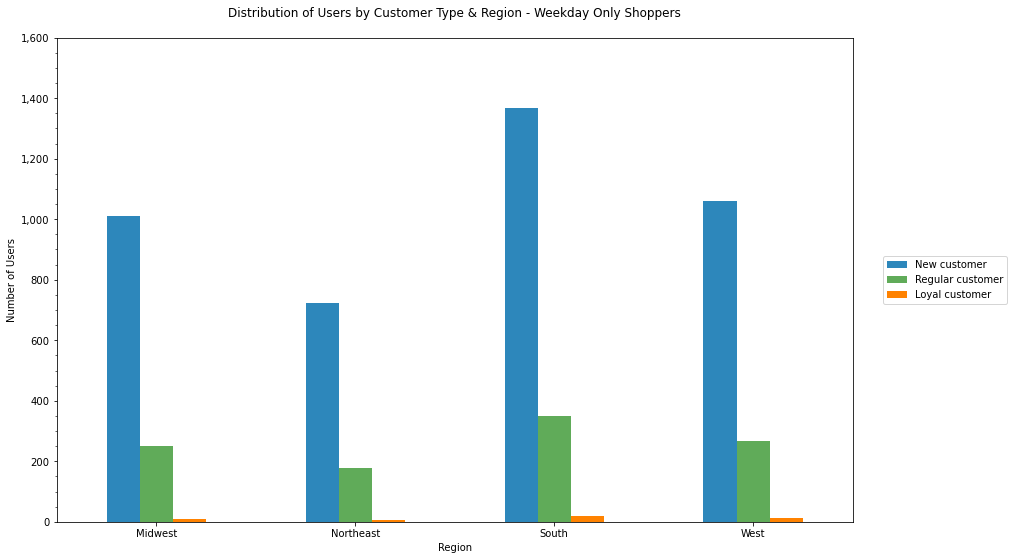


-----------------------------------------------------------------------------------------------------------------------------


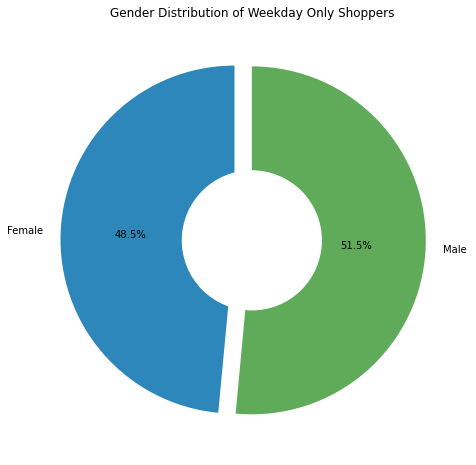


-----------------------------------------------------------------------------------------------------------------------------


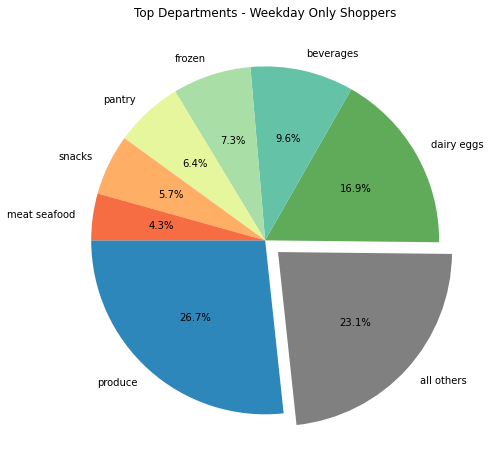


-----------------------------------------------------------------------------------------------------------------------------


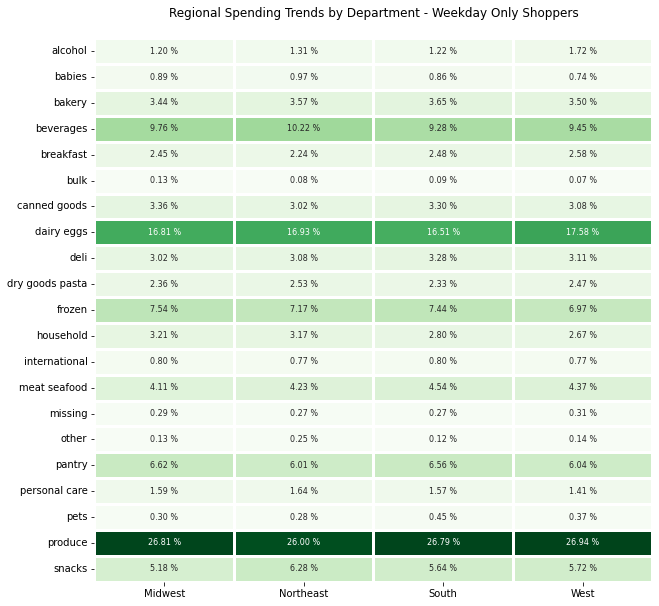

In [56]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekday_shoppers():
    return order_products_all[order_products_all.user_id.isin(
        list(order_products_all[order_products_all.order_dow <= 1]['user_id'].unique())) == False]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekday_shoppers_profile_table():
    return weekday_shoppers().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 'props': 
             [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(weekday_shoppers_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekday_shoppers_spend_chart():
    bar = weekday_shoppers().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8),xlabel='Region',ylabel='Dollars Spent',title='Regional Spend of Weekday Only Shoppers by Age Category\n', 
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_shoppers_spend_chart.png'), dpi=300)
    
    return bar
       
plt.show(weekday_shoppers_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekday_shoppers_loyalty_bar():
    bar = weekday_shoppers().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'], xlabel='Region', ylabel='Number of Users')
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Weekday Only Shoppers\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_shoppers_loyalty_chart.png'), dpi=300)

    return bar
       
plt.show(weekday_shoppers_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekday_shoppers_donut():
    donut = weekday_shoppers().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Weekday Only Shoppers', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_shoppers_donut_chart.png'), dpi=300)
    
    return donut

plt.show(weekday_shoppers_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekday_shoppers_pie():
    x = weekday_shoppers()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#60ab59', '#64c2a6', '#aadea7', '#e6f69d',
                '#feae65', '#f66d44', '#c37d34','#fff1c9', '#EA5F89'], explode=[0,0.1,0,0,0,0,0,0])
    plt.title('Top Departments - Weekday Only Shoppers')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_shoppers_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(weekday_shoppers_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def weekday_shoppers_heatmap():
    grouping = weekday_shoppers().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value

    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Weekday Only Shoppers\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'weekday_shoppers_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(weekday_shoppers_heatmap())

##### 16. Early Morning Shoppers

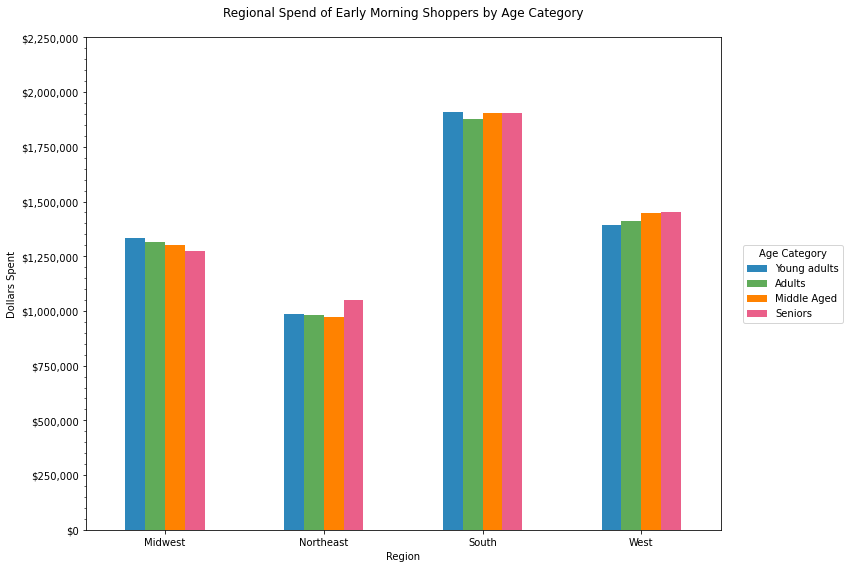


-----------------------------------------------------------------------------------------------------------------------------


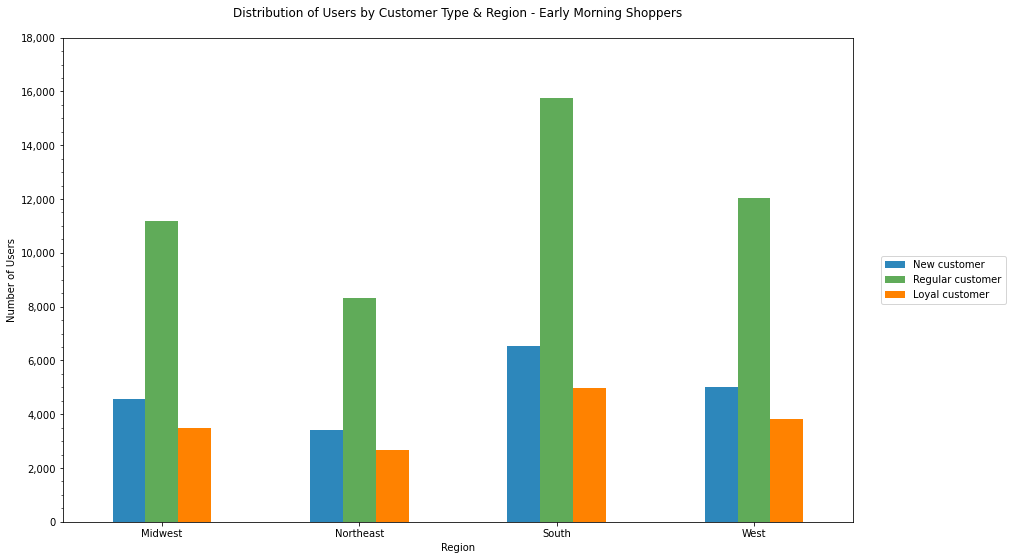


-----------------------------------------------------------------------------------------------------------------------------


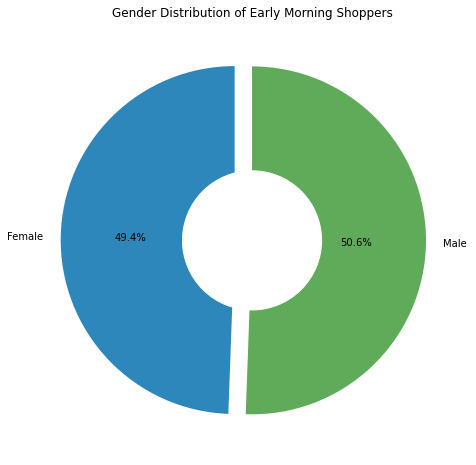


-----------------------------------------------------------------------------------------------------------------------------


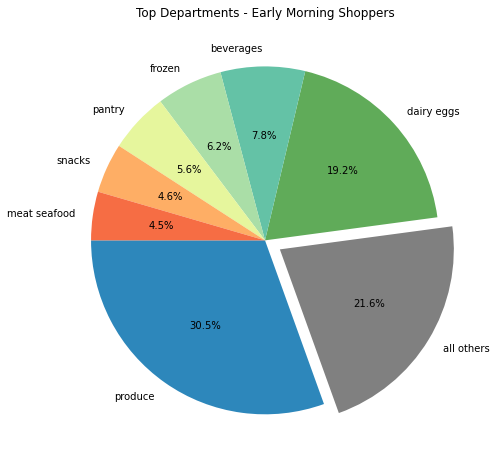


-----------------------------------------------------------------------------------------------------------------------------


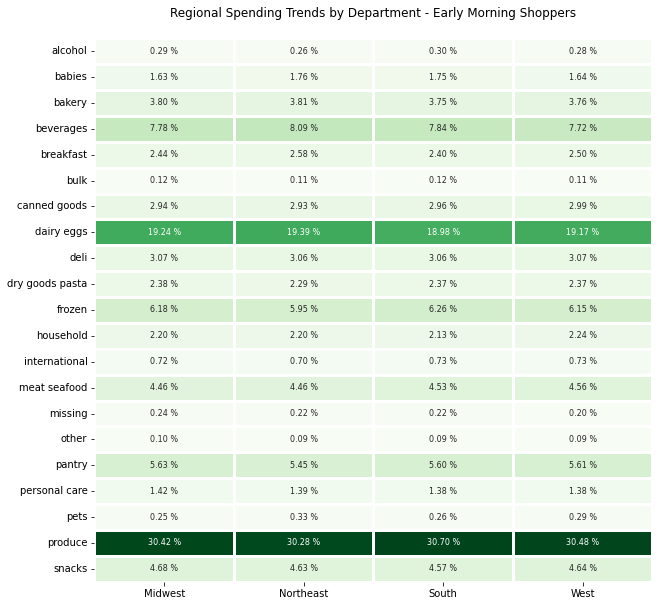

In [57]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def early_morning_shoppers():
    return order_products_all[order_products_all.order_hour_of_day.between(4,8)]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def early_morning_shoppers_profile_table():
    return early_morning_shoppers().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 'props': 
             [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(early_morning_shoppers_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def early_morning_shoppers_spend_chart():
    bar = early_morning_shoppers().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8),xlabel='Region',ylabel='Dollars Spent',title='Regional Spend of Early Morning Shoppers by Age Category\n', 
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'early_morning_shoppers_spend_chart.png'), dpi=300)
    
    return bar
       
plt.show(early_morning_shoppers_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def early_morning_shoppers_loyalty_bar():
    bar = early_morning_shoppers().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'], xlabel='Region', ylabel='Number of Users')
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Early Morning Shoppers\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'early_morning_shoppers_loyalty_chart.png'), dpi=300)

    return bar
       
plt.show(early_morning_shoppers_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def early_morning_shoppers_donut():
    donut = early_morning_shoppers().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Early Morning Shoppers', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'early_morning_shoppers_donut_chart.png'), dpi=300)
    
    return donut

plt.show(early_morning_shoppers_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def early_morning_shoppers_pie():
    x = early_morning_shoppers()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#60ab59', '#64c2a6', '#aadea7', '#e6f69d',
                '#feae65', '#f66d44', '#c37d34','#fff1c9', '#EA5F89'], explode = [0,0.1,0,0,0,0,0,0])
    plt.title('Top Departments - Early Morning Shoppers')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'early_morning_shoppers_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(early_morning_shoppers_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def early_morning_shoppers_heatmap():
    grouping = early_morning_shoppers().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value

    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar= False)
    plt.title('Regional Spending Trends by Department - Early Morning Shoppers\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'early_morning_shoppers_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(early_morning_shoppers_heatmap())

##### 17. Late Night Shoppers

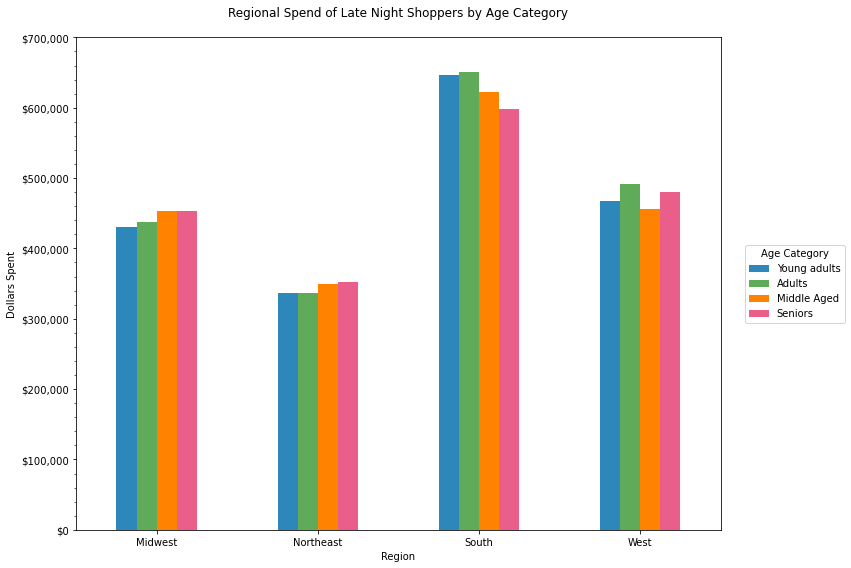


-----------------------------------------------------------------------------------------------------------------------------


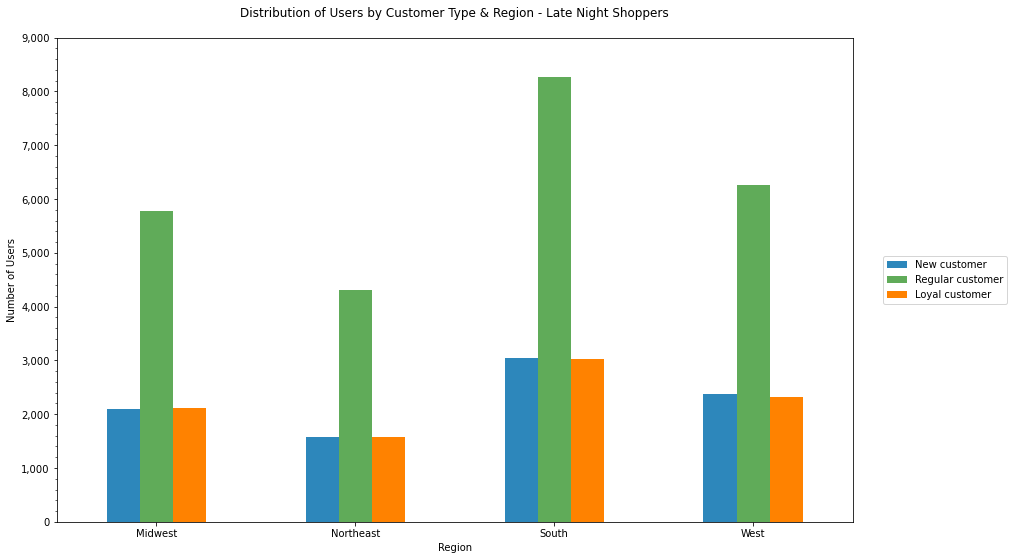


-----------------------------------------------------------------------------------------------------------------------------


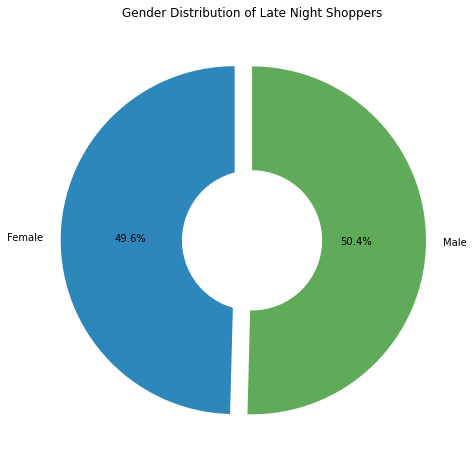


-----------------------------------------------------------------------------------------------------------------------------


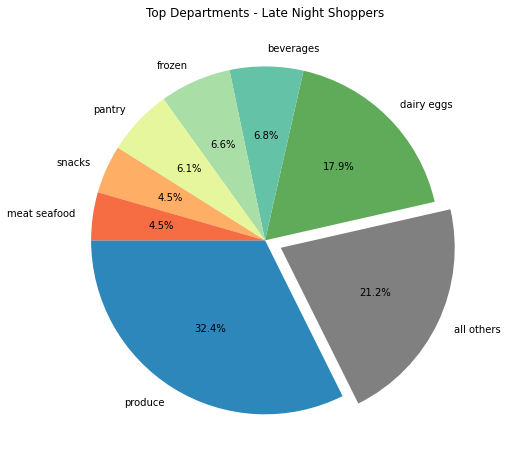


-----------------------------------------------------------------------------------------------------------------------------


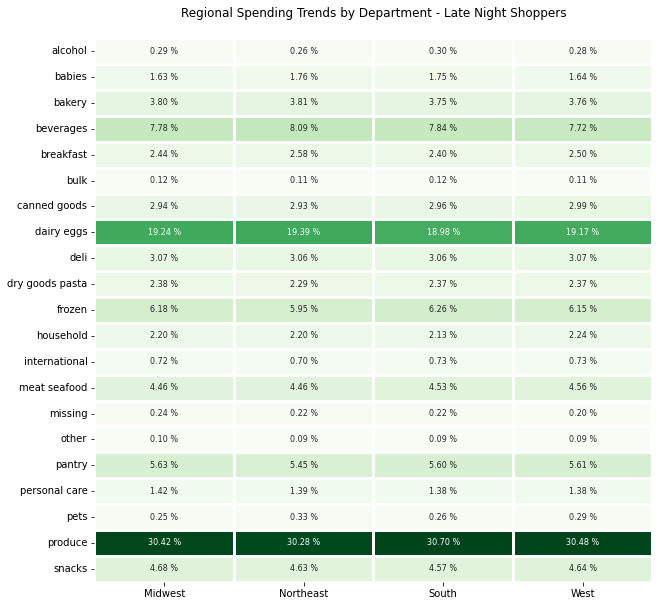

In [58]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - PROFILE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def late_night_shoppers():
    return order_products_all[(order_products_all.order_hour_of_day > 10) & 
                              (order_products_all.order_hour_of_day.between(3,21) == False)]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - TABLE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def late_night_shoppers_profile_table():
    return late_night_shoppers().groupby('state').agg({'avg_prod_price': ['mean', 'min', 'max'],
                                                     'order_id':'nunique', 'max_order': 'mean'}).reset_index().set_index(
        keys='state').rename(
        columns={'avg_prod_price': 'Avg. Price per Item', 'order_id': 'Orders', 'max_order': 'Max # Orders'}
    ).rename_axis(index={'state':''}).dropna().style.highlight_max(axis=0, color='#60ab59').highlight_min(
        axis=0, color='#ff8200').format(precision= 2).set_table_styles(
        [
            {'selector': 'tr td:nth-child(2), tr td:nth-child(5), tr td:nth-child(6)', 'props': 
             [('border-left', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-bottom', '0.5px solid grey')]},
            {'selector': 'tbody', 'props': [('border', '2px solid black')]},
            {'selector': 'tbody tr:nth-child(10), tbody tr:nth-child(20), tbody tr:nth-child(30), tbody tr:nth-child(40)',
             'props': [('border-bottom', '1.5px solid black')]},
            {'selector': 'tbody td', 'props': [('border-left', '0.5px solid grey')]}])

display(late_night_shoppers_profile_table())
print('\n')
# - - - - - - - - - - - - - - - - - - - - - - - - - - - SPEND BAR - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def late_night_shoppers_spend_chart():
    bar = late_night_shoppers().groupby(['region', 'age_category']).prices.sum().unstack('age_category').plot.bar(
        figsize=(12,8),xlabel='Region',ylabel='Dollars Spent',title='Regional Spend of Late Night Shoppers by Age Category\n', 
        color=['#2d87bb','#60ab59','#ff8200', '#EA5F89'])

    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True, title='Age Category')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['${:,.0f}'.format(x) for x in ticks_loc])
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.tight_layout()
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'late_night_shoppers_spend_chart.png'), dpi=300)
    
    return bar
       
plt.show(late_night_shoppers_spend_chart())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - -LOYALTY - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def late_night_shoppers_loyalty_bar():
    bar = late_night_shoppers().groupby(['region', 'loyalty_flag']).user_id.nunique().unstack('loyalty_flag').plot.bar(
        figsize=(12,8), color=['#2d87bb','#60ab59','#ff8200'], xlabel='Region', ylabel='Number of Users')
    
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='minor', bottom=False)
    plt.legend(bbox_to_anchor=[1.2,0.5], loc='right', ncol=1, fancybox=True)
    plt.title('Distribution of Users by Customer Type & Region - Late Night Shoppers\n')
    ticks_loc = bar.get_yticks().tolist()
    bar.set_yticks(bar.get_yticks().tolist())
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'late_night_shoppers_loyalty_chart.png'), dpi=300)

    return bar
       
plt.show(late_night_shoppers_loyalty_bar())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - DONUT - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def late_night_shoppers_donut():
    donut = late_night_shoppers().groupby('gender').user_id.nunique().sort_index().plot.pie(
        ylabel='',legend= False, title='Gender Distribution of Late Night Shoppers', autopct='%1.1f%%', startangle=90,
        colors=['#2d87bb','#60ab59'], explode=[0.1,0], figsize = (8,8))
    
    my_circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'late_night_shoppers_donut_chart.png'), dpi=300)
    
    return donut

plt.show(late_night_shoppers_donut())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - PIE - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def late_night_shoppers_pie():
    x = late_night_shoppers()
    dep_dict = {}
    total = x.prices.sum()
    i = 0
    for dep in x.department.unique():
        value = (x.loc[x.department == dep]['prices'].sum() / total) * 100
        if value > 4:
            dep_dict[dep] = value
        else:
            i += value
    dep_dict['all others'] = i
    
    pie = pd.DataFrame.from_dict(dep_dict, orient='index').sort_values(by=0, ascending=False).plot.pie(
        x='index', y=0, ylabel='', legend=False, figsize=(8,8), autopct='%1.1f%%', startangle=180, 
        colors=['#2d87bb', '#808080', '#60ab59', '#64c2a6', '#aadea7', '#e6f69d',
                '#feae65', '#f66d44', '#c37d34','#fff1c9', '#EA5F89'], explode = [0,0.1,0,0,0,0,0,0])
    plt.title('Top Departments - Late Night Shoppers')
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'late_night_shoppers_pie_chart.png'), dpi=300)
    
    return pie
    
plt.show(late_night_shoppers_pie())
print('\n' + ('-') * 125)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - HEATMAP - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
def late_night_shoppers_heatmap():
    grouping = early_morning_shoppers().groupby(['department', 'region']).prices.sum().reset_index()
    pivot = (grouping.pivot('department', 'region', 'prices'))
    
    values = {}
    for col in pivot.columns.tolist():
        values[col] = []
        for idx in pivot[col].index.tolist():
            values[col].append((pivot[col].loc[idx] / pivot[col].sum()) * 100)
    for key,value in values.items():
        pivot[key] = value

    fig, ax = plt.subplots(figsize=(10,10))
    heatmap = sns.heatmap(pivot, cmap='Greens', ax=ax, linewidths=3, annot=True,
                          annot_kws={'size': '8'}, fmt='.2f', cbar = False)
    plt.title('Regional Spending Trends by Department - Late Night Shoppers\n')
    plt.xlabel('')
    plt.ylabel('')
    for value in heatmap.texts: 
        value.set_text(value.get_text() + " %")
    
    plt.savefig(
    os.path.join(path, '04 Analysis', 'Visualizations', 'late_night_shoppers_heatmap.png'), dpi=300)
    
    return heatmap
    
plt.show(late_night_shoppers_heatmap())

In [50]:
order_products_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_all.pkl'))